# RA6 con Conductos N1 y N5

In [1]:
from math import pi, sin, cos, sqrt
import numpy as np
import openmc
import matplotlib.pyplot as plt

In [2]:
openmc.config["cross_sections"] = (
    "/home/lucas/Documents/Proyecto_Integrador/endfb-viii.0-hdf5/cross_sections.xml"  # "/home/nschmidt/openmc/data/endfb71_hdf5/cross_sections_delayed.xml"#_delayed.xml"
)
# no estoy usando la librería con los gamma retardados?.Tengo que hablar bien de esto con Norberto

In [3]:
plots = True
plot_inline = True

CONDUCTO = 5
NUCLEO = "16"

In [4]:
# 07/12/19 51.1 51.3 100.0 100.0 48.0
# 07/12/19 57.4 57.2 100.0 100.0 72.0
# Simulado 40.0 40.0 100.0 100.0 50.0

In [5]:
# z position of control bars
if NUCLEO == "07":
    print("Benchmark")
    cfe1, cfe2, cfe3, cfe4, cfe5 = 100.0, 100.0, 100.0, 59.5, 50.0

elif CONDUCTO == 1:
    print("Conducto 1")
    cfe1, cfe2, cfe3, cfe4, cfe5 = 47.5, 100.0, 100.0, 47.5, 50.0  # Conducto 1

elif CONDUCTO == 5:
    print("Conducto 5")
    # cfe1, cfe2, cfe3, cfe4, cfe5 = 51.1, 51.3, 100.0, 100.0, 48.0 # Conducto 5 al 07/12/19
    cfe1, cfe2, cfe3, cfe4, cfe5 = 50.0, 50.0, 100.0, 100.0, 55.0

else:
    print("ERROR")

cfe1, cfe2, cfe3, cfe4, cfe5 = [
    i * 63.00 / 100.0 + 0.25 for i in [cfe1, cfe2, cfe3, cfe4, cfe5]
]

T = 25.9 + 273.15

Conducto 5


## Materials

In [6]:
# Combustible nuclear (dispersión de U3Si2 en aluminio)
Meat = openmc.Material(1, "Meat")
Meat.add_nuclide("U234", 1.7680e-05)
Meat.add_nuclide("U235", 2.4170e-03)
Meat.add_nuclide("U236", 1.3635e-05)
Meat.add_nuclide("U238", 9.6538e-03)
Meat.add_nuclide("Si28", 7.7125e-03)
Meat.add_nuclide("Si29", 3.9160e-04)
Meat.add_nuclide("Si30", 2.5814e-04)
Meat.add_nuclide("Al27", 3.0451e-02)
Meat.add_nuclide("B10", 3.8206e-07)
Meat.add_nuclide("B11", 1.5476e-06)
Meat.set_density("atom/b-cm", 5.0917e-02)

# Aleación de Aluminio 6061
Al6061 = openmc.Material(2, "Al6061")
Al6061.add_nuclide("Al27", 5.8811e-02)
Al6061.add_nuclide("Cu63", 4.6017e-05)
Al6061.add_nuclide("Cu65", 2.0510e-05)
Al6061.add_nuclide("Cr50", 1.4946e-06)
Al6061.add_nuclide("Cr52", 2.8822e-05)
Al6061.add_nuclide("Cr53", 3.2682e-06)
Al6061.add_nuclide("Cr54", 8.1352e-07)
Al6061.add_nuclide("Mg24", 6.6229e-4 * 0.7899)
Al6061.add_nuclide("Mg25", 6.6229e-4 * 0.1)
Al6061.add_nuclide("Mg26", 6.6229e-4 * 0.1101)
Al6061.add_nuclide("Si28", 3.5775e-04)
Al6061.add_nuclide("Si29", 1.8165e-05)
Al6061.add_nuclide("Si30", 1.1974e-05)
Al6061.add_nuclide("Fe54", 4.5947e-06)
Al6061.add_nuclide("Fe56", 7.2127e-05)
Al6061.add_nuclide("Fe57", 1.6657e-06)
Al6061.add_nuclide("Fe58", 2.2168e-07)
Al6061.add_nuclide("Mn55", 2.6637e-05)
Al6061.add_nuclide("Ti46", 3.3959e-06 * 0.0825)
Al6061.add_nuclide("Ti47", 3.3959e-06 * 0.0744)
Al6061.add_nuclide("Ti48", 3.3959e-06 * 0.7372)
Al6061.add_nuclide("Ti49", 3.3959e-06 * 0.0541)
Al6061.add_nuclide("Ti50", 3.3959e-06 * 0.0518)
Al6061.add_nuclide("B10", 2.9779e-07)
Al6061.add_nuclide("B11", 1.2062e-06)
Al6061.add_nuclide("Cd106", 9.0404e-10)
Al6061.add_nuclide("Cd108", 6.4368e-10)
Al6061.add_nuclide("Cd110", 9.0332e-09)
Al6061.add_nuclide("Cd111", 9.2574e-09)
Al6061.add_nuclide("Cd112", 1.7452e-08)
Al6061.add_nuclide("Cd113", 8.8379e-09)
Al6061.add_nuclide("Cd114", 2.0778e-08)
Al6061.add_nuclide("Cd116", 5.4170e-09)
Al6061.add_nuclide("Co59", 1.6554e-06)
Al6061.add_nuclide("Li6", 1.7780e-08)
Al6061.add_nuclide("Li7", 2.1648e-07)
Al6061.set_density("atom/b-cm", 6.0075e-02)

# Material de barras de control (Aleación de Plata, Indio y Cadmio)
AgInCd = openmc.Material(3, "AgInCd")
AgInCd.add_nuclide("Ag107", 2.3517e-02)
AgInCd.add_nuclide("Ag109", 2.1848e-02)
AgInCd.add_nuclide("In113", 7.9476e-03)
AgInCd.add_nuclide("Cd106", 3.5414e-05)
AgInCd.add_nuclide("Cd108", 2.5215e-05)
AgInCd.add_nuclide("Cd110", 3.5386e-04)
AgInCd.add_nuclide("Cd111", 3.6264e-04)
AgInCd.add_nuclide("Cd112", 6.8364e-04)
AgInCd.add_nuclide("Cd113", 3.4621e-04)
AgInCd.add_nuclide("Cd114", 8.1396e-04)
AgInCd.add_nuclide("Cd116", 2.1220e-04)
AgInCd.set_density("atom/b-cm", 5.6146e-02)

# Acero inoxidable tipo 304L
SS304L = openmc.Material(4, "SS304L")
SS304L.add_nuclide("C12", 6.0091e-05)  # SS304L.add_nuclide('C0', 6.0091E-05)
SS304L.add_nuclide("Mn55", 8.7583e-04)
SS304L.add_nuclide("Si28", 5.9254e-04)
SS304L.add_nuclide("Si29", 3.0086e-05)
SS304L.add_nuclide("Si30", 1.9833e-05)
SS304L.add_nuclide("Cr50", 7.6396e-04)
SS304L.add_nuclide("Cr52", 1.4732e-02)
SS304L.add_nuclide("Cr53", 1.6705e-03)
SS304L.add_nuclide("Cr54", 4.1582e-04)
SS304L.add_nuclide("Ni58", 5.5812e-03)
SS304L.add_nuclide("Ni60", 2.1499e-03)
SS304L.add_nuclide("Ni61", 9.3462e-05)
SS304L.add_nuclide("Ni62", 2.9793e-04)
SS304L.add_nuclide("Ni64", 7.5917e-05)
SS304L.add_nuclide("Fe54", 3.5011e-03)
SS304L.add_nuclide("Fe56", 5.4960e-02)
SS304L.add_nuclide("Fe57", 1.2693e-03)
SS304L.add_nuclide("Fe58", 1.6892e-04)
SS304L.add_nuclide("S32", 2.1340e-05)
SS304L.add_nuclide("S33", 1.7104e-07)
SS304L.add_nuclide("S34", 9.6546e-07)
SS304L.add_nuclide("S36", 4.5010e-08)
SS304L.add_nuclide("P31", 3.4953e-05)
SS304L.add_nuclide("N14", 1.7113e-04)
SS304L.add_nuclide("N15", 6.2865e-07)
SS304L.set_density("atom/b-cm", 8.7488e-02)

# Agua liviana - Moderador y refrigerante
H2O = openmc.Material(5, "H2O")
H2O.add_nuclide("H1", 6.6765e-02)
H2O.add_nuclide("O16", 3.3338e-02)
H2O.add_s_alpha_beta("c_H_in_H2O")
H2O.set_density("atom/b-cm", 1.0001e-01)

# Cadmio - Material absorbente usado en colimadores y "slits"
Cadmium = openmc.Material(6, "Cadmium")
Cadmium.add_nuclide("Cd106", 0.0125, "wo")
Cadmium.add_nuclide("Cd108", 0.0089, "wo")
Cadmium.add_nuclide("Cd110", 0.1249, "wo")
Cadmium.add_nuclide("Cd111", 0.1280, "wo")
Cadmium.add_nuclide("Cd112", 0.2413, "wo")
Cadmium.add_nuclide("Cd113", 0.1222, "wo")
Cadmium.add_nuclide("Cd114", 0.2873, "wo")
Cadmium.add_nuclide("Cd116", 0.0749, "wo")
Cadmium.set_density("atom/b-cm", 4.6340e-02)

# Aluminio puro
Aluminum = openmc.Material(7, "Aluminum")
Aluminum.add_nuclide("Al27", 6.0262e-02)
Aluminum.set_density("atom/b-cm", 6.0262e-02)

# Alúmina (óxido de aluminio)
Alumina = openmc.Material(8, "Alumina")
Alumina.add_nuclide("Al27", 4.6778e-02)
Alumina.add_nuclide("O16", 7.0166e-02)
Alumina.set_density("atom/b-cm", 1.1694e-01)

# Grafito
Graphite = openmc.Material(9, "Graphite")
Graphite.add_nuclide("C12", 9.3758e-02)  # Graphite.add_nuclide('C0', 9.3758E-02)
Graphite.set_density("atom/b-cm", 9.3758e-02)

# Aire - rellenado de espacios no materiales
Air = openmc.Material(10, "Air")
Air.add_nuclide("O16", 1.0503e-05)
Air.add_nuclide("N14", 3.9094e-05)
Air.set_density("atom/b-cm", 4.95970723e-05)

# Acero inoxidable 316L
SS316L = openmc.Material(11, "SS316L")
SS316L.add_nuclide("C12", 0.001384, "ao")  # SS316L.add_nuclide('C0',0.001384,'ao')
SS316L.add_element("Si", 0.019722, "ao")
SS316L.add_element("P", 0.000805, "ao")
SS316L.add_element("S", 0.000518, "ao")
SS316L.add_element("Cr", 0.181098, "ao")
SS316L.add_element("Mn", 0.020165, "ao")
SS316L.add_element("Fe", 0.648628, "ao")
SS316L.add_element("Ni", 0.113247, "ao")
SS316L.add_element("Mo", 0.014434, "ao")
SS316L.set_density("g/cm3", 8.0)

# Concreto
Concrete = openmc.Material(12, "Concrete")
Concrete.add_nuclide("H1", 0.086069, "ao")
Concrete.add_nuclide("O16", 0.314488, "ao")
Concrete.add_element("Mg", 0.005516, "ao")
Concrete.add_element("Al", 0.014030, "ao")
Concrete.add_element("Si", 0.020499, "ao")
Concrete.add_element("Ca", 0.050769, "ao")
Concrete.add_element("Ti", 0.012192, "ao")
Concrete.add_element("V", 0.000464, "ao")
Concrete.add_element("Fe", 0.495972, "ao")
Concrete.set_density("g/cm3", 4.64)

# Plomo
Lead = openmc.Material(13, "Lead")
Lead.add_element("Pb", 1.0, "wo")
Lead.set_density("g/cm3", 11.35)

Polyborated = openmc.Material(14, "Polyborated")
Polyborated.add_nuclide("H1", 0.627759, "ao")
Polyborated.add_element("B", 0.046690, "ao")
Polyborated.add_nuclide(
    "C12", 0.325552, "ao"
)  # Polyborated.add_nuclide('C0',0.325552,'ao')
Polyborated.set_density("g/cm3", 1)

# materials = openmc.Materials([He3, PE, BPE, boroflex, Cd, Concrete])
# model.materials = materials

In [7]:
materials_colors = {
    Meat: "red",
    Al6061: "silver",
    AgInCd: "black",
    SS304L: "grey",
    H2O: "lightblue",
    Cadmium: "black",
    Aluminum: "silver",
    Alumina: "silver",
    Graphite: "yellow",
    SS316L: "gray",
    Concrete: "orange",
    Lead: "black",
    Polyborated: "coral",
    Air: "white",
}

In [8]:
c_water = openmc.Cell(fill=H2O)
u_water = openmc.Universe(cells=[c_water])

## Surfaces

In [9]:
# Meat (1 in MCNP)
sur0001 = openmc.XPlane(x0=-3.0, surface_id=1)
sur0002 = openmc.XPlane(x0=+3.0, surface_id=2)
sur0003 = openmc.YPlane(y0=-0.02533, surface_id=3)
sur0004 = openmc.YPlane(y0=+0.02533, surface_id=4)
sur0005 = openmc.ZPlane(z0=-31.15, surface_id=5)
sur0006 = openmc.ZPlane(z0=+31.15, surface_id=6)
# Cladding  (2 in MCNP)
sur0007 = openmc.XPlane(x0=-3.525, surface_id=7)
sur0008 = openmc.XPlane(x0=+3.525, surface_id=8)
sur0009 = openmc.YPlane(y0=-0.0745, surface_id=9)
sur0010 = openmc.YPlane(y0=+0.0745, surface_id=10)
sur0011 = openmc.ZPlane(z0=-33.55, surface_id=11)
sur0012 = openmc.ZPlane(z0=+33.55, surface_id=12)
# Cadmium Wires (3 and 4 in MCNP)
sur0013 = openmc.ZCylinder(x0=-3.58, r=0.02425, surface_id=13)
sur0014 = openmc.ZCylinder(x0=+3.58, r=0.02425, surface_id=14)
sur0015 = openmc.ZPlane(z0=-25.0, surface_id=15)
sur0016 = openmc.ZPlane(z0=+25.0, surface_id=16)
# Left Holding Slot for Cd Wire (7 in MCNP)
sur0017 = openmc.XPlane(x0=-3.61, surface_id=17)
sur0018 = openmc.XPlane(x0=-3.55, surface_id=18)
sur0019 = openmc.YPlane(y0=-0.025, surface_id=19)
sur0020 = openmc.YPlane(y0=+0.025, surface_id=20)
sur0021 = openmc.ZPlane(z0=-33.85, surface_id=21)
sur0022 = openmc.ZPlane(z0=+31.65, surface_id=22)
# Right Holding Slot for Cd Wire (8 in MCNP)
sur0023 = openmc.XPlane(x0=+3.55, surface_id=23)
sur0024 = openmc.XPlane(x0=+3.61, surface_id=24)
sur0025 = openmc.YPlane(y0=-0.025, surface_id=25)
sur0026 = openmc.YPlane(y0=+0.025, surface_id=26)
sur0027 = openmc.ZPlane(z0=-33.85, surface_id=27)
sur0028 = openmc.ZPlane(z0=+31.65, surface_id=28)
# Left Side Plate (11 in MCNP)
sur0029 = openmc.XPlane(x0=-3.8, surface_id=29)
sur0030 = openmc.XPlane(x0=-3.3, surface_id=30)
sur0031 = openmc.YPlane(y0=-0.21, surface_id=31)
sur0032 = openmc.YPlane(y0=+0.21, surface_id=32)
sur0033 = openmc.ZPlane(z0=-38.35, surface_id=33)
sur0034 = openmc.ZPlane(z0=+39.65, surface_id=34)
# Right Side Plate (12 in MCNP)
sur0035 = openmc.XPlane(x0=+3.3, surface_id=35)
sur0036 = openmc.XPlane(x0=+3.8, surface_id=36)
sur0037 = openmc.YPlane(y0=-0.21, surface_id=37)
sur0038 = openmc.YPlane(y0=+0.21, surface_id=38)
sur0039 = openmc.ZPlane(z0=-38.35, surface_id=39)
sur0040 = openmc.ZPlane(z0=+39.65, surface_id=40)
# Internal Fuel Plate Left Holding Slot (9 in MCNP)
sur0041 = openmc.XPlane(x0=-3.55, surface_id=41)
sur0042 = openmc.XPlane(x0=-3.525, surface_id=42)
sur0043 = openmc.YPlane(y0=-0.08, surface_id=43)
sur0044 = openmc.YPlane(y0=+0.08, surface_id=44)
sur0045 = openmc.ZPlane(z0=-33.85, surface_id=45)
sur0046 = openmc.ZPlane(z0=+39.65, surface_id=46)
# Internal Fuel Plate Right Holding Slot (10 in MCPN)
sur0047 = openmc.XPlane(x0=+3.525, surface_id=47)
sur0048 = openmc.XPlane(x0=+3.55, surface_id=48)
sur0049 = openmc.YPlane(y0=-0.08, surface_id=49)
sur0050 = openmc.YPlane(y0=+0.08, surface_id=50)
sur0051 = openmc.ZPlane(z0=-33.85, surface_id=51)
sur0052 = openmc.ZPlane(z0=+39.65, surface_id=52)
# Left Internal Fuel Plate Holding Slot Top (18 in MCNP)
sur0053 = openmc.XPlane(x0=-3.525, surface_id=53)
sur0054 = openmc.XPlane(x0=-3.3, surface_id=54)
sur0055 = openmc.YPlane(y0=-0.08, surface_id=55)
sur0056 = openmc.YPlane(y0=+0.08, surface_id=56)
sur0057 = openmc.ZPlane(z0=+33.55, surface_id=57)
sur0058 = openmc.ZPlane(z0=+39.65, surface_id=58)
# Right Internal Fuel Plate Holding Slot Top (19 in MCNP)
sur0059 = openmc.XPlane(x0=+3.3, surface_id=59)
sur0060 = openmc.XPlane(x0=+3.525, surface_id=60)
sur0061 = openmc.YPlane(y0=-0.08, surface_id=61)
sur0062 = openmc.YPlane(y0=+0.08, surface_id=62)
sur0063 = openmc.ZPlane(z0=+33.55, surface_id=63)
sur0064 = openmc.ZPlane(z0=+39.65, surface_id=64)
# Cladding for External Fuel Plate (13 in MCNP)
sur0065 = openmc.XPlane(x0=-3.525, surface_id=65)
sur0066 = openmc.XPlane(x0=+3.525, surface_id=66)
sur0067 = openmc.YPlane(y0=-0.0745, surface_id=67)
sur0068 = openmc.YPlane(y0=+0.0745, surface_id=68)
sur0069 = openmc.ZPlane(z0=-38.35, surface_id=69)
sur0070 = openmc.ZPlane(z0=+35.15, surface_id=70)
# Left Holding Slot for Cd Wire External Plate (14 in MCNP)
sur0071 = openmc.XPlane(x0=-3.61, surface_id=71)
sur0072 = openmc.XPlane(x0=-3.55, surface_id=72)
sur0073 = openmc.YPlane(y0=-0.025, surface_id=73)
sur0074 = openmc.YPlane(y0=+0.025, surface_id=74)
sur0075 = openmc.ZPlane(z0=-38.35, surface_id=75)
sur0076 = openmc.ZPlane(z0=+31.65, surface_id=76)
# Right Holding Slot for Cd Wire External Plate (15 in MCNP)
sur0077 = openmc.XPlane(x0=+3.55, surface_id=77)
sur0078 = openmc.XPlane(x0=+3.61, surface_id=78)
sur0079 = openmc.YPlane(y0=-0.025, surface_id=79)
sur0080 = openmc.YPlane(y0=+0.025, surface_id=80)
sur0081 = openmc.ZPlane(z0=-38.35, surface_id=81)
sur0082 = openmc.ZPlane(z0=+31.65, surface_id=82)
# Holding Slot for External Fuel Plate Left (16 in MCNP)
sur0083 = openmc.XPlane(x0=-3.55, surface_id=83)
sur0084 = openmc.XPlane(x0=-3.525, surface_id=84)
sur0085 = openmc.YPlane(y0=-0.08, surface_id=85)
sur0086 = openmc.YPlane(y0=+0.08, surface_id=86)
sur0087 = openmc.ZPlane(z0=-38.35, surface_id=87)
sur0088 = openmc.ZPlane(z0=+39.65, surface_id=88)
# Holding Slot for External Fuel Plate Right (17 in MCNP)
sur0089 = openmc.XPlane(x0=+3.525, surface_id=89)
sur0090 = openmc.XPlane(x0=+3.55, surface_id=90)
sur0091 = openmc.YPlane(y0=-0.08, surface_id=91)
sur0092 = openmc.YPlane(y0=+0.08, surface_id=92)
sur0093 = openmc.ZPlane(z0=-38.35, surface_id=93)
sur0094 = openmc.ZPlane(z0=+39.65, surface_id=94)
# Empty water position for NFE, also, limits for Fuel Elements
sur0095 = openmc.XPlane(x0=-3.85, surface_id=95)  # width
sur0096 = openmc.XPlane(x0=+3.85, surface_id=96)  # width
sur0097 = openmc.YPlane(y0=-0.21, surface_id=97)  # thickness for NFE
sur0098 = openmc.YPlane(y0=+0.21, surface_id=98)  # thickness for NFE
sur0099 = openmc.ZPlane(z0=-38.35, surface_id=99)  # bttm plane length
sur0100 = openmc.ZPlane(
    z0=+35.15, surface_id=100
)  # uppr plane length NFE w/o crossbar #34
sur0101 = openmc.YPlane(y0=-0.205, surface_id=101)  # thickness for CFE #37
sur0102 = openmc.YPlane(y0=+0.205, surface_id=102)  # thickness for CFE #38
sur0103 = openmc.ZPlane(z0=+39.65, surface_id=103)  # uppr lenght CFE (?) #39
# Containing Box for Fuel Plate (when testing/benchmarking)
sur0906 = openmc.XPlane(x0=-3.8, surface_id=906, boundary_type="reflective")
sur0907 = openmc.XPlane(x0=+3.8, surface_id=907, boundary_type="reflective")
sur0908 = openmc.YPlane(y0=-0.185415, surface_id=908, boundary_type="reflective")
sur0909 = openmc.YPlane(y0=+0.185415, surface_id=909, boundary_type="reflective")
sur0910 = openmc.ZPlane(z0=-38.35, surface_id=910, boundary_type="reflective")
sur0911 = openmc.ZPlane(z0=+39.65, surface_id=911, boundary_type="reflective")
# Containing Box for CFE (when testing/benchmarking)
sur0900 = openmc.XPlane(x0=-3.84, surface_id=900, boundary_type="reflective")
sur0901 = openmc.XPlane(x0=+3.84, surface_id=901, boundary_type="reflective")
sur0902 = openmc.YPlane(y0=-3.98, surface_id=902, boundary_type="reflective")
sur0903 = openmc.YPlane(y0=+3.98, surface_id=903, boundary_type="reflective")
sur0904 = openmc.ZPlane(z0=-38.34, surface_id=904, boundary_type="reflective")
sur0905 = openmc.ZPlane(z0=+118.24, surface_id=905, boundary_type="reflective")
# Containing Box for Plotting Lattice 16
sur0912 = openmc.XPlane(x0=-31.6, surface_id=912, boundary_type="reflective")
sur0913 = openmc.XPlane(x0=+31.6, surface_id=913, boundary_type="reflective")
sur0914 = openmc.YPlane(y0=-36.5, surface_id=914, boundary_type="reflective")
sur0915 = openmc.YPlane(y0=+36.5, surface_id=915, boundary_type="reflective")
sur0916 = openmc.ZPlane(z0=-40.8, surface_id=916, boundary_type="reflective")
sur0917 = openmc.ZPlane(z0=+118.46, surface_id=917, boundary_type="reflective")
# CFE Side Plate Left (#21)
sur0104 = openmc.XPlane(x0=-3.8, surface_id=104)
sur0105 = openmc.XPlane(x0=-3.3, surface_id=105)
sur0106 = openmc.YPlane(y0=-0.205, surface_id=106)
sur0107 = openmc.YPlane(y0=+0.205, surface_id=107)
sur0108 = openmc.ZPlane(z0=-38.35, surface_id=108)
sur0109 = openmc.ZPlane(z0=+39.65, surface_id=109)
# CFE Side Plate Right (#22)
sur0110 = openmc.XPlane(x0=+3.3, surface_id=110)
sur0111 = openmc.XPlane(x0=+3.8, surface_id=111)
sur0112 = openmc.YPlane(y0=-0.205, surface_id=112)
sur0113 = openmc.YPlane(y0=+0.205, surface_id=113)
sur0114 = openmc.ZPlane(z0=-38.35, surface_id=114)
sur0115 = openmc.ZPlane(z0=+39.65, surface_id=115)
# CFE Fuel plate and internal guide plate h.s. left (#23)
sur0116 = openmc.XPlane(x0=-3.55, surface_id=116)
sur0117 = openmc.XPlane(x0=-3.525, surface_id=117)
sur0118 = openmc.YPlane(y0=-0.08, surface_id=118)
sur0119 = openmc.YPlane(y0=+0.08, surface_id=119)
sur0120 = openmc.ZPlane(z0=-33.85, surface_id=120)
sur0121 = openmc.ZPlane(z0=+39.65, surface_id=121)
# CFE Fuel plate and internal guide plate h.s. right (#24)
sur0122 = openmc.XPlane(x0=+3.525, surface_id=122)
sur0123 = openmc.XPlane(x0=+3.55, surface_id=123)
sur0124 = openmc.YPlane(y0=-0.08, surface_id=124)
sur0125 = openmc.YPlane(y0=+0.08, surface_id=125)
sur0126 = openmc.ZPlane(z0=-33.85, surface_id=126)
sur0127 = openmc.ZPlane(z0=+39.65, surface_id=127)
# CFE Cd wire h.s. external fuel plate left (#25)
sur0128 = openmc.XPlane(x0=-3.61, surface_id=128)
sur0129 = openmc.XPlane(x0=-3.55, surface_id=129)
sur0130 = openmc.YPlane(y0=-0.025, surface_id=130)
sur0131 = openmc.YPlane(y0=+0.025, surface_id=131)
sur0132 = openmc.ZPlane(z0=-33.85, surface_id=132)
sur0133 = openmc.ZPlane(z0=+39.65, surface_id=133)
# CFE Cd wire h.s. external fuel plate right (#26)
sur0134 = openmc.XPlane(x0=+3.55, surface_id=134)
sur0135 = openmc.XPlane(x0=+3.61, surface_id=135)
sur0136 = openmc.YPlane(y0=-0.025, surface_id=136)
sur0137 = openmc.YPlane(y0=+0.025, surface_id=137)
sur0138 = openmc.ZPlane(z0=-33.85, surface_id=138)
sur0139 = openmc.ZPlane(z0=+39.65, surface_id=139)
# CFE External guide plate h.s. left (#27)
sur0140 = openmc.XPlane(x0=-3.55, surface_id=140)
sur0141 = openmc.XPlane(x0=-3.525, surface_id=141)
sur0142 = openmc.YPlane(y0=-0.08, surface_id=142)
sur0143 = openmc.YPlane(y0=+0.08, surface_id=143)
sur0144 = openmc.ZPlane(z0=-38.35, surface_id=144)
sur0145 = openmc.ZPlane(z0=+39.65, surface_id=145)
# CFE External guide plate h.s. right (#28)
sur0146 = openmc.XPlane(x0=+3.525, surface_id=146)
sur0147 = openmc.XPlane(x0=+3.55, surface_id=147)
sur0148 = openmc.YPlane(y0=-0.08, surface_id=148)
sur0149 = openmc.YPlane(y0=+0.08, surface_id=149)
sur0150 = openmc.ZPlane(z0=-38.35, surface_id=150)
sur0151 = openmc.ZPlane(z0=+39.65, surface_id=151)
# CFE Fuel plate and internal guide plate h.s. left (#29)
sur0152 = openmc.XPlane(x0=-3.525, surface_id=152)
sur0153 = openmc.XPlane(x0=-3.3, surface_id=153)
sur0154 = openmc.YPlane(y0=-0.08, surface_id=154)
sur0155 = openmc.YPlane(y0=+0.08, surface_id=155)
sur0156 = openmc.ZPlane(z0=+33.55, surface_id=156)
sur0157 = openmc.ZPlane(z0=+39.65, surface_id=157)
# CFE Fuel plate and internal guide plate h.s. right (#30)
sur0158 = openmc.XPlane(x0=+3.3, surface_id=158)
sur0159 = openmc.XPlane(x0=+3.525, surface_id=159)
sur0160 = openmc.YPlane(y0=-0.08, surface_id=160)
sur0161 = openmc.YPlane(y0=+0.08, surface_id=161)
sur0162 = openmc.ZPlane(z0=+33.55, surface_id=162)
sur0163 = openmc.ZPlane(z0=+39.65, surface_id=163)
# CFE internal control guide plate (#5)
sur0164 = openmc.XPlane(x0=-3.525, surface_id=164)
sur0165 = openmc.XPlane(x0=+3.525, surface_id=165)
sur0166 = openmc.YPlane(y0=-0.065, surface_id=166)
sur0167 = openmc.YPlane(y0=+0.065, surface_id=167)
sur0168 = openmc.ZPlane(z0=-33.55, surface_id=168)
sur0169 = openmc.ZPlane(z0=+33.55, surface_id=169)
# CFE external control guide plate (#6)
sur0170 = openmc.XPlane(x0=-3.525, surface_id=170)
sur0171 = openmc.XPlane(x0=+3.525, surface_id=171)
sur0172 = openmc.YPlane(y0=-0.065, surface_id=172)
sur0173 = openmc.YPlane(y0=+0.065, surface_id=173)
sur0174 = openmc.ZPlane(z0=-38.35, surface_id=174)
sur0175 = openmc.ZPlane(z0=+39.65, surface_id=175)
# Ag-In-Cd Absorbent Plate (#41)
sur0176 = openmc.XPlane(x0=-2.98, surface_id=176)
sur0177 = openmc.XPlane(x0=+2.98, surface_id=177)
sur0178 = openmc.YPlane(y0=-0.11, surface_id=178)
sur0179 = openmc.YPlane(y0=+0.11, surface_id=179)
sur0180 = openmc.ZPlane(z0=-31.7, surface_id=180)
sur0181 = openmc.ZPlane(z0=+31.7, surface_id=181)
# Cladding Absorbent Plate (#42)
sur0182 = openmc.XPlane(x0=-3.20, surface_id=182)
sur0183 = openmc.XPlane(x0=+3.20, surface_id=183)
sur0184 = openmc.YPlane(y0=-0.215, surface_id=184)
sur0185 = openmc.YPlane(y0=+0.215, surface_id=185)
sur0186 = openmc.ZPlane(z0=-32.8, surface_id=186)
sur0187 = openmc.ZPlane(z0=+53.9, surface_id=187)
# Void Absorbent Plate (#43)
sur0188 = openmc.XPlane(x0=-3.13, surface_id=188)
sur0189 = openmc.XPlane(x0=+3.13, surface_id=189)
sur0190 = openmc.YPlane(y0=-0.145, surface_id=190)
sur0191 = openmc.YPlane(y0=+0.145, surface_id=191)
sur0192 = openmc.ZPlane(z0=-31.7, surface_id=192)
sur0193 = openmc.ZPlane(z0=+31.7, surface_id=193)
# Semicircular edge left (#44)
sur0194 = openmc.ZCylinder(x0=-2.98, r=0.11, surface_id=194)
# Semicircular edge right (#45)
sur0195 = openmc.ZCylinder(x0=+2.98, r=0.11, surface_id=195)
# Central Slot (#46)
sur0196 = openmc.ZCylinder(y0=0.1725, r=0.1625, surface_id=196)
# Delimiting planes for edges
sur0197 = openmc.ZPlane(z0=-31.7, surface_id=197)
sur0198 = openmc.ZPlane(z0=+31.7, surface_id=198)
### CFE Assembly ###
# Fuel Elements #51
sur0199 = openmc.XPlane(x0=-3.85, surface_id=199)
sur0200 = openmc.XPlane(x0=+3.85, surface_id=200)
sur0201 = openmc.YPlane(y0=-2.87, surface_id=201)
sur0202 = openmc.YPlane(y0=+2.87, surface_id=202)
sur0203 = openmc.ZPlane(z0=-38.35, surface_id=203)
sur0204 = openmc.ZPlane(z0=+39.65, surface_id=204)
# Internal Guide Plate #52
sur0205 = openmc.XPlane(x0=-3.85, surface_id=205)
sur0206 = openmc.XPlane(x0=+3.85, surface_id=206)
sur0207 = openmc.YPlane(y0=-3.23, surface_id=207)
sur0208 = openmc.YPlane(y0=-2.87, surface_id=208)
sur0209 = openmc.ZPlane(z0=-38.35, surface_id=209)
sur0210 = openmc.ZPlane(z0=+39.65, surface_id=210)
# Missing Guide Plate #53
sur0211 = openmc.XPlane(x0=-3.8, surface_id=211)
sur0212 = openmc.XPlane(x0=-3.3, surface_id=212)
sur0213 = openmc.YPlane(y0=-3.66, surface_id=213)
sur0214 = openmc.YPlane(y0=-3.23, surface_id=214)
sur0215 = openmc.ZPlane(z0=-38.35, surface_id=215)
sur0216 = openmc.ZPlane(z0=+39.65, surface_id=216)
# Missing Side Plate #54
sur0217 = openmc.XPlane(x0=+3.3, surface_id=217)
sur0218 = openmc.XPlane(x0=+3.8, surface_id=218)
sur0219 = openmc.YPlane(y0=-3.66, surface_id=219)
sur0220 = openmc.YPlane(y0=-3.23, surface_id=220)
sur0221 = openmc.ZPlane(z0=-38.35, surface_id=221)
sur0222 = openmc.ZPlane(z0=+39.65, surface_id=222)
# Absorbent Plate #55
sur0223 = openmc.XPlane(x0=-3.3, surface_id=223)
sur0224 = openmc.XPlane(x0=+3.3, surface_id=224)
sur0225 = openmc.YPlane(y0=-3.66, surface_id=225)
sur0226 = openmc.YPlane(y0=-3.23, surface_id=226)
sur0227 = openmc.ZPlane(z0=-33.15, surface_id=227)
sur0228 = openmc.ZPlane(z0=+118.25, surface_id=228)
# External Guide Plate #56
sur0229 = openmc.XPlane(x0=-3.85, surface_id=229)
sur0230 = openmc.XPlane(x0=+3.85, surface_id=230)
sur0231 = openmc.YPlane(y0=-4.00, surface_id=231)
sur0232 = openmc.YPlane(y0=-3.66, surface_id=232)
sur0233 = openmc.ZPlane(z0=-38.35, surface_id=233)
sur0234 = openmc.ZPlane(z0=+39.65, surface_id=234)
# Internal Guide Plate #57
sur0235 = openmc.XPlane(x0=-3.85, surface_id=235)
sur0236 = openmc.XPlane(x0=+3.85, surface_id=236)
sur0237 = openmc.YPlane(y0=+2.87, surface_id=237)
sur0238 = openmc.YPlane(y0=+3.23, surface_id=238)
sur0239 = openmc.ZPlane(z0=-38.35, surface_id=239)
sur0240 = openmc.ZPlane(z0=+39.65, surface_id=240)
# Missing Side plate #58
sur0241 = openmc.XPlane(x0=-3.80, surface_id=241)
sur0242 = openmc.XPlane(x0=-3.30, surface_id=242)
sur0243 = openmc.YPlane(y0=+3.23, surface_id=243)
sur0244 = openmc.YPlane(y0=+3.66, surface_id=244)
sur0245 = openmc.ZPlane(z0=-38.35, surface_id=245)
sur0246 = openmc.ZPlane(z0=+39.65, surface_id=246)
# Missing Side Plate #59
sur0247 = openmc.XPlane(x0=+3.30, surface_id=247)
sur0248 = openmc.XPlane(x0=+3.80, surface_id=248)
sur0249 = openmc.YPlane(y0=+3.23, surface_id=249)
sur0250 = openmc.YPlane(y0=+3.66, surface_id=250)
sur0251 = openmc.ZPlane(z0=-38.35, surface_id=251)
sur0252 = openmc.ZPlane(z0=+39.65, surface_id=252)
# Absorbent Plate #60
sur0253 = openmc.XPlane(x0=-3.30, surface_id=253)
sur0254 = openmc.XPlane(x0=+3.30, surface_id=254)
sur0255 = openmc.YPlane(y0=+3.23, surface_id=255)
sur0256 = openmc.YPlane(y0=+3.66, surface_id=256)
sur0257 = openmc.ZPlane(z0=-33.15, surface_id=257)
sur0258 = openmc.ZPlane(z0=+118.25, surface_id=258)
# External Guide Plate #61
sur0259 = openmc.XPlane(x0=-3.85, surface_id=259)
sur0260 = openmc.XPlane(x0=+3.85, surface_id=260)
sur0261 = openmc.YPlane(y0=+3.66, surface_id=261)
sur0262 = openmc.YPlane(y0=+4.00, surface_id=262)
sur0263 = openmc.ZPlane(z0=-38.35, surface_id=263)
sur0264 = openmc.ZPlane(z0=+39.65, surface_id=264)
sur0265 = openmc.Sphere(r=1000, surface_id=265)
### NFE Assembly ###
# Fuel Plates #71
sur0266 = openmc.XPlane(x0=-3.8, surface_id=266)
sur0267 = openmc.XPlane(x0=+3.8, surface_id=267)
sur0268 = openmc.YPlane(y0=-3.99, surface_id=268)
sur0269 = openmc.YPlane(y0=+3.99, surface_id=269)
sur0270 = openmc.ZPlane(z0=-38.35, surface_id=270)
sur0271 = openmc.ZPlane(z0=+35.15, surface_id=271)
# Missing Side Plate #72
sur0272 = openmc.XPlane(x0=-3.8, surface_id=272)
sur0273 = openmc.XPlane(x0=-3.3, surface_id=273)
sur0274 = openmc.YPlane(y0=-4.00, surface_id=274)
sur0275 = openmc.YPlane(y0=-3.99, surface_id=275)
sur0276 = openmc.ZPlane(z0=-38.35, surface_id=276)
sur0277 = openmc.ZPlane(z0=+35.15, surface_id=277)
# Missing Side Plate #73
sur0278 = openmc.XPlane(x0=+3.3, surface_id=278)
sur0279 = openmc.XPlane(x0=+3.8, surface_id=279)
sur0280 = openmc.YPlane(y0=-4.00, surface_id=280)
sur0281 = openmc.YPlane(y0=-3.99, surface_id=281)
sur0282 = openmc.ZPlane(z0=-38.35, surface_id=282)
sur0283 = openmc.ZPlane(z0=+35.15, surface_id=283)
# Missing Side Plate #74
sur0284 = openmc.XPlane(x0=-3.8, surface_id=284)
sur0285 = openmc.XPlane(x0=-3.3, surface_id=285)
sur0286 = openmc.YPlane(y0=+3.99, surface_id=286)
sur0287 = openmc.YPlane(y0=+4.00, surface_id=287)
sur0288 = openmc.ZPlane(z0=-38.35, surface_id=288)
sur0289 = openmc.ZPlane(z0=+35.15, surface_id=289)
# Missing Side Plate #75
sur0290 = openmc.XPlane(x0=+3.3, surface_id=290)
sur0291 = openmc.XPlane(x0=+3.8, surface_id=291)
sur0292 = openmc.YPlane(y0=+3.99, surface_id=292)
sur0293 = openmc.YPlane(y0=+4.00, surface_id=293)
sur0294 = openmc.ZPlane(z0=-38.35, surface_id=294)
sur0295 = openmc.ZPlane(z0=+35.15, surface_id=295)
### Fuel Element Arrangement ###
# Fuel Element #81
sur0296 = openmc.XPlane(x0=-3.85, surface_id=296)
sur0297 = openmc.XPlane(x0=+3.85, surface_id=297)
sur0298 = openmc.YPlane(y0=-4.05, surface_id=298)
sur0299 = openmc.YPlane(y0=+4.05, surface_id=299)
sur0300 = openmc.ZPlane(z0=-40.75, surface_id=300)
sur0301 = openmc.ZPlane(z0=+118.4549305, surface_id=301)
# Nozzle Outside Grid
sur0302 = openmc.ZCylinder(x0=0.0, y0=0.0, r=2.4895, surface_id=302)
sur0303 = openmc.ZPlane(z0=-40.75, surface_id=303)
sur0304 = openmc.ZPlane(z0=-38.35, surface_id=304)
sur0305 = openmc.ZCylinder(x0=0.0, y0=0.0, r=3.0895, surface_id=305)


### Reactor ###
# Fuel Elements # 91
sur0306 = openmc.XPlane(x0=-26.95 - 3.85, surface_id=306)  # -30.8
sur0307 = openmc.XPlane(x0=+34.65 - 3.85, surface_id=307)  # +30.8
sur0308 = openmc.YPlane(y0=-36.45 + 4.05, surface_id=308)  # -32.4
sur0309 = openmc.YPlane(y0=+36.45 + 4.05, surface_id=309)  # +40.5
sur0310 = openmc.ZPlane(z0=-38.35 - 2.40, surface_id=310)  # +40.75
sur0311 = openmc.ZPlane(z0=+120.8549305 - 2.40, surface_id=311)
# BNCT Filter # 92
sur0312 = openmc.XPlane(x0=-34.7 - 3.85, surface_id=312)  # -38.55
sur0313 = openmc.XPlane(x0=+42.4 - 3.85, surface_id=313)  # +38.55
sur0314 = openmc.YPlane(y0=-122.95 + 4.05, surface_id=314)  # -120
sur0315 = openmc.YPlane(y0=-36.45 + 4.05, surface_id=315)  # -32.4
sur0316 = openmc.ZPlane(z0=-38.35 - 2.40, surface_id=316)  # -40.75
sur0317 = openmc.ZPlane(z0=+44.00 - 2.40, surface_id=317)  # +41.6
# Water # 93
sur0318 = openmc.ZCylinder(x0=3.85 - 3.85, y0=-4.05 + 4.05, r=120 + 50, surface_id=318)
sur0319 = openmc.ZPlane(z0=-200.0 - 2.40, surface_id=319)
sur0320 = openmc.ZPlane(z0=-200 + 1040 - 2.40, surface_id=320)
# Grid # 94
sur0321 = openmc.XPlane(x0=-26.95 - 3.85, surface_id=321)  # -30.8
sur0322 = openmc.XPlane(x0=+34.65 - 3.85, surface_id=322)  # +30.8
sur0323 = openmc.YPlane(y0=-44.55 + 4.05, surface_id=323)  # -40.5
sur0324 = openmc.YPlane(y0=+36.45 + 4.05, surface_id=324)  # +40.5
sur0325 = openmc.ZPlane(z0=-58.35 - 2.40, surface_id=325)  # -60.75
sur0326 = openmc.ZPlane(z0=-38.35 - 2.40, surface_id=326)  # -40.75
# 1st Cadmium of BNCT Filter # 95
sur0327 = openmc.YPlane(y0=-53.45 + 4.05, surface_id=327)  # -49.4
# 2nd Cadmium of BNCT Filter # 96
sur0328 = openmc.YPlane(y0=-53.60 + 4.05, surface_id=328)  # -49.55
# 3rd Cadmium of BNCT Filter # 97
sur0329 = openmc.YPlane(y0=-63.60 + 4.05, surface_id=329)  # -59.55
# Alumina of BNCT Filter # 98
sur0330 = openmc.YPlane(y0=-63.75 + 4.05, surface_id=330)  # -59.7


### Grid ###
# Aluminum #101
sur0331 = openmc.XPlane(x0=-3.85, surface_id=331)
sur0332 = openmc.XPlane(x0=+3.85, surface_id=332)
sur0333 = openmc.YPlane(y0=-4.05, surface_id=333)
sur0334 = openmc.YPlane(y0=+4.05, surface_id=334)
sur0335 = openmc.ZPlane(z0=-10.0, surface_id=335)
sur0336 = openmc.ZPlane(z0=+10.0, surface_id=336)
# Primary Hole #102
sur0337 = openmc.ZCylinder(r=3.0895, surface_id=337)
sur0338 = openmc.ZPlane(z0=-10.0, surface_id=338)
sur0339 = openmc.ZPlane(z0=+10.0, surface_id=339)
# L-U Sec. Hole # 103
sur0340 = openmc.ZCylinder(x0=-3.85, y0=+4.05, r=1.1125, surface_id=340)
sur0341 = openmc.ZPlane(z0=-10.0, surface_id=341)
sur0342 = openmc.ZPlane(z0=+10.0, surface_id=342)
# R-U Sec. Hole # 104
sur0343 = openmc.ZCylinder(x0=+3.85, y0=+4.05, r=1.1125, surface_id=343)
sur0344 = openmc.ZPlane(z0=-10.0, surface_id=344)
sur0345 = openmc.ZPlane(z0=+10.0, surface_id=345)
# L-L Sec. Hole # 105
sur0346 = openmc.ZCylinder(x0=-3.85, y0=-4.05, r=1.1125, surface_id=346)
sur0347 = openmc.ZPlane(z0=-10.0, surface_id=347)
sur0348 = openmc.ZPlane(z0=+10.0, surface_id=348)
# R-L sec. Hole # 106
sur0349 = openmc.ZCylinder(x0=+3.85, y0=-4.05, r=1.1125, surface_id=349)
sur0350 = openmc.ZPlane(z0=-10.0, surface_id=350)
sur0351 = openmc.ZPlane(z0=+10.0, surface_id=351)
# Upper Lvl of Primary Hole with Nozzle # 107
sur0352 = openmc.ZCylinder(r=2.4895, surface_id=352)
sur0353 = openmc.ZPlane(z0=-1.1, surface_id=353)
sur0354 = openmc.ZPlane(z0=+10.0, surface_id=354)
# Lower Lvl of Primary Hole with Nozzle # 108
sur0355 = openmc.ZCylinder(r=3.0895, surface_id=355)
sur0356 = openmc.ZPlane(z0=-10.0, surface_id=356)
sur0357 = openmc.ZPlane(z0=-1.1, surface_id=357)


### Crossbar ###
# Side Plate # 110
sur0358 = openmc.XPlane(x0=-3.8, surface_id=358)
# Side Plate # 111
sur0359 = openmc.XPlane(x0=-3.3, surface_id=359)
# Side Plate # 112
sur0360 = openmc.XPlane(x0=+3.3, surface_id=360)
# Side Plate # 113
sur0361 = openmc.XPlane(x0=+3.8, surface_id=361)
# Side Plate # 114
sur0362 = openmc.YPlane(y0=-4.0, surface_id=362)
# Side Plate # 115
sur0363 = openmc.YPlane(y0=+4.0, surface_id=363)
# Side Plate # 116
sur0364 = openmc.XCylinder(y0=0, z0=37.65, r=0.625, surface_id=364)


# Graphite block
sur0365 = openmc.XPlane(x0=-3.4, surface_id=365)
sur0366 = openmc.XPlane(x0=3.4, surface_id=366)
sur0367 = openmc.YPlane(y0=-3.5, surface_id=367)
sur0368 = openmc.YPlane(y0=3.5, surface_id=368)
sur0369 = openmc.ZPlane(z0=-35.3, surface_id=369)
sur0370 = openmc.ZPlane(z0=32.2, surface_id=370)
# Cladding of graphite block
sur0371 = openmc.XPlane(x0=-3.815, surface_id=371)
sur0372 = openmc.XPlane(x0=3.815, surface_id=372)
sur0373 = openmc.YPlane(y0=-3.905, surface_id=373)
sur0374 = openmc.YPlane(y0=3.905, surface_id=374)
sur0375 = openmc.ZPlane(z0=-39.35, surface_id=375)
sur0376 = openmc.ZPlane(z0=33.55, surface_id=376)
# Boquilla de reflector de grafito
sur0377 = openmc.ZPlane(z0=-51.85, surface_id=377)
sur0378 = openmc.ZCylinder(r=3.0895, surface_id=378)
# Manija de reflector de grafito
sur0379 = openmc.ZPlane(z0=39.06, surface_id=379)
sur0380 = openmc.XCylinder(z0=37.05, r=0.653, surface_id=380)
sur0381 = openmc.XPlane(x0=-3.015, surface_id=381)
sur0382 = openmc.XPlane(x0=3.015, surface_id=382)
sur0384 = openmc.YPlane(y0=-2.5)
sur0385 = openmc.YPlane(y0=2.5)

# Caja de irradiacion
sur0383 = openmc.ZPlane(z0=53.85)  # Tapa superior
sur0386 = openmc.XPlane(x0=-3.4)  # Pared del agua
sur0387 = openmc.XPlane(x0=3.4)  # Pared del agua
sur0388 = openmc.YPlane(y0=-3.5)  # Pared del agua
sur0389 = openmc.YPlane(y0=3.5)  # Pared del agua
sur0390 = openmc.ZPlane(z0=-35.3)  # Fondo de la superficie de agua
sur0391 = openmc.XPlane(x0=-3.815)  # Pared de la caja
sur0392 = openmc.XPlane(x0=3.815)  # Pared de la caja
sur0393 = openmc.YPlane(y0=-3.905)  # Pared de la caja
sur0394 = openmc.YPlane(y0=3.905)  # Pared de la caja
sur0395 = openmc.ZPlane(z0=-39.35)  # Fondo de la caja
# Boquilla de caja de irradiacion
sur0396 = openmc.ZPlane(z0=-51.85)
sur0397 = openmc.ZCylinder(r=3.0895)

# Cells

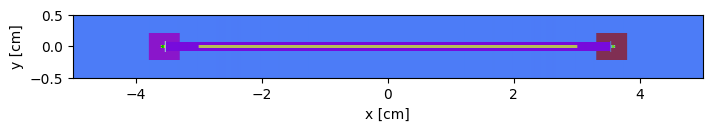

In [10]:
# Universe 1: Internal Fuel Plate for NFE with Cadmium Wires
cell0011 = openmc.Cell(
    fill=Meat,
    region=+sur0001 & -sur0002 & +sur0003 & -sur0004 & +sur0005 & -sur0006,
    cell_id=11,
)  # meat
cell0012 = openmc.Cell(
    fill=Al6061,
    region=+sur0007
    & -sur0008
    & +sur0009
    & -sur0010
    & +sur0011
    & -sur0012
    & (-sur0001 | +sur0002 | -sur0003 | +sur0004 | -sur0005 | +sur0006),
    cell_id=12,
)  # cladding
cell0013 = openmc.Cell(
    fill=Cadmium, region=-sur0013 & +sur0015 & -sur0016, cell_id=13
)  # cadmium wire left
cell0014 = openmc.Cell(
    fill=Cadmium, region=-sur0014 & +sur0015 & -sur0016, cell_id=14
)  # cadmium wire right
cell0015 = openmc.Cell(
    fill=Al6061,
    region=+sur0029
    & -sur0030
    & +sur0031
    & -sur0032
    & +sur0033
    & -sur0034
    & (-sur0007 | +sur0008 | -sur0009 | +sur0010 | -sur0011 | +sur0012)
    & (-sur0017 | +sur0018 | -sur0019 | +sur0020 | -sur0021 | +sur0022)
    & (-sur0041 | +sur0042 | -sur0043 | +sur0044 | -sur0045 | +sur0046)
    & (-sur0053 | +sur0054 | -sur0055 | +sur0056 | -sur0057 | +sur0058),
    cell_id=15,
)  # side plate left
cell0016 = openmc.Cell(
    fill=Al6061,
    region=+sur0035
    & -sur0036
    & +sur0037
    & -sur0038
    & +sur0039
    & -sur0040
    & (-sur0007 | +sur0008 | -sur0009 | +sur0010 | -sur0011 | +sur0012)
    & (-sur0023 | +sur0024 | -sur0025 | +sur0026 | -sur0027 | +sur0028)
    & (-sur0047 | +sur0048 | -sur0049 | +sur0050 | -sur0051 | +sur0052)
    & (-sur0059 | +sur0060 | -sur0061 | +sur0062 | -sur0063 | +sur0064),
    cell_id=16,
)  # side plate left
cell0017 = openmc.Cell(
    fill=H2O,
    region=+sur0041 & -sur0042 & +sur0043 & -sur0044 & +sur0045 & -sur0046,
    cell_id=17,
)  # h.s. left
cell0018 = openmc.Cell(
    fill=H2O,
    region=+sur0047 & -sur0048 & +sur0049 & -sur0050 & +sur0051 & -sur0052,
    cell_id=18,
)  # h.s. right
cell0019 = openmc.Cell(
    fill=H2O,
    region=(+sur0017 & -sur0018 & +sur0019 & -sur0020 & +sur0021 & -sur0022)
    & (+sur0013 | -sur0015 | +sur0016),
    cell_id=19,
)  # cd wire slot left
cell0020 = openmc.Cell(
    fill=H2O,
    region=(+sur0023 & -sur0024 & +sur0025 & -sur0026 & +sur0027 & -sur0028)
    & (+sur0014 | -sur0015 | +sur0016),
    cell_id=20,
)  # cd wire slot right
cell0021 = openmc.Cell(
    fill=H2O,
    region=(-sur0007 | +sur0008 | -sur0009 | +sur0010 | -sur0011 | +sur0012)
    & (-sur0029 | +sur0030 | -sur0031 | +sur0032 | -sur0033 | +sur0034)
    & (-sur0035 | +sur0036 | -sur0037 | +sur0038 | -sur0039 | +sur0040)
    & (-sur0041 | +sur0042 | -sur0043 | +sur0044 | -sur0045 | +sur0046)
    & (-sur0047 | +sur0048 | -sur0049 | +sur0050 | -sur0051 | +sur0052)
    & (-sur0053 | +sur0054 | -sur0055 | +sur0056 | -sur0057 | +sur0058)
    & (-sur0059 | +sur0060 | -sur0061 | +sur0062 | -sur0063 | +sur0064),
    cell_id=21,
)  # outside
cell0022 = openmc.Cell(
    fill=H2O,
    region=+sur0053 & -sur0054 & +sur0055 & -sur0056 & +sur0057 & -sur0058,
    cell_id=22,
)  # water in h.s.
cell0023 = openmc.Cell(
    fill=H2O,
    region=+sur0059 & -sur0060 & +sur0061 & -sur0062 & +sur0063 & -sur0064,
    cell_id=23,
)  # water in h.s.

u001 = openmc.Universe(
    cells=[
        cell0011,
        cell0012,
        cell0013,
        cell0014,
        cell0015,
        cell0016,
        cell0017,
        cell0018,
        cell0019,
        cell0020,
        cell0021,
        cell0022,
        cell0023,
    ],
    universe_id=101,
)
# cell1000 = openmc.Cell(fill=u001, region=+sur0065&-sur0066&+sur0067&-sur0068&+sur0069&-sur0070, cell_id=24)
plot_args = {"origin": (0, 0, -15), "width": (10, 1)}
if plots:
    u001.plot(**plot_args)

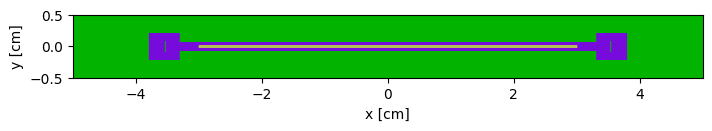

In [11]:
# Universe 2: Internal Fuel Plate for NFE without Cadmium Wires
cell0024 = openmc.Cell(
    fill=Meat,
    region=+sur0001 & -sur0002 & +sur0003 & -sur0004 & +sur0005 & -sur0006,
    cell_id=24,
)  # meat
cell0025 = openmc.Cell(
    fill=Al6061,
    region=+sur0007
    & -sur0008
    & +sur0009
    & -sur0010
    & +sur0011
    & -sur0012
    & (-sur0001 | +sur0002 | -sur0003 | +sur0004 | -sur0005 | +sur0006),
    cell_id=25,
)  # cladding
cell0026 = openmc.Cell(
    fill=Al6061,
    region=+sur0029
    & -sur0030
    & +sur0031
    & -sur0032
    & +sur0033
    & -sur0034
    & (-sur0007 | +sur0008 | -sur0009 | +sur0010 | -sur0011 | +sur0012)
    & (-sur0041 | +sur0042 | -sur0043 | +sur0044 | -sur0045 | +sur0046)
    & (-sur0053 | +sur0054 | -sur0055 | +sur0056 | -sur0057 | +sur0058),
    cell_id=26,
)  # side plate left
cell0027 = openmc.Cell(
    fill=Al6061,
    region=+sur0035
    & -sur0036
    & +sur0037
    & -sur0038
    & +sur0039
    & -sur0040
    & (-sur0007 | +sur0008 | -sur0009 | +sur0010 | -sur0011 | +sur0012)
    & (-sur0047 | +sur0048 | -sur0049 | +sur0050 | -sur0051 | +sur0052)
    & (-sur0059 | +sur0060 | -sur0061 | +sur0062 | -sur0063 | +sur0064),
    cell_id=27,
)  # side plate right
cell0028 = openmc.Cell(
    fill=H2O,
    region=+sur0041 & -sur0042 & +sur0043 & -sur0044 & +sur0045 & -sur0046,
    cell_id=28,
)  # h.s. left
cell0029 = openmc.Cell(
    fill=H2O,
    region=+sur0047 & -sur0048 & +sur0049 & -sur0050 & +sur0051 & -sur0052,
    cell_id=29,
)  # h.s. right
cell0030 = openmc.Cell(
    fill=H2O,
    region=(-sur0007 | +sur0008 | -sur0009 | +sur0010 | -sur0011 | +sur0012)
    & (-sur0029 | +sur0030 | -sur0031 | +sur0032 | -sur0033 | +sur0034)
    & (-sur0035 | +sur0036 | -sur0037 | +sur0038 | -sur0039 | +sur0040)
    & (-sur0041 | +sur0042 | -sur0043 | +sur0044 | -sur0045 | +sur0046)
    & (-sur0047 | +sur0048 | -sur0049 | +sur0050 | -sur0051 | +sur0052)
    & (-sur0053 | +sur0054 | -sur0055 | +sur0056 | -sur0057 | +sur0058)
    & (-sur0059 | +sur0060 | -sur0061 | +sur0062 | -sur0063 | +sur0064),
    cell_id=30,
)  # outside
cell0031 = openmc.Cell(
    fill=H2O,
    region=+sur0053 & -sur0054 & +sur0055 & -sur0056 & +sur0057 & -sur0058,
    cell_id=31,
)  # water in h.s.
cell0032 = openmc.Cell(
    fill=H2O,
    region=+sur0059 & -sur0060 & +sur0061 & -sur0062 & +sur0063 & -sur0064,
    cell_id=32,
)  # water in h.s

u002 = openmc.Universe(
    cells=[
        cell0024,
        cell0025,
        cell0026,
        cell0027,
        cell0028,
        cell0029,
        cell0030,
        cell0031,
        cell0032,
    ],
    universe_id=102,
)
plot_args = {"origin": (0, 0, -15), "width": (10, 1), "color_by": "material"}
if plots:
    u002.plot(**plot_args)

# cell1000 = openmc.Cell(fill=u002, region=+sur0906&-sur0907&+sur0908&-sur0909&+sur0910&-sur0911, cell_id=1000)
# root_universe = openmc.Universe(cells=[cell1000])

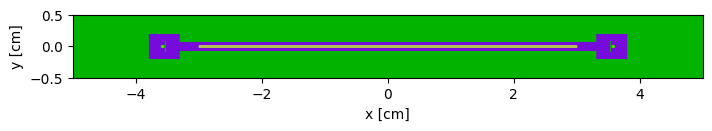

In [12]:
# Universe 3: Fuel Plate with Burnable Poisons for CFE
cell0046 = openmc.Cell(
    fill=Meat,
    region=+sur0001 & -sur0002 & +sur0003 & -sur0004 & +sur0005 & -sur0006,
    cell_id=46,
)  # meat
cell0047 = openmc.Cell(
    fill=Al6061,
    region=+sur0007
    & -sur0008
    & +sur0009
    & -sur0010
    & +sur0011
    & -sur0012
    & (-sur0001 | +sur0002 | -sur0003 | +sur0004 | -sur0005 | +sur0006),
    cell_id=47,
)  # cladding
cell0048 = openmc.Cell(
    fill=Cadmium, region=-sur0013 & +sur0015 & -sur0016, cell_id=48
)  # cadmium wire left
cell0049 = openmc.Cell(
    fill=Cadmium, region=-sur0014 & +sur0015 & -sur0016, cell_id=49
)  # cadmium wire right
cell0050 = openmc.Cell(
    fill=Al6061,
    region=+sur0104
    & -sur0105
    & +sur0106
    & -sur0107
    & +sur0108
    & -sur0109
    & (-sur0007 | +sur0008 | -sur0009 | +sur0010 | -sur0011 | +sur0012)
    & (-sur0128 | +sur0129 | -sur0130 | +sur0131 | -sur0132 | +sur0133)
    & (-sur0116 | +sur0117 | -sur0118 | +sur0119 | -sur0120 | +sur0121)
    & (-sur0152 | +sur0153 | -sur0154 | +sur0155 | -sur0156 | +sur0157),
    cell_id=50,
)  # side plate left
cell0051 = openmc.Cell(
    fill=Al6061,
    region=+sur0110
    & -sur0111
    & +sur0112
    & -sur0113
    & +sur0114
    & -sur0115
    & (-sur0007 | +sur0008 | -sur0009 | +sur0010 | -sur0011 | +sur0012)
    & (-sur0134 | +sur0135 | -sur0136 | +sur0137 | -sur0138 | +sur0139)
    & (-sur0122 | +sur0123 | -sur0124 | +sur0125 | -sur0126 | +sur0127)
    & (-sur0158 | +sur0159 | -sur0160 | +sur0161 | -sur0162 | +sur0163),
    cell_id=51,
)  # side plate right
cell0052 = openmc.Cell(
    fill=H2O,
    region=(-sur0007 | +sur0008 | -sur0009 | +sur0010 | -sur0011 | +sur0012)
    & (-sur0104 | +sur0105 | -sur0106 | +sur0107 | -sur0108 | +sur0109)
    & (-sur0110 | +sur0111 | -sur0112 | +sur0113 | -sur0114 | +sur0115)
    & (-sur0116 | +sur0117 | -sur0118 | +sur0118 | -sur0120 | +sur0121)
    & (-sur0122 | +sur0123 | -sur0124 | +sur0125 | -sur0126 | +sur0127)
    & (-sur0152 | +sur0153 | -sur0154 | +sur0155 | -sur0156 | +sur0157)
    & (-sur0158 | +sur0159 | -sur0160 | +sur0161 | -sur0162 | +sur0163),
    cell_id=52,
)  # water outside
cell0053 = openmc.Cell(
    fill=H2O,
    region=+sur0128
    & -sur0129
    & +sur0130
    & -sur0131
    & +sur0132
    & -sur0133
    & (+sur0013 | -sur0015 | +sur0016),
    cell_id=53,
)  # slot for cd wire left
cell0054 = openmc.Cell(
    fill=H2O,
    region=+sur0134
    & -sur0135
    & +sur0136
    & -sur0137
    & +sur0138
    & -sur0139
    & (+sur0014 | -sur0015 | +sur0016),
    cell_id=54,
)  # slot for cd wire right
cell0055 = openmc.Cell(
    fill=H2O,
    region=+sur0116 & -sur0117 & +sur0118 & -sur0119 & +sur0120 & -sur0121,
    cell_id=55,
)
cell0056 = openmc.Cell(
    fill=H2O,
    region=+sur0122 & -sur0123 & +sur0124 & -sur0125 & +sur0126 & -sur0127,
    cell_id=56,
)  #
cell0057 = openmc.Cell(
    fill=H2O,
    region=+sur0152 & -sur0153 & +sur0154 & -sur0155 & +sur0156 & -sur0157,
    cell_id=57,
)  # water in the h.s
cell0058 = openmc.Cell(
    fill=H2O,
    region=+sur0158 & -sur0159 & +sur0160 & -sur0161 & +sur0162 & -sur0163,
    cell_id=58,
)  # water in the h.s.

u003 = openmc.Universe(
    cells=[
        cell0046,
        cell0047,
        cell0048,
        cell0049,
        cell0050,
        cell0051,
        cell0052,
        cell0053,
        cell0054,
        cell0055,
        cell0056,
        cell0057,
        cell0058,
    ],
    universe_id=103,
)

plot_args = {"origin": (0, 0, -15), "width": (10, 1), "color_by": "material"}
if plots:
    u003.plot(**plot_args)

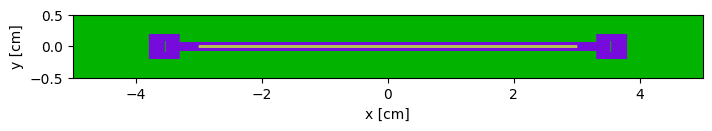

In [13]:
# Universe 4: Fuel Plate with Burnable Poisons for CFE
cell0059 = openmc.Cell(
    fill=Meat,
    region=+sur0001 & -sur0002 & +sur0003 & -sur0004 & +sur0005 & -sur0006,
    cell_id=59,
)  # meat
cell0060 = openmc.Cell(
    fill=Al6061,
    region=+sur0007
    & -sur0008
    & +sur0009
    & -sur0010
    & +sur0011
    & -sur0012
    & (-sur0001 | +sur0002 | -sur0003 | +sur0004 | -sur0005 | +sur0006),
    cell_id=60,
)  # cladding
cell0061 = openmc.Cell(
    fill=Al6061,
    region=+sur0104
    & -sur0105
    & +sur0106
    & -sur0107
    & +sur0108
    & -sur0109
    & (-sur0007 | +sur0008 | -sur0009 | +sur0010 | -sur0011 | +sur0012)
    & (-sur0116 | +sur0117 | -sur0118 | +sur0119 | -sur0120 | +sur0121)
    & (-sur0152 | +sur0153 | -sur0154 | +sur0155 | -sur0156 | +sur0157),
    cell_id=61,
)  # side plate left
cell0062 = openmc.Cell(
    fill=Al6061,
    region=+sur0110
    & -sur0111
    & +sur0112
    & -sur0113
    & +sur0114
    & -sur0115
    & (-sur0007 | +sur0008 | -sur0009 | +sur0010 | -sur0011 | +sur0012)
    & (-sur0122 | +sur0123 | -sur0124 | +sur0125 | -sur0126 | +sur0127)
    & (-sur0158 | +sur0159 | -sur0160 | +sur0161 | -sur0162 | +sur0163),
    cell_id=62,
)  # side plate right
cell0063 = openmc.Cell(
    fill=H2O,
    region=(-sur0007 | +sur0008 | -sur0009 | +sur0010 | -sur0011 | +sur0012)
    & (-sur0104 | +sur0105 | -sur0106 | +sur0107 | -sur0108 | +sur0109)
    & (-sur0110 | +sur0111 | -sur0112 | +sur0113 | -sur0114 | +sur0115)
    & (-sur0116 | +sur0117 | -sur0118 | +sur0118 | -sur0120 | +sur0121)
    & (-sur0122 | +sur0123 | -sur0124 | +sur0125 | -sur0126 | +sur0127),
    cell_id=63,
)  # water outside
cell0064 = openmc.Cell(
    fill=H2O,
    region=+sur0116 & -sur0117 & +sur0118 & -sur0119 & +sur0120 & -sur0121,
    cell_id=64,
)
cell0065 = openmc.Cell(
    fill=H2O,
    region=+sur0122 & -sur0123 & +sur0124 & -sur0125 & +sur0126 & -sur0127,
    cell_id=65,
)  #
cell0066 = openmc.Cell(
    fill=H2O,
    region=+sur0152 & -sur0153 & +sur0154 & -sur0155 & +sur0156 & -sur0157,
    cell_id=66,
)  # water in the h.s
cell0067 = openmc.Cell(
    fill=H2O,
    region=+sur0158 & -sur0159 & +sur0160 & -sur0161 & +sur0162 & -sur0163,
    cell_id=67,
)  # water in the h.s.

u004 = openmc.Universe(
    cells=[
        cell0059,
        cell0060,
        cell0061,
        cell0062,
        cell0063,
        cell0064,
        cell0065,
        cell0066,
        cell0067,
    ],
    universe_id=104,
)

plot_args = {"origin": (0, 0, -15), "width": (10, 1), "color_by": "material"}
if plots:
    u004.plot(**plot_args)

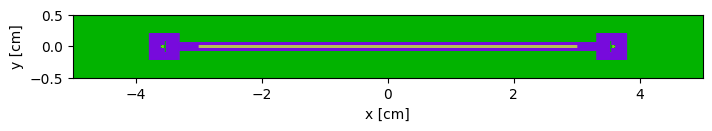

In [14]:
# Universe 9: External Fuel Plate for NFE
cell0033 = openmc.Cell(
    fill=Meat,
    region=+sur0001 & -sur0002 & +sur0003 & -sur0004 & +sur0005 & -sur0006,
    cell_id=33,
)  # meat
cell0034 = openmc.Cell(
    fill=Al6061,
    region=+sur0065
    & -sur0066
    & +sur0067
    & -sur0068
    & +sur0069
    & -sur0070
    & (-sur0001 | +sur0002 | -sur0003 | +sur0004 | -sur0005 | +sur0006),
    cell_id=34,
)  # cladding
cell0035 = openmc.Cell(
    fill=Cadmium, region=-sur0013 & +sur0015 & -sur0016, cell_id=35
)  # cadmium wire left
cell0036 = openmc.Cell(
    fill=Cadmium, region=-sur0014 & +sur0015 & -sur0016, cell_id=36
)  # cadmium wire right
cell0037 = openmc.Cell(
    fill=Al6061,
    region=+sur0029
    & -sur0030
    & +sur0031
    & -sur0032
    & +sur0033
    & -sur0034
    & (-sur0065 | +sur0066 | -sur0067 | +sur0068 | -sur0069 | +sur0070)
    & (-sur0071 | +sur0072 | -sur0073 | +sur0074 | -sur0075 | +sur0076)
    & (-sur0083 | +sur0084 | -sur0085 | +sur0086 | -sur0087 | +sur0088),
    cell_id=37,
)  # side plate left
cell0038 = openmc.Cell(
    fill=Al6061,
    region=+sur0035
    & -sur0036
    & +sur0037
    & -sur0038
    & +sur0039
    & -sur0040
    & (-sur0065 | +sur0066 | -sur0067 | +sur0068 | -sur0069 | +sur0070)
    & (-sur0077 | +sur0078 | -sur0079 | +sur0080 | -sur0081 | +sur0082)
    & (-sur0089 | +sur0090 | -sur0091 | +sur0092 | -sur0093 | +sur0094),
    cell_id=38,
)  # side plate right
cell0039 = openmc.Cell(
    fill=H2O,
    region=(+sur0071 & -sur0072 & +sur0073 & -sur0074 & +sur0075 & -sur0076)
    & (+sur0013 | -sur0015 | +sur0016),
    cell_id=39,
)  # slot for Cd wire left
cell0040 = openmc.Cell(
    fill=H2O,
    region=(+sur0077 & -sur0078 & +sur0079 & -sur0080 & +sur0081 & -sur0082)
    & (+sur0014 | -sur0015 | +sur0016),
    cell_id=40,
)  # slot for Cd Wire right
cell0041 = openmc.Cell(
    fill=H2O,
    region=(-sur0065 | +sur0066 | -sur0067 | +sur0068 | -sur0069 | +sur0070)
    & (-sur0029 | +sur0030 | -sur0031 | +sur0032 | -sur0033 | +sur0034)
    & (-sur0035 | +sur0036 | -sur0037 | +sur0038 | -sur0039 | +sur0040)
    & (-sur0083 | +sur0084 | -sur0085 | +sur0086 | -sur0087 | +sur0088)
    & (-sur0089 | +sur0090 | -sur0091 | +sur0092 | -sur0093 | +sur0094),
    cell_id=41,
)  # water outside
cell0042 = openmc.Cell(
    fill=H2O,
    region=+sur0083 & -sur0084 & +sur0085 & -sur0086 & +sur0087 & -sur0088,
    cell_id=42,
)  # water in h.s. left
cell0043 = openmc.Cell(
    fill=H2O,
    region=+sur0089 & -sur0090 & +sur0091 & -sur0092 & +sur0093 & -sur0094,
    cell_id=43,
)  # water in h.s. right

u009 = openmc.Universe(
    cells=[
        cell0033,
        cell0034,
        cell0035,
        cell0036,
        cell0037,
        cell0038,
        cell0039,
        cell0040,
        cell0041,
        cell0042,
        cell0043,
    ],
    universe_id=109,
)
plot_args = {"origin": (0, 0, -15), "width": (10, 1), "color_by": "material"}
if plots:
    u009.plot(**plot_args)

In [15]:
# Universe 5: Fuel Plate Arrangement for NFE
# Universe for empty water position for NFE
cell0044 = openmc.Cell(
    fill=H2O,
    region=+sur0095 & -sur0096 & +sur0097 & -sur0098 & +sur0099 & -sur0100,
    cell_id=44,
)

u005 = openmc.Universe(cells=[cell0044])

latt05 = openmc.RectLattice(lattice_id=1005)
latt05.lower_left = (-3.85, -4.41)
latt05.pitch = (7.7, 0.42)
latt05.universes = [
    [u005],
    [u009],
    [u002],
    [u001],
    [u002],
    [u001],
    [u002],
    [u001],
    [u002],
    [u001],
    [u002],
    [u001],
    [u002],
    [u001],
    [u002],
    [u001],
    [u002],
    [u001],
    [u002],
    [u009],
    [u005],
]

# cell0045 = openmc.Cell(fill=latt05, region=+sur0900&-sur0901&+sur0902&-sur0903&+sur0904&-sur0905, cell_id=45)
# u1111 = openmc.Universe(cells=[cell0045])
# if plots:
#    u1111.plot()
# root_universe = openmc.Universe(cells=[cell0045])

In [16]:
# Universe 6: Fuel Plate Arrangement for CFE
latt06 = openmc.RectLattice(lattice_id=1006)
latt06.lower_left = (-3.85, -2.87)
latt06.pitch = (7.7, 0.41)
latt06.outer = u_water
latt06.universes = [
    [u003],
    [u004],
    [u003],
    [u004],
    [u003],
    [u004],
    [u003],
    [u003],
    [u004],
    [u003],
    [u004],
    [u003],
    [u004],
    [u003],
]

# cell1112 = openmc.Cell(fill=latt06, region=+sur0900&-sur0901&+sur0902&-sur0903&+sur0904&-sur0905, cell_id=45)
# c_test = openmc.Cell(fill=latt06)
# utest = openmc.Universe(cells=[c_test])
# plot_args = {'origin':(0,0,0), 'width':(10,1000), 'color_by':'material'}
# utest.plot(width=(10,10))

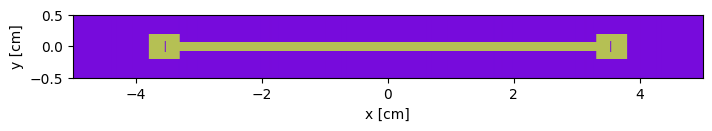

In [17]:
# Universe 7: Internal Control Guide Plate
cell0068 = openmc.Cell(
    fill=Al6061,
    region=+sur0164 & -sur0165 & +sur0166 & -sur0167 & +sur0168 & -sur0169,
    cell_id=68,
)  # guide plate
cell0069 = openmc.Cell(
    fill=Al6061,
    region=+sur0104
    & -sur0105
    & +sur0106
    & -sur0107
    & +sur0108
    & -sur0109
    & (-sur0164 | +sur0165 | -sur0166 | +sur0167 | -sur0168 | +sur0169)
    & (-sur0116 | +sur0117 | -sur0118 | +sur0119 | -sur0120 | +sur0121)
    & (-sur0152 | +sur0153 | -sur0154 | +sur0155 | -sur0156 | +sur0157),
    cell_id=69,
)  # side plate left
cell0070 = openmc.Cell(
    fill=Al6061,
    region=+sur0110
    & -sur0111
    & +sur0112
    & -sur0113
    & +sur0114
    & -sur0115
    & (-sur0164 | +sur0165 | -sur0166 | +sur0167 | -sur0168 | +sur0169)
    & (-sur0122 | +sur0123 | -sur0124 | +sur0125 | -sur0126 | +sur0127)
    & (-sur0158 | +sur0159 | -sur0160 | +sur0161 | -sur0162 | +sur0163),
    cell_id=70,
)  # side plate right
cell0071 = openmc.Cell(
    fill=H2O,
    region=(-sur0164 | +sur0165 | -sur0166 | +sur0167 | -sur0168 | +sur0169)
    & (-sur0104 | +sur0105 | -sur0106 | +sur0107 | -sur0108 | +sur0109)
    & (-sur0110 | +sur0111 | -sur0112 | +sur0113 | -sur0114 | +sur0115)
    & (-sur0116 | +sur0117 | -sur0118 | +sur0119 | -sur0120 | +sur0121)
    & (-sur0122 | +sur0123 | -sur0124 | +sur0125 | -sur0126 | +sur0127)
    & (-sur0152 | +sur0153 | -sur0154 | +sur0155 | -sur0156 | +sur0157)
    & (-sur0158 | +sur0159 | -sur0160 | +sur0161 | -sur0162 | +sur0163),
    cell_id=71,
)  # water outside
cell0072 = openmc.Cell(
    fill=H2O,
    region=+sur0116 & -sur0117 & +sur0118 & -sur0119 & +sur0120 & -sur0121,
    cell_id=72,
)  # water in the guide plate h.s. left
cell0073 = openmc.Cell(
    fill=H2O,
    region=+sur0122 & -sur0123 & +sur0124 & -sur0125 & +sur0126 & -sur0127,
    cell_id=73,
)  # water in the guide plate h.s. right
cell0074 = openmc.Cell(
    fill=H2O,
    region=+sur0152 & -sur0153 & +sur0154 & -sur0155 & +sur0156 & -sur0157,
    cell_id=74,
)  # water in the fuel plate h.s.left
cell0075 = openmc.Cell(
    fill=H2O,
    region=+sur0158 & -sur0159 & +sur0160 & -sur0161 & +sur0162 & -sur0163,
    cell_id=75,
)  # water in the fuel plate h.s. right

u007 = openmc.Universe(
    cells=[
        cell0068,
        cell0069,
        cell0070,
        cell0071,
        cell0072,
        cell0073,
        cell0074,
        cell0075,
    ],
    universe_id=107,
)

plot_args = {"origin": (0, 0, -15), "width": (10, 1), "color_by": "material"}
if plots:
    u007.plot(**plot_args)

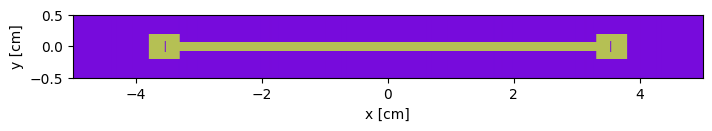

In [18]:
# Universe 77: External Control Guide Plate
cell0076 = openmc.Cell(
    fill=Al6061,
    region=+sur0170 & -sur0171 & +sur0172 & -sur0173 & +sur0174 & -sur0175,
    cell_id=76,
)  # guide plate
cell0077 = openmc.Cell(
    fill=Al6061,
    region=+sur0104
    & -sur0105
    & +sur0106
    & -sur0107
    & +sur0108
    & -sur0109
    & (-sur0170 | +sur0171 | -sur0172 | +sur0173 | -sur0174 | +sur0175)
    & (-sur0140 | +sur0141 | -sur0142 | +sur0143 | -sur0144 | +sur0145),
    cell_id=77,
)  # side plate left
cell0078 = openmc.Cell(
    fill=Al6061,
    region=+sur0110
    & -sur0111
    & +sur0112
    & -sur0113
    & +sur0114
    & -sur0115
    & (-sur0170 | +sur0171 | -sur0172 | +sur0173 | -sur0174 | +sur0175)
    & (-sur0146 | +sur0147 | -sur0148 | +sur0149 | -sur0150 | +sur0151),
    cell_id=78,
)  # side plate right
cell0079 = openmc.Cell(
    fill=H2O,
    region=(-sur0170 | +sur0171 | -sur0172 | +sur0173 | -sur0174 | +sur0175)
    & (-sur0104 | +sur0105 | -sur0106 | +sur0107 | -sur0108 | +sur0109)
    & (-sur0110 | +sur0111 | -sur0112 | +sur0113 | -sur0114 | +sur0115)
    & (-sur0140 | +sur0141 | -sur0142 | +sur0143 | -sur0144 | +sur0145)
    & (-sur0146 | +sur0147 | -sur0148 | +sur0149 | -sur0150 | +sur0151),
    cell_id=79,
)  # water
cell0080 = openmc.Cell(
    fill=H2O,
    region=+sur0140 & -sur0141 & +sur0142 & -sur0143 & +sur0144 & -sur0145,
    cell_id=80,
)  # water in the guide plate h.s. left
cell0081 = openmc.Cell(
    fill=H2O,
    region=+sur0146 & -sur0147 & +sur0148 & -sur0149 & +sur0150 & -sur0151,
    cell_id=81,
)  # water in the guide plate h.s. right

u077 = openmc.Universe(
    cells=[cell0076, cell0077, cell0078, cell0079, cell0080, cell0081], universe_id=177
)

plot_args = {"origin": (0, 0, -15), "width": (10, 1), "color_by": "material"}
if plots:
    u077.plot(**plot_args)

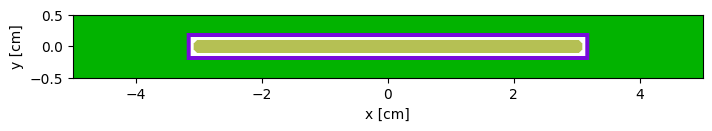

In [19]:
# Universe 8: Absorbent Plate
inside_agincd = (
    (+sur0176 & -sur0177 & +sur0178 & -sur0179 & +sur0180 & -sur0181)
    | (-sur0194 & +sur0197 & -sur0198)
    | (-sur0195 & +sur0197 & -sur0198) & (+sur0196 | -sur0197 | +sur0198)
)
cell0082 = openmc.Cell(fill=AgInCd, region=inside_agincd, cell_id=82)
cell0083 = openmc.Cell(
    fill=None,
    region=+sur0188
    & -sur0189
    & +sur0190
    & -sur0191
    & +sur0192
    & -sur0193
    & (~inside_agincd),
    cell_id=83,
)
cell0084 = openmc.Cell(
    fill=SS304L,
    region=(-sur0188 | +sur0189 | -sur0190 | +sur0191 | -sur0192 | +sur0193)
    & (+sur0182 & -sur0183 & +sur0184 & -sur0185 & +sur0186 & -sur0187),
    cell_id=84,
)
cell0085 = openmc.Cell(
    fill=H2O,
    region=(-sur0182 | +sur0183 | -sur0184 | +sur0185 | -sur0186 | +sur0187),
    cell_id=85,
)

u008 = openmc.Universe(cells=[cell0082, cell0083, cell0084, cell0085], universe_id=108)

plot_args = {"origin": (0, 0, -15), "width": (10, 1), "color_by": "material"}
if plots:
    u008.plot(**plot_args)

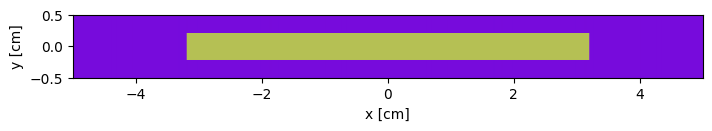

In [20]:
# Universe 88: Absorbent Plate SS
cell0882 = openmc.Cell(fill=SS304L, region=inside_agincd, cell_id=882)
cell0883 = openmc.Cell(
    fill=SS304L,
    region=+sur0188
    & -sur0189
    & +sur0190
    & -sur0191
    & +sur0192
    & -sur0193
    & (~inside_agincd),
    cell_id=883,
)
cell0884 = openmc.Cell(
    fill=SS304L,
    region=(-sur0188 | +sur0189 | -sur0190 | +sur0191 | -sur0192 | +sur0193)
    & (+sur0182 & -sur0183 & +sur0184 & -sur0185 & +sur0186 & -sur0187),
    cell_id=884,
)
cell0885 = openmc.Cell(
    fill=H2O,
    region=(-sur0182 | +sur0183 | -sur0184 | +sur0185 | -sur0186 | +sur0187),
    cell_id=885,
)

u088 = openmc.Universe(cells=[cell0882, cell0883, cell0884, cell0885], universe_id=188)

plot_args = {"origin": (0, 0, -15), "width": (10, 1), "color_by": "material"}
if plots:
    u088.plot(**plot_args)

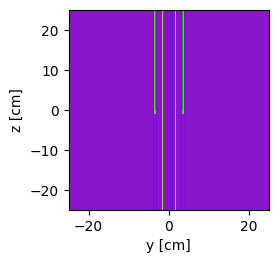

In [21]:
# Universe 10: Control Fuel Element #1
in0086 = +sur0199 & -sur0200 & +sur0201 & -sur0202 & +sur0203 & -sur0204
cell0086 = openmc.Cell(
    fill=latt06,
    region=+sur0199 & -sur0200 & +sur0201 & -sur0202 & +sur0203 & -sur0204,
    cell_id=86,
)  # fuel arr.
cell0086.translation = (0.0, -0.205, 0.0)
in0087 = +sur0205 & -sur0206 & +sur0207 & -sur0208 & +sur0209 & -sur0210
cell0087 = openmc.Cell(fill=u007, region=in0087, cell_id=87)
cell0087.translation = (0.0, -3.075, 0.0)
in0088 = +sur0211 & -sur0212 & +sur0213 & -sur0214 & +sur0215 & -sur0216
cell0088 = openmc.Cell(fill=Al6061, region=in0088, cell_id=88)
in0089 = +sur0217 & -sur0218 & +sur0219 & -sur0220 & +sur0221 & -sur0222
cell0089 = openmc.Cell(fill=Al6061, region=in0089, cell_id=89)
in0090 = +sur0223 & -sur0224 & +sur0225 & -sur0226 & +sur0227 & -sur0228
cell0090 = openmc.Cell(fill=u008, region=in0090, cell_id=90)
cell0090.translation = (0.0, -3.445, cfe1)
in0091 = +sur0229 & -sur0230 & +sur0231 & -sur0232 & +sur0233 & -sur0234
cell0091 = openmc.Cell(fill=u077, region=in0091, cell_id=91)
cell0091.translation = (0.0, -3.815, 0.0)
in0092 = +sur0235 & -sur0236 & +sur0237 & -sur0238 & +sur0239 & -sur0240
cell0092 = openmc.Cell(fill=u007, region=in0092, cell_id=92)
cell0092.translation = (0.0, 3.075, 0.0)
in0093 = +sur0241 & -sur0242 & +sur0243 & -sur0244 & +sur0245 & -sur0246
cell0093 = openmc.Cell(fill=Al6061, region=in0093, cell_id=93)
in0094 = +sur0247 & -sur0248 & +sur0249 & -sur0250 & +sur0251 & -sur0252
cell0094 = openmc.Cell(fill=Al6061, region=in0094, cell_id=94)
in0095 = +sur0253 & -sur0254 & +sur0255 & -sur0256 & +sur0257 & -sur0258
cell0095 = openmc.Cell(fill=u008, region=in0095, cell_id=95)
cell0095.translation = (0.0, 3.445, cfe1)
in0096 = +sur0259 & -sur0260 & +sur0261 & -sur0262 & +sur0263 & -sur0264
cell0096 = openmc.Cell(fill=u077, region=in0096, cell_id=96)
cell0096.translation = (0.0, 3.815, 0.0)
in0098 = -sur0302 & +sur0303 & -sur0304
cell0098 = openmc.Cell(fill=H2O, region=in0098, cell_id=98)
in0099 = (+sur0302 | -sur0303 | +sur0304) & (-sur0305 & +sur0303 & -sur0304)
cell0099 = openmc.Cell(fill=Al6061, region=in0099, cell_id=99)
cell0097 = openmc.Cell(
    fill=H2O,
    region=-sur0265
    & (~in0086)
    & (~in0087)
    & (~in0088)
    & (~in0089)
    & (~in0090)
    & (~in0091)
    & (~in0092)
    & (~in0093)
    & (~in0094)
    & (~in0095)
    & (~in0096)
    & (~in0098)
    & (~in0099),
    cell_id=97,
)

u010 = openmc.Universe(
    cells=[
        cell0086,
        cell0087,
        cell0088,
        cell0089,
        cell0090,
        cell0091,
        cell0092,
        cell0093,
        cell0094,
        cell0095,
        cell0096,
        cell0097,
        cell0098,
        cell0099,
    ],
    universe_id=110,
)

# cell9999 = openmc.Cell(fill=u010, region=+sur0900&-sur0901&+sur0902&-sur0903&+sur0904&-sur0905, cell_id=9999)
# root_universe = openmc.Universe(cells=[cell9999])
plot_args = {
    "basis": "yz",
    "origin": (0, 0, 0),
    "width": (50, 50),
    "color_by": "material",
}
if plots:
    u010.plot(**plot_args)

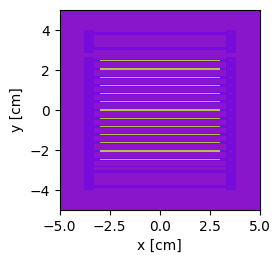

In [22]:
# Universe 11: Control Fuel Element #2
in0100 = +sur0199 & -sur0200 & +sur0201 & -sur0202 & +sur0203 & -sur0204
cell0100 = openmc.Cell(
    fill=latt06,
    region=+sur0199 & -sur0200 & +sur0201 & -sur0202 & +sur0203 & -sur0204,
    cell_id=100,
)  # fuel arr.
cell0100.translation = (0.0, -0.205, 0.0)
in0101 = +sur0205 & -sur0206 & +sur0207 & -sur0208 & +sur0209 & -sur0210
cell0101 = openmc.Cell(fill=u007, region=in0101, cell_id=101)
cell0101.translation = (0.0, -3.075, 0.0)
in0102 = +sur0211 & -sur0212 & +sur0213 & -sur0214 & +sur0215 & -sur0216
cell0102 = openmc.Cell(fill=Al6061, region=in0102, cell_id=102)
in0103 = +sur0217 & -sur0218 & +sur0219 & -sur0220 & +sur0221 & -sur0222
cell0103 = openmc.Cell(fill=Al6061, region=in0103, cell_id=103)
in0104 = +sur0223 & -sur0224 & +sur0225 & -sur0226 & +sur0227 & -sur0228
cell0104 = openmc.Cell(fill=u008, region=in0104, cell_id=104)
cell0104.translation = (0.0, -3.445, cfe2)
in0105 = +sur0229 & -sur0230 & +sur0231 & -sur0232 & +sur0233 & -sur0234
cell0105 = openmc.Cell(fill=u077, region=in0105, cell_id=105)
cell0105.translation = (0.0, -3.815, 0.0)
in0106 = +sur0235 & -sur0236 & +sur0237 & -sur0238 & +sur0239 & -sur0240
cell0106 = openmc.Cell(fill=u007, region=in0106, cell_id=106)
cell0106.translation = (0.0, 3.075, 0.0)
in0107 = +sur0241 & -sur0242 & +sur0243 & -sur0244 & +sur0245 & -sur0246
cell0107 = openmc.Cell(fill=Al6061, region=in0107, cell_id=107)
in0108 = +sur0247 & -sur0248 & +sur0249 & -sur0250 & +sur0251 & -sur0252
cell0108 = openmc.Cell(fill=Al6061, region=in0108, cell_id=108)
in0109 = +sur0253 & -sur0254 & +sur0255 & -sur0256 & +sur0257 & -sur0258
cell0109 = openmc.Cell(fill=u008, region=in0109, cell_id=109)
cell0109.translation = (0.0, 3.445, cfe2)
in0110 = +sur0259 & -sur0260 & +sur0261 & -sur0262 & +sur0263 & -sur0264
cell0110 = openmc.Cell(fill=u077, region=in0110, cell_id=110)
cell0110.translation = (0.0, 3.815, 0.0)
in0112 = -sur0302 & +sur0303 & -sur0304
cell0112 = openmc.Cell(fill=H2O, region=in0112, cell_id=112)
in0113 = (+sur0302 | -sur0303 | +sur0304) & (-sur0305 & +sur0303 & -sur0304)
cell0113 = openmc.Cell(fill=Al6061, region=in0113, cell_id=113)
cell0111 = openmc.Cell(
    fill=H2O,
    region=-sur0265
    & (~in0100)
    & (~in0101)
    & (~in0102)
    & (~in0103)
    & (~in0104)
    & (~in0105)
    & (~in0106)
    & (~in0107)
    & (~in0108)
    & (~in0109)
    & (~in0110)
    & (~in0112)
    & (~in0113),
    cell_id=111,
)

u011 = openmc.Universe(
    cells=[
        cell0100,
        cell0101,
        cell0102,
        cell0103,
        cell0104,
        cell0105,
        cell0106,
        cell0107,
        cell0108,
        cell0109,
        cell0110,
        cell0111,
        cell0112,
        cell0113,
    ],
    universe_id=111,
)

# cell9999 = openmc.Cell(fill=u010, region=+sur0900&-sur0901&+sur0902&-sur0903&+sur0904&-sur0905, cell_id=9999)
# root_universe = openmc.Universe(cells=[cell9999])
plot_args = {"origin": (0, 0, -15), "width": (10, 10), "color_by": "material"}
if plots:
    u011.plot(**plot_args)

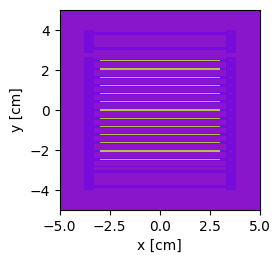

In [23]:
# Universe 12: Control Fuel Element #3
in0114 = +sur0199 & -sur0200 & +sur0201 & -sur0202 & +sur0203 & -sur0204
cell0114 = openmc.Cell(
    fill=latt06,
    region=+sur0199 & -sur0200 & +sur0201 & -sur0202 & +sur0203 & -sur0204,
    cell_id=114,
)  # fuel arr.
cell0114.translation = (0.0, -0.205, 0.0)
in0115 = +sur0205 & -sur0206 & +sur0207 & -sur0208 & +sur0209 & -sur0210
cell0115 = openmc.Cell(fill=u007, region=in0115, cell_id=115)
cell0115.translation = (0.0, -3.075, 0.0)
in0116 = +sur0211 & -sur0212 & +sur0213 & -sur0214 & +sur0215 & -sur0216
cell0116 = openmc.Cell(fill=Al6061, region=in0116, cell_id=116)
in0117 = +sur0217 & -sur0218 & +sur0219 & -sur0220 & +sur0221 & -sur0222
cell0117 = openmc.Cell(fill=Al6061, region=in0117, cell_id=117)
in0118 = +sur0223 & -sur0224 & +sur0225 & -sur0226 & +sur0227 & -sur0228
cell0118 = openmc.Cell(fill=u008, region=in0118, cell_id=118)
cell0118.translation = (0.0, -3.445, cfe3)
in0119 = +sur0229 & -sur0230 & +sur0231 & -sur0232 & +sur0233 & -sur0234
cell0119 = openmc.Cell(fill=u077, region=in0119, cell_id=119)
cell0119.translation = (0.0, -3.815, 0.0)
in0120 = +sur0235 & -sur0236 & +sur0237 & -sur0238 & +sur0239 & -sur0240
cell0120 = openmc.Cell(fill=u007, region=in0120, cell_id=120)
cell0120.translation = (0.0, 3.075, 0.0)
in0121 = +sur0241 & -sur0242 & +sur0243 & -sur0244 & +sur0245 & -sur0246
cell0121 = openmc.Cell(fill=Al6061, region=in0121, cell_id=121)
in0122 = +sur0247 & -sur0248 & +sur0249 & -sur0250 & +sur0251 & -sur0252
cell0122 = openmc.Cell(fill=Al6061, region=in0122, cell_id=122)
in0123 = +sur0253 & -sur0254 & +sur0255 & -sur0256 & +sur0257 & -sur0258
cell0123 = openmc.Cell(fill=u008, region=in0123, cell_id=123)
cell0123.translation = (0.0, 3.445, cfe3)
in0124 = +sur0259 & -sur0260 & +sur0261 & -sur0262 & +sur0263 & -sur0264
cell0124 = openmc.Cell(fill=u077, region=in0124, cell_id=124)
cell0124.translation = (0.0, 3.815, 0.0)
in0126 = -sur0302 & +sur0303 & -sur0304
cell0126 = openmc.Cell(fill=H2O, region=in0126, cell_id=126)
in0127 = (+sur0302 | -sur0303 | +sur0304) & (-sur0305 & +sur0303 & -sur0304)
cell0127 = openmc.Cell(fill=Al6061, region=in0127, cell_id=127)
cell0125 = openmc.Cell(
    fill=H2O,
    region=-sur0265
    & (~in0114)
    & (~in0115)
    & (~in0116)
    & (~in0117)
    & (~in0118)
    & (~in0119)
    & (~in0120)
    & (~in0121)
    & (~in0122)
    & (~in0123)
    & (~in0124)
    & (~in0126)
    & (~in0127),
    cell_id=125,
)

u012 = openmc.Universe(
    cells=[
        cell0114,
        cell0115,
        cell0116,
        cell0117,
        cell0118,
        cell0119,
        cell0120,
        cell0121,
        cell0122,
        cell0123,
        cell0124,
        cell0125,
        cell0126,
        cell0127,
    ],
    universe_id=112,
)

# cell9999 = openmc.Cell(fill=u010, region=+sur0900&-sur0901&+sur0902&-sur0903&+sur0904&-sur0905, cell_id=9999)
# root_universe = openmc.Universe(cells=[cell9999])
plot_args = {"origin": (0, 0, -15), "width": (10, 10), "color_by": "material"}
if plots:
    u012.plot(**plot_args)

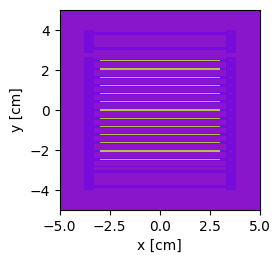

In [24]:
# Universe 13: Control Fuel Element #4
in0128 = +sur0199 & -sur0200 & +sur0201 & -sur0202 & +sur0203 & -sur0204
cell0128 = openmc.Cell(
    fill=latt06,
    region=+sur0199 & -sur0200 & +sur0201 & -sur0202 & +sur0203 & -sur0204,
    cell_id=128,
)  # fuel arr.
cell0128.translation = (0.0, -0.205, 0.0)
in0129 = +sur0205 & -sur0206 & +sur0207 & -sur0208 & +sur0209 & -sur0210
cell0129 = openmc.Cell(fill=u007, region=in0115, cell_id=129)
cell0129.translation = (0.0, -3.075, 0.0)
in0130 = +sur0211 & -sur0212 & +sur0213 & -sur0214 & +sur0215 & -sur0216
cell0130 = openmc.Cell(fill=Al6061, region=in0130, cell_id=130)
in0131 = +sur0217 & -sur0218 & +sur0219 & -sur0220 & +sur0221 & -sur0222
cell0131 = openmc.Cell(fill=Al6061, region=in0131, cell_id=131)
in0132 = +sur0223 & -sur0224 & +sur0225 & -sur0226 & +sur0227 & -sur0228
cell0132 = openmc.Cell(fill=u008, region=in0118, cell_id=132)
cell0132.translation = (0.0, -3.445, cfe4)
in0133 = +sur0229 & -sur0230 & +sur0231 & -sur0232 & +sur0233 & -sur0234
cell0133 = openmc.Cell(fill=u077, region=in0119, cell_id=133)
cell0133.translation = (0.0, -3.815, 0.0)
in0134 = +sur0235 & -sur0236 & +sur0237 & -sur0238 & +sur0239 & -sur0240
cell0134 = openmc.Cell(fill=u007, region=in0134, cell_id=134)
cell0134.translation = (0.0, 3.075, 0.0)
in0135 = +sur0241 & -sur0242 & +sur0243 & -sur0244 & +sur0245 & -sur0246
cell0135 = openmc.Cell(fill=Al6061, region=in0135, cell_id=135)
in0136 = +sur0247 & -sur0248 & +sur0249 & -sur0250 & +sur0251 & -sur0252
cell0136 = openmc.Cell(fill=Al6061, region=in0136, cell_id=136)
in0137 = +sur0253 & -sur0254 & +sur0255 & -sur0256 & +sur0257 & -sur0258
cell0137 = openmc.Cell(fill=u008, region=in0137, cell_id=137)
cell0137.translation = (0.0, 3.445, cfe4)
in0138 = +sur0259 & -sur0260 & +sur0261 & -sur0262 & +sur0263 & -sur0264
cell0138 = openmc.Cell(fill=u077, region=in0138, cell_id=138)
cell0138.translation = (0.0, 3.815, 0.0)
in0140 = -sur0302 & +sur0303 & -sur0304
cell0140 = openmc.Cell(fill=H2O, region=in0140, cell_id=140)
in0141 = (+sur0302 | -sur0303 | +sur0304) & (-sur0305 & +sur0303 & -sur0304)
cell0141 = openmc.Cell(fill=Al6061, region=in0141, cell_id=141)
cell0139 = openmc.Cell(
    fill=H2O,
    region=-sur0265
    & (~in0128)
    & (~in0129)
    & (~in0130)
    & (~in0131)
    & (~in0132)
    & (~in0133)
    & (~in0134)
    & (~in0135)
    & (~in0136)
    & (~in0137)
    & (~in0138)
    & (~in0140)
    & (~in0141),
    cell_id=139,
)

u013 = openmc.Universe(
    cells=[
        cell0128,
        cell0129,
        cell0130,
        cell0131,
        cell0132,
        cell0133,
        cell0134,
        cell0135,
        cell0136,
        cell0137,
        cell0138,
        cell0139,
        cell0140,
        cell0141,
    ],
    universe_id=113,
)

# cell9999 = openmc.Cell(fill=u010, region=+sur0900&-sur0901&+sur0902&-sur0903&+sur0904&-sur0905, cell_id=9999)
# root_universe = openmc.Universe(cells=[cell9999])
plot_args = {"origin": (0, 0, -15), "width": (10, 10), "color_by": "material"}
if plots:
    u013.plot(**plot_args)

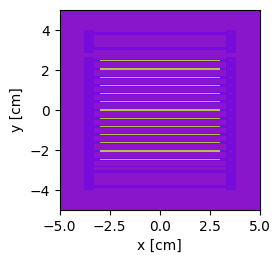

In [25]:
# Control Fuel element Nº5
in01280 = +sur0199 & -sur0200 & +sur0201 & -sur0202 & +sur0203 & -sur0204
cell01280 = openmc.Cell(
    fill=latt06,
    region=+sur0199 & -sur0200 & +sur0201 & -sur0202 & +sur0203 & -sur0204,
    cell_id=1280,
)  # fuel arr.
cell01280.translation = (0.0, -0.205, 0.0)
in01290 = +sur0205 & -sur0206 & +sur0207 & -sur0208 & +sur0209 & -sur0210
cell01290 = openmc.Cell(fill=u007, region=in0115, cell_id=1290)
cell01290.translation = (0.0, -3.075, 0.0)
in01300 = +sur0211 & -sur0212 & +sur0213 & -sur0214 & +sur0215 & -sur0216
cell01300 = openmc.Cell(fill=Al6061, region=in01300, cell_id=1300)
in01310 = +sur0217 & -sur0218 & +sur0219 & -sur0220 & +sur0221 & -sur0222
cell01310 = openmc.Cell(fill=Al6061, region=in01310, cell_id=1310)
in01320 = +sur0223 & -sur0224 & +sur0225 & -sur0226 & +sur0227 & -sur0228
cell01320 = openmc.Cell(fill=u088, region=in0118, cell_id=1320)
cell01320.translation = (0.0, -3.445, cfe5)
in01330 = +sur0229 & -sur0230 & +sur0231 & -sur0232 & +sur0233 & -sur0234
cell01330 = openmc.Cell(fill=u077, region=in0119, cell_id=1330)
cell01330.translation = (0.0, -3.815, 0.0)
in01340 = +sur0235 & -sur0236 & +sur0237 & -sur0238 & +sur0239 & -sur0240
cell01340 = openmc.Cell(fill=u007, region=in01340, cell_id=1340)
cell01340.translation = (0.0, 3.075, 0.0)
in01350 = +sur0241 & -sur0242 & +sur0243 & -sur0244 & +sur0245 & -sur0246
cell01350 = openmc.Cell(fill=Al6061, region=in01350, cell_id=1350)
in01360 = +sur0247 & -sur0248 & +sur0249 & -sur0250 & +sur0251 & -sur0252
cell01360 = openmc.Cell(fill=Al6061, region=in01360, cell_id=1360)
in01370 = +sur0253 & -sur0254 & +sur0255 & -sur0256 & +sur0257 & -sur0258
cell01370 = openmc.Cell(fill=u088, region=in01370, cell_id=1370)
cell01370.translation = (0.0, 3.445, cfe5)
in01380 = +sur0259 & -sur0260 & +sur0261 & -sur0262 & +sur0263 & -sur0264
cell01380 = openmc.Cell(fill=u077, region=in01380, cell_id=1380)
cell01380.translation = (0.0, 3.815, 0.0)
in01400 = -sur0302 & +sur0303 & -sur0304
cell01400 = openmc.Cell(fill=H2O, region=in01400, cell_id=1400)
in01410 = (+sur0302 | -sur0303 | +sur0304) & (-sur0305 & +sur0303 & -sur0304)
cell01410 = openmc.Cell(fill=Al6061, region=in01410, cell_id=1410)
cell01390 = openmc.Cell(
    fill=H2O,
    region=-sur0265
    & (~in0128)
    & (~in0129)
    & (~in0130)
    & (~in0131)
    & (~in0132)
    & (~in0133)
    & (~in0134)
    & (~in0135)
    & (~in0136)
    & (~in0137)
    & (~in0138)
    & (~in0140)
    & (~in0141),
    cell_id=1390,
)

u0130 = openmc.Universe(
    cells=[
        cell01280,
        cell01290,
        cell01300,
        cell01310,
        cell01320,
        cell01330,
        cell01340,
        cell01350,
        cell01360,
        cell01370,
        cell01380,
        cell01390,
        cell01400,
        cell01410,
    ],
    universe_id=1130,
)

# cell9999 = openmc.Cell(fill=u010, region=+sur0900&-sur0901&+sur0902&-sur0903&+sur0904&-sur0905, cell_id=9999)
# root_universe = openmc.Universe(cells=[cell9999])
plot_args = {"origin": (0, 0, -15), "width": (10, 10), "color_by": "material"}
if plots:
    u013.plot(**plot_args)

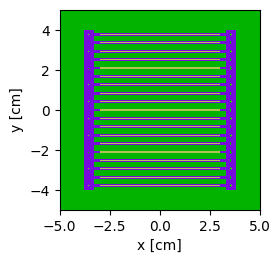

In [26]:
# Universe 15: Normal Fuel Element
cell0142 = openmc.Cell(
    fill=latt05,
    region=+sur0266 & -sur0267 & +sur0268 & -sur0269 & +sur0270 & -sur0271,
    cell_id=142,
)  # fuel arrangement
in0143 = +sur0272 & -sur0273 & +sur0274 & -sur0275 & +sur0276 & -sur0277
cell0143 = openmc.Cell(fill=Al6061, region=in0143, cell_id=143)
in0144 = +sur0278 & -sur0279 & +sur0280 & -sur0281 & +sur0282 & -sur0283
cell0144 = openmc.Cell(fill=Al6061, region=in0144, cell_id=144)
in0145 = +sur0284 & -sur0285 & +sur0286 & -sur0287 & +sur0288 & -sur0289
cell0145 = openmc.Cell(fill=Al6061, region=in0145, cell_id=145)
in0146 = +sur0290 & -sur0291 & +sur0292 & -sur0293 & +sur0294 & -sur0295
cell0146 = openmc.Cell(fill=Al6061, region=in0146, cell_id=146)
in0147 = +sur0358 & -sur0359 & +sur0362 & -sur0363 & +sur0100 & -sur0103
cell0147 = openmc.Cell(fill=Al6061, region=in0147, cell_id=147)
in0148 = +sur0360 & -sur0361 & +sur0362 & -sur0363 & +sur0100 & -sur0103
cell0148 = openmc.Cell(fill=Al6061, region=in0148, cell_id=148)
in0149 = -sur0364 & +sur0359 & -sur0360
cell0149 = openmc.Cell(fill=Al6061, region=in0149, cell_id=149)
in0150 = -sur0302 & +sur0303 & -sur0304
cell0150 = openmc.Cell(fill=H2O, region=in0150, cell_id=150)
in0151 = (+sur0302 | -sur0303 | +sur0304) & (-sur0305 & +sur0303 & -sur0304)
cell0151 = openmc.Cell(fill=Al6061, region=in0151, cell_id=151)
cell0152 = openmc.Cell(
    fill=H2O,
    region=(-sur0266 | +sur0267 | -sur0268 | +sur0269 | -sur0270 | +sur0271)
    & (~in0143)
    & (~in0144)
    & (~in0145)
    & (~in0146)
    & (~in0147)
    & (~in0148)
    & (~in0149)
    & (~in0150)
    & (~in0151),
    cell_id=152,
)

u015 = openmc.Universe(
    cells=[
        cell0142,
        cell0143,
        cell0144,
        cell0145,
        cell0146,
        cell0147,
        cell0148,
        cell0149,
        cell0150,
        cell0151,
        cell0152,
    ],
    universe_id=115,
)
plot_args = {"origin": (0, 0, 0), "width": (10, 10), "color_by": "material"}
if plots:
    u015.plot(**plot_args)

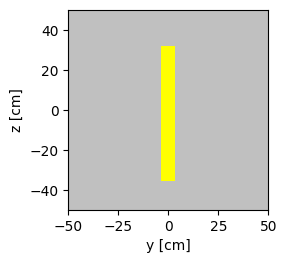

In [27]:
# Universe 2000 Graphite Blocks
# Graphite block
cell2001 = openmc.Cell(
    fill=Graphite,
    region=+sur0365 & -sur0366 & +sur0367 & -sur0368 & +sur0369 & -sur0370,
    cell_id=2001,
)
# Cladding
cell2002 = openmc.Cell(
    fill=Aluminum,
    region=-sur0365 | +sur0366 | -sur0367 | +sur0368 | -sur0369 | +sur0370,
    cell_id=2002,
)
u2000 = openmc.Universe(cells=[cell2001, cell2002], universe_id=2000)
plot_args = {
    "basis": "yz",
    "origin": (0, 0, 0),
    "width": (100, 100),
    "color_by": "material",
    "colors": materials_colors,
}
if plots:
    u2000.plot(**plot_args)

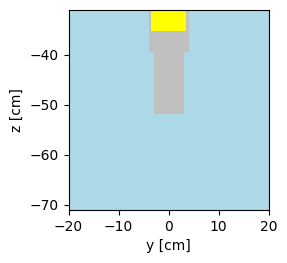

In [28]:
# Universe 2001 Graphite Cladding
# Enclosure of Cladding
cell2003 = openmc.Cell(
    fill=u2000,
    region=+sur0371 & -sur0372 & +sur0373 & -sur0374 & +sur0375 & -sur0376,
    cell_id=2003,
)
# Water surrounding cladding
cell2004 = openmc.Cell(
    fill=H2O,
    region=(-sur0371 | +sur0372 | -sur0373 | +sur0374) & -sur0379 & +sur0375,
    cell_id=2004,
)
# Boquilla
cell2005 = openmc.Cell(
    fill=Aluminum, region=-sur0375 & -sur0378 & +sur0377, cell_id=2005
)
# Water surrounding cladding
cell2006 = openmc.Cell(fill=H2O, region=+sur0378 & ~(+sur0375), cell_id=2006)
# Travesaño
cell2007 = openmc.Cell(
    fill=Aluminum, region=-sur0380 & +sur0381 & -sur0382, cell_id=2007
)
# Water Travesaño
cell2010 = openmc.Cell(
    fill=H2O,
    region=(+sur0380 & +sur0376 & -sur0379)
    & (+sur0381 & -sur0382 & +sur0384 & -sur0385),
    cell_id=2010,
)
# Water under tube
cell2011 = openmc.Cell(fill=H2O, region=-sur0377 & -sur0378, cell_id=2011)
# Pared izquierda del travesaño
cell2008 = openmc.Cell(
    fill=Aluminum,
    region=+sur0371 & -sur0381 & +sur0384 & -sur0385 & +sur0376 & -sur0379,
    cell_id=2008,
)
# Pared derecha del travesaño
cell2009 = openmc.Cell(
    fill=Aluminum,
    region=+sur0382 & -sur0379 & +sur0384 & +sur0376 & -sur0385 & -sur0372,
    cell_id=2009,
)
# Agua
cell2012 = openmc.Cell(
    fill=H2O,
    region=(+sur0376 & -sur0379 & +sur0371 & -sur0372 & +sur0385 & -sur0374),
    cell_id=2012,
)
cell2013 = openmc.Cell(
    fill=H2O,
    region=(+sur0376 & -sur0379 & +sur0371 & -sur0372 & +sur0373 & -sur0384),
    cell_id=2013,
)
cell2014 = openmc.Cell(fill=H2O, region=(+sur0379), cell_id=2014)
u2001 = openmc.Universe(
    cells=[
        cell2003,
        cell2004,
        cell2005,
        cell2006,
        cell2007,
        cell2008,
        cell2009,
        cell2010,
        cell2011,
        cell2012,
        cell2013,
        cell2014,
    ],
    universe_id=2001,
)
# plot_args = {'basis':'xz','origin':(0,0,0),'width': (100,100),'color_by':'material','colors':materials_colors}
# u2001.plot(**plot_args)

plot_args = {
    "basis": "yz",
    "origin": (0, 0, -51),
    "width": (40, 40),
    "color_by": "material",
    "colors": materials_colors,
}
if plots:
    u2001.plot(**plot_args)

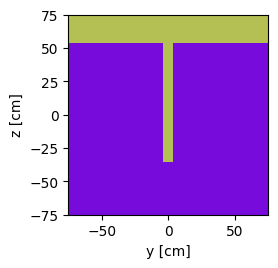

In [29]:
# Irradiation Box
# Water inside box
cell3001 = openmc.Cell(
    fill=H2O,
    region=(-sur0383 & +sur0388 & -sur0389 & +sur0386 & -sur0387 & +sur0390) | +sur0383,
    cell_id=3001,
)
# Clad
cell3002 = openmc.Cell(
    fill=Aluminum,
    region=-sur0383 & (-sur0388 | +sur0389 | -sur0386 | +sur0387)
    | (+sur0388 & -sur0389 & +sur0386 & -sur0387 & -sur0390),
    cell_id=3002,
)
u3000 = openmc.Universe(cells=[cell3001, cell3002], universe_id=3000)
plot_args = {
    "basis": "yz",
    "origin": (0, 0, 0),
    "width": (150, 150),
    "color_by": "material",
}
if plots:
    u3000.plot(**plot_args)

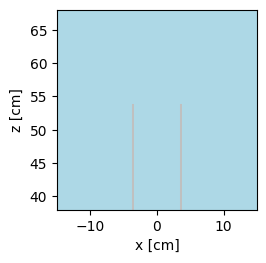

In [30]:
# Cladding Irradiation Box
cell3003 = openmc.Cell(
    fill=u3000,
    region=+sur0393 & -sur0394 & +sur0391 & +sur0395 & -sur0392,
    cell_id=3003,
)
cell3004 = openmc.Cell(
    fill=H2O,
    region=(-sur0393 | +sur0394 | -sur0391 | +sur0392) & +sur0395,
    cell_id=3004,
)
# cell3004 = openmc.Cell(fill=H2O, region=-sur0383 & -sur0393 & +sur0394 & -sur0391 & +sur0392 & +sur0395 )
# cell3008 = openmc.Cell(fill=H2O, region= +sur0383 & -sur0397, cell_id=3008)
# Boquilla
cell3005 = openmc.Cell(
    fill=Aluminum, region=-sur0395 & -sur0397 & +sur0396, cell_id=3005
)
# cell3006 = openmc.Cell(fill=H2O, region= +sur0397 & ~(-sur0395&+sur0394&-sur0393&-sur0392&+sur0391), cell_id=3006)
cell3006 = openmc.Cell(fill=H2O, region=+sur0397 & -sur0395, cell_id=3006)
cell3007 = openmc.Cell(fill=H2O, region=-sur0396 & -sur0397, cell_id=3007)
u3001 = openmc.Universe(
    cells=[cell3003, cell3004, cell3005, cell3006, cell3007], universe_id=3001
)
plot_args = {
    "basis": "xz",
    "origin": (0, 0, 53),
    "width": (30, 30),
    "color_by": "material",
    "colors": materials_colors,
}
if plots:
    u3001.plot(**plot_args)

In [31]:
# Universe/Lattice 16: Fuel Element Arrangement
# Universe for empty water position
# cell0153 = openmc.Cell(fill=H2O, region=+sur0296&-sur0297&+sur0298&-sur0299&+sur0310&-sur0311, cell_id=153)
cell0153 = openmc.Cell(fill=H2O, cell_id=153)
u016 = u_water  # openmc.Universe(cells=[cell0153], universe_id=116)
# Lattice must have an outer cell defined
# cell0233 = openmc.Cell(fill=H2O, region=+sur0306&-sur0307&+sur0308&-sur0309&+sur0310&-sur0311, cell_id=233)
cell0233 = openmc.Cell(fill=H2O, cell_id=233)
u0233 = openmc.Universe(cells=[cell0233], universe_id=233)
# Lattice
latt16 = openmc.RectLattice(lattice_id=1016)
latt16.lower_left = (-30.8, -32.4)
latt16.pitch = (7.7, 8.1)
latt16.outer = u_water

### NÚCLEO 07
NUCLEO07 = [
    [u016, u016, u016, u016, u016, u016, u016, u016],
    [u016, u016, u016, u016, u016, u016, u016, u016],
    [u016, u016, u016, u016, u016, u016, u016, u016],
    [u016, u016, u016, u015, u015, u016, u016, u016],
    [u016, u016, u015, u012, u015, u013, u015, u016],
    [u016, u016, u015, u015, u015, u015, u015, u016],
    [u016, u016, u015, u011, u015, u010, u015, u016],
    [u016, u016, u016, u015, u015, u015, u016, u016],
    [u016, u016, u016, u016, u016, u016, u016, u016],
]

### NÚCLEO 11
NUCLEO11 = [
    [u016, u016, u016, u016, u016, u016, u016, u016],
    [u016, u016, u016, u016, u016, u016, u016, u016],
    [u016, u2001, u2001, u2001, u2001, u2001, u016, u016],
    [u016, u2001, u2001, u015, u015, u2001, u0130, u2001],
    [u016, u2001, u015, u012, u015, u013, u015, u2001],
    [u016, u2001, u015, u015, u015, u015, u3001, u2001],
    [u016, u2001, u015, u011, u015, u010, u015, u2001],
    [u016, u2001, u2001, u015, u015, u015, u2001, u2001],
    [u016, u2001, u2001, u2001, u016, u2001, u2001, u016],
]

### NÚCLEO 16 (hasta el 2022)
NUCLEO16 = [
    [u2001, u2001, u2001, u2001, u2001, u2001, u016, u2001],
    [u2001, u3001, u2001, u2001, u2001, u2001, u2001, u2001],
    [u2001, u2001, u2001, u2001, u2001, u016, u2001, u2001],
    [u2001, u2001, u2001, u2001, u2001, u2001, u2001, u016],
    [u2001, u2001, u2001, u015, u3001, u015, u2001, u016],
    [u016, u2001, u015, u012, u015, u013, u015, u2001],
    [u2001, u2001, u015, u015, u015, u015, u0130, u2001],
    [u2001, u2001, u015, u011, u015, u010, u015, u2001],
    [u2001, u2001, u2001, u015, u015, u015, u2001, u016],
]

### NÚCLEO 17 (actualizado al 2022)
NUCLEO17 = [
    [u2001, u2001, u2001, u2001, u2001, u016, u016, u2001],
    [u2001, u3001, u2001, u2001, u2001, u2001, u2001, u016],
    [u2001, u2001, u2001, u2001, u2001, u016, u2001, u016],
    [u2001, u2001, u2001, u2001, u2001, u2001, u2001, u016],
    [u2001, u2001, u2001, u015, u3001, u015, u2001, u016],
    [u016, u2001, u015, u012, u015, u013, u015, u2001],
    [u2001, u2001, u015, u015, u015, u015, u0130, u2001],
    [u2001, u2001, u015, u011, u015, u010, u015, u2001],
    [u2001, u2001, u2001, u015, u015, u015, u2001, u016],
]

### NÚCLEO 18 (propuestos en la maestría)
NUCLEO18a = [
    [u2001, u2001, u2001, u2001, u2001, u2001, u2001, u2001],
    [u2001, u3001, u2001, u2001, u2001, u2001, u2001, u2001],
    [u2001, u2001, u2001, u2001, u2001, u3001, u2001, u2001],
    [u2001, u2001, u2001, u2001, u2001, u2001, u2001, u016],
    [u2001, u2001, u2001, u015, u3001, u015, u2001, u3001],
    [u3001, u2001, u015, u012, u015, u013, u015, u2001],
    [u2001, u2001, u015, u015, u015, u015, u0130, u2001],
    [u2001, u2001, u015, u011, u015, u010, u015, u2001],
    [u2001, u2001, u2001, u015, u015, u015, u2001, u3001],
]

NUCLEO18b = [
    [u2001, u2001, u2001, u2001, u2001, u2001, u2001, u2001],
    [u2001, u3001, u2001, u2001, u2001, u2001, u2001, u2001],
    [u2001, u2001, u2001, u2001, u2001, u2001, u2001, u3001],
    [u2001, u2001, u2001, u2001, u2001, u2001, u2001, u016],
    [u2001, u2001, u2001, u015, u3001, u015, u2001, u3001],
    [u3001, u2001, u015, u012, u015, u013, u015, u2001],
    [u2001, u2001, u015, u015, u015, u015, u0130, u2001],
    [u2001, u2001, u015, u011, u015, u010, u015, u2001],
    [u2001, u2001, u2001, u015, u015, u015, u2001, u3001],
] 

# Puedo simplemente crear un nucleo poniendo los bloques aca?

if NUCLEO == "07":
    latt16.universes = NUCLEO07
elif NUCLEO == "11":
    latt16.universes = NUCLEO11
elif NUCLEO == "16":
    latt16.universes = NUCLEO16
elif NUCLEO == "17":
    latt16.universes = NUCLEO17
elif NUCLEO == "18a":
    latt16.universes = NUCLEO18a
elif NUCLEO == "18b":
    latt16.universes = NUCLEO18b

cell1116 = openmc.Cell(fill=latt16, cell_id=1116)
u1116 = openmc.Universe(cells=[cell1116], universe_id=1116)

# cell0154 = openmc.Cell(fill=latt16, region=+sur0912&-sur0913&+sur0914&-sur0915&+sur0916&-sur0917, cell_id=154)
# u1113 = openmc.Universe(cells=[cell0154])
# plot_args = {'origin':(0,0,0),'width': (70, 80), 'color_by':'material'}
# u1113.plot(**plot_args)

In [32]:
### Grid ###
# Regions to match surface numbers in MCNP model
in101 = +sur0331 & -sur0332 & +sur0333 & -sur0334 & +sur0335 & -sur0336
in102 = -sur0337 & +sur0338 & -sur0339
in103 = -sur0340 & +sur0341 & -sur0342
in104 = -sur0343 & +sur0344 & -sur0345
in105 = -sur0346 & +sur0347 & -sur0348
in106 = -sur0349 & +sur0350 & -sur0351
in107 = -sur0352 & +sur0353 & -sur0354
in108 = -sur0355 & +sur0356 & -sur0357

In [33]:
## Empty Grid ##

# Universe 17: NEAR LEFT-UPPER (L-U) CORNER OF THE GRID
cell0155 = openmc.Cell(fill=Al6061, region=in101 & (~in106) & (~in102), cell_id=155)
cell0156 = openmc.Cell(fill=H2O, region=in102, cell_id=156)
cell0157 = openmc.Cell(fill=H2O, region=in106, cell_id=157)
cell0158 = openmc.Cell(fill=H2O, region=(~in101) & (~in106), cell_id=158)
u017 = openmc.Universe(cells=[cell0155, cell0156, cell0157, cell0158], universe_id=17)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u017.plot(**plot_args)

# Universe 18: NEAR RIGHT-UPPER (R-U) CORNER OF THE GRID
cell0159 = openmc.Cell(fill=Al6061, region=in101 & (~in105) & (~in102), cell_id=159)
cell0160 = openmc.Cell(fill=H2O, region=in102, cell_id=160)
cell0161 = openmc.Cell(fill=H2O, region=in105, cell_id=161)
cell0162 = openmc.Cell(fill=H2O, region=(~in101) & (~in105), cell_id=162)
u018 = openmc.Universe(cells=[cell0159, cell0160, cell0161, cell0162], universe_id=18)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u018.plot(**plot_args)

# Universe 19: NEAR LEFT-LOWER (L-L) CORNER OF THE GRID
cell0163 = openmc.Cell(fill=Al6061, region=in101 & (~in104) & (~in102), cell_id=163)
cell0164 = openmc.Cell(fill=H2O, region=in102, cell_id=164)
cell0165 = openmc.Cell(fill=H2O, region=in104, cell_id=165)
cell0166 = openmc.Cell(fill=H2O, region=(~in101) & (~in104), cell_id=166)
u019 = openmc.Universe(cells=[cell0163, cell0164, cell0165, cell0166], universe_id=19)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u019.plot(**plot_args)

# Universe 20: NEAR RIGHT-LOWER (R-L) CORNER OF THE GRID
cell0167 = openmc.Cell(fill=Al6061, region=in101 & (~in103) & (~in102), cell_id=167)
cell0168 = openmc.Cell(fill=H2O, region=in102, cell_id=168)
cell0169 = openmc.Cell(fill=H2O, region=in103, cell_id=169)
cell0170 = openmc.Cell(fill=H2O, region=(~in101) & (~in103), cell_id=170)
u020 = openmc.Universe(cells=[cell0167, cell0168, cell0169, cell0170], universe_id=20)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u020.plot(**plot_args)

# Universe 21: UPPER SIDE OF THE GRID
cell0171 = openmc.Cell(
    fill=Al6061, region=in101 & (~in105) & (~in102) & (~in106), cell_id=171
)
cell0172 = openmc.Cell(fill=H2O, region=in102, cell_id=172)
cell0173 = openmc.Cell(fill=H2O, region=in105, cell_id=173)
cell0174 = openmc.Cell(fill=H2O, region=in106, cell_id=174)
cell0175 = openmc.Cell(fill=H2O, region=(~in101) & (~in105) & (~in106), cell_id=175)
u021 = openmc.Universe(
    cells=[cell0171, cell0172, cell0173, cell0174, cell0175], universe_id=21
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u021.plot(**plot_args)

# Universe 22: RIGHT SIDE OF THE GRID
cell0176 = openmc.Cell(
    fill=Al6061, region=in101 & (~in105) & (~in102) & (~in103), cell_id=176
)
cell0177 = openmc.Cell(fill=H2O, region=in102, cell_id=177)
cell0178 = openmc.Cell(fill=H2O, region=in105, cell_id=178)
cell0179 = openmc.Cell(fill=H2O, region=in103, cell_id=179)
cell0180 = openmc.Cell(fill=H2O, region=(~in101) & (~in105) & (~in103), cell_id=180)
u022 = openmc.Universe(
    cells=[cell0176, cell0177, cell0178, cell0179, cell0180], universe_id=22
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u022.plot(**plot_args)

# Universe 23: LOWER SIDE OF THE GRID
cell0181 = openmc.Cell(
    fill=Al6061, region=in101 & (~in103) & (~in102) & (~in104), cell_id=181
)
cell0182 = openmc.Cell(fill=H2O, region=in102, cell_id=182)
cell0183 = openmc.Cell(fill=H2O, region=in103, cell_id=183)
cell0184 = openmc.Cell(fill=H2O, region=in104, cell_id=184)
cell0185 = openmc.Cell(fill=H2O, region=(~in101) & (~in103) & (~in104), cell_id=185)
u023 = openmc.Universe(
    cells=[cell0181, cell0182, cell0183, cell0184, cell0185], universe_id=23
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u023.plot(**plot_args)

# Universe 24: LEFT SIDE OF THE GRID
cell0186 = openmc.Cell(
    fill=Al6061, region=in101 & (~in104) & (~in102) & (~in106), cell_id=186
)
cell0187 = openmc.Cell(fill=H2O, region=in102, cell_id=187)
cell0188 = openmc.Cell(fill=H2O, region=in106, cell_id=188)
cell0189 = openmc.Cell(fill=H2O, region=in104, cell_id=189)
cell0190 = openmc.Cell(fill=H2O, region=(~in101) & (~in104) & (~in106), cell_id=190)
u024 = openmc.Universe(
    cells=[cell0186, cell0187, cell0188, cell0189, cell0190], universe_id=24
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u024.plot(**plot_args)

# Universe 25: INTERNAL POSITIONS OF THE GRID WITHOUT FUEL ELEMENT
cell0191 = openmc.Cell(
    fill=Al6061,
    region=in101 & (~in102) & (~in103) & (~in104) & (~in105) & (~in106),
    cell_id=191,
)
cell0192 = openmc.Cell(fill=H2O, region=in102, cell_id=192)
cell0193 = openmc.Cell(fill=H2O, region=in103, cell_id=193)
cell0194 = openmc.Cell(fill=H2O, region=in104, cell_id=194)
cell0195 = openmc.Cell(fill=H2O, region=in105, cell_id=195)
cell0196 = openmc.Cell(fill=H2O, region=in106, cell_id=196)
cell0197 = openmc.Cell(
    fill=H2O,
    region=(~in101) & (~in102) & (~in103) & (~in104) & (~in105) & (~in106),
    cell_id=197,
)
u025 = openmc.Universe(
    cells=[cell0191, cell0192, cell0193, cell0194, cell0195, cell0196, cell0197],
    universe_id=25,
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u025.plot(**plot_args)

# Universe 26: INTERNAL POSITIONS OF THE GRID WITH FUEL ELEMENT
# cell0198 = openmc.Cell(fill=Al6061, region=in101&(~in107)&(~in103)&(~in104)&(~in105)&(~in106)&(~in108), cell_id=198)
# cell0199 = openmc.Cell(fill=H2O, region=in107, cell_id=199)
# cell0200 = openmc.Cell(fill=H2O, region=in103, cell_id=200)
# cell0201 = openmc.Cell(fill=H2O, region=in104, cell_id=201)
# cell0202 = openmc.Cell(fill=H2O, region=in105, cell_id=202)
# cell0203 = openmc.Cell(fill=H2O, region=in106, cell_id=203)
# cell0204 = openmc.Cell(fill=H2O, region=in108, cell_id=204)
# cell0205 = openmc.Cell(fill=H2O, region=(~in101)&(~in107)&(~in103)&(~in104)&(~in105)&(~in106)&(~in108), cell_id=205)
# u026 = openmc.Universe(cells=[cell0198,cell0199,cell0200,cell0201,cell0202,cell0203,cell0204,cell0205], universe_id=126)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u026.plot(**plot_args)

# Universe 28: CORNER OF THE GRID
cell0206 = openmc.Cell(fill=Al6061, region=in101 & (~in102), cell_id=206)
cell0207 = openmc.Cell(fill=H2O, region=in102, cell_id=207)
cell0208 = openmc.Cell(fill=H2O, region=(~in101) & (~in102), cell_id=208)
u028 = openmc.Universe(cells=[cell0206, cell0207, cell0208], universe_id=28)

# Universe 29: COMPLEMENT OF L-U CORNER OF THE GRID
cell0209 = openmc.Cell(
    fill=Al6061, region=in101 & (~in104) & (~in105) & (~in106) & (~in102), cell_id=209
)
cell0210 = openmc.Cell(fill=H2O, region=in102, cell_id=210)
cell0211 = openmc.Cell(fill=H2O, region=in104, cell_id=211)
cell0212 = openmc.Cell(fill=H2O, region=in105, cell_id=212)
cell0213 = openmc.Cell(fill=H2O, region=in106, cell_id=213)
cell0214 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in104) & (~in105) & (~in106) & (~in102), cell_id=214
)
u029 = openmc.Universe(
    cells=[cell0209, cell0210, cell0211, cell0212, cell0213, cell0214], universe_id=29
)

# Universe 30: COMPLEMENT OF R-U CORNER OF THE GRID
cell0215 = openmc.Cell(
    fill=Al6061, region=in101 & (~in103) & (~in105) & (~in106) & (~in102), cell_id=215
)
cell0216 = openmc.Cell(fill=H2O, region=in102, cell_id=216)
cell0217 = openmc.Cell(fill=H2O, region=in103, cell_id=217)
cell0218 = openmc.Cell(fill=H2O, region=in105, cell_id=218)
cell0219 = openmc.Cell(fill=H2O, region=in106, cell_id=219)
cell0220 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in103) & (~in105) & (~in106) & (~in102), cell_id=220
)
u030 = openmc.Universe(
    cells=[cell0215, cell0216, cell0217, cell0218, cell0219, cell0220], universe_id=30
)

# Universe 31: COMPLEMENT OF L-L CORNER OF THE GRID
cell0221 = openmc.Cell(
    fill=Al6061, region=in101 & (~in102) & (~in103) & (~in104) & (~in106), cell_id=221
)
cell0222 = openmc.Cell(fill=H2O, region=in102, cell_id=222)
cell0223 = openmc.Cell(fill=H2O, region=in103, cell_id=223)
cell0224 = openmc.Cell(fill=H2O, region=in104, cell_id=224)
cell0225 = openmc.Cell(fill=H2O, region=in106, cell_id=225)
cell0226 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in102) & (~in103) & (~in104) & (~in106), cell_id=226
)
u031 = openmc.Universe(
    cells=[cell0221, cell0222, cell0223, cell0224, cell0225, cell0226], universe_id=31
)

# Universe 32: COMPLEMENT OF R-L CORNER OF THE GRID
cell0227 = openmc.Cell(
    fill=Al6061, region=in101 & (~in102) & (~in103) & (~in104) & (~in105), cell_id=227
)
cell0228 = openmc.Cell(fill=H2O, region=in102, cell_id=228)
cell0229 = openmc.Cell(fill=H2O, region=in103, cell_id=229)
cell0230 = openmc.Cell(fill=H2O, region=in104, cell_id=230)
cell0231 = openmc.Cell(fill=H2O, region=in105, cell_id=231)
cell0232 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in102) & (~in103) & (~in104) & (~in105), cell_id=232
)
u032 = openmc.Universe(
    cells=[cell0227, cell0228, cell0229, cell0230, cell0231, cell0232], universe_id=32
)

In [34]:
## Grid with Fuel Element ##

# Universe 117: NEAR LEFT-UPPER (L-U) CORNER OF THE GRID
cell1155 = openmc.Cell(
    fill=Al6061, region=in101 & (~in106) & (~in107) & (~in108), cell_id=1155
)
cell1157 = openmc.Cell(fill=H2O, region=in106, cell_id=1157)
cell1158 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in106) & (~in107) & (~in108), cell_id=1158
)
cell1758 = openmc.Cell(fill=H2O, region=in107, cell_id=1758)
cell1858 = openmc.Cell(fill=H2O, region=in108, cell_id=1858)
u117 = openmc.Universe(
    cells=[cell1155, cell1157, cell1158, cell1758, cell1858], universe_id=117
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u017.plot(**plot_args)

# Universe 118: NEAR RIGHT-UPPER (R-U) CORNER OF THE GRID
cell1159 = openmc.Cell(
    fill=Al6061, region=in101 & (~in105) & (~in107) & (~in108), cell_id=1159
)
cell1161 = openmc.Cell(fill=H2O, region=in105, cell_id=1161)
cell1162 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in105) & (~in107) & (~in108), cell_id=1162
)
cell1762 = openmc.Cell(fill=H2O, region=in107, cell_id=1762)
cell1862 = openmc.Cell(fill=H2O, region=in108, cell_id=1862)
u118 = openmc.Universe(
    cells=[cell1159, cell1161, cell1162, cell1762, cell1862], universe_id=118
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u018.plot(**plot_args)

# Universe 119: NEAR LEFT-LOWER (L-L) CORNER OF THE GRID
cell1163 = openmc.Cell(
    fill=Al6061, region=in101 & (~in104) & (~in107) & (~in108), cell_id=1163
)
cell1165 = openmc.Cell(fill=H2O, region=in104, cell_id=1165)
cell1166 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in104) & (~in107) & (~in108), cell_id=1166
)
cell1766 = openmc.Cell(fill=H2O, region=in107, cell_id=1766)
cell1866 = openmc.Cell(fill=H2O, region=in108, cell_id=1866)
u119 = openmc.Universe(
    cells=[cell1163, cell1165, cell1166, cell1766, cell1866], universe_id=119
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u019.plot(**plot_args)

# Universe 120: NEAR RIGHT-LOWER (R-L) CORNER OF THE GRID
cell1167 = openmc.Cell(
    fill=Al6061, region=in101 & (~in103) & (~in107) & (~in108), cell_id=1167
)
cell1169 = openmc.Cell(fill=H2O, region=in103, cell_id=1169)
cell1170 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in103) & (~in107) & (~in108), cell_id=1170
)
cell1770 = openmc.Cell(fill=H2O, region=in107, cell_id=1770)
cell1870 = openmc.Cell(fill=H2O, region=in108, cell_id=1870)
u120 = openmc.Universe(
    cells=[cell1167, cell1169, cell1170, cell1770, cell1870], universe_id=120
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u020.plot(**plot_args)

# Universe 121: UPPER SIDE OF THE GRID
cell1171 = openmc.Cell(
    fill=Al6061, region=in101 & (~in105) & (~in106) & (~in107) & (~in108), cell_id=1171
)
cell1173 = openmc.Cell(fill=H2O, region=in105, cell_id=1173)
cell1174 = openmc.Cell(fill=H2O, region=in106, cell_id=1174)
cell1175 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in105) & (~in106) & (~in107) & (~in108), cell_id=1175
)
cell1775 = openmc.Cell(fill=H2O, region=in107, cell_id=1775)
cell1875 = openmc.Cell(fill=H2O, region=in108, cell_id=1875)
u121 = openmc.Universe(
    cells=[cell1171, cell1173, cell1174, cell1175, cell1775, cell1875], universe_id=121
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u021.plot(**plot_args)

# Universe 122: RIGHT SIDE OF THE GRID
cell1176 = openmc.Cell(
    fill=Al6061, region=in101 & (~in105) & (~in103) & (~in107) & (~in108), cell_id=1176
)
cell1178 = openmc.Cell(fill=H2O, region=in105, cell_id=1178)
cell1179 = openmc.Cell(fill=H2O, region=in103, cell_id=1179)
cell1180 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in105) & (~in103) & (~in107) & (~in108), cell_id=1180
)
cell1780 = openmc.Cell(fill=H2O, region=in107, cell_id=1780)
cell1880 = openmc.Cell(fill=H2O, region=in108, cell_id=1880)
u122 = openmc.Universe(
    cells=[cell1176, cell1178, cell1179, cell1180, cell1780, cell1880], universe_id=122
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u022.plot(**plot_args)

# Universe 124: LEFT SIDE OF THE GRID
cell1186 = openmc.Cell(
    fill=Al6061, region=in101 & (~in104) & (~in106) & (~in107) & (~in108), cell_id=1186
)
cell1188 = openmc.Cell(fill=H2O, region=in106, cell_id=1188)
cell1189 = openmc.Cell(fill=H2O, region=in104, cell_id=1189)
cell1190 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in104) & (~in106) & (~in107) & (~in108), cell_id=1190
)
cell1790 = openmc.Cell(fill=H2O, region=in107, cell_id=1790)
cell1890 = openmc.Cell(fill=H2O, region=in108, cell_id=1890)
u124 = openmc.Universe(
    cells=[cell1186, cell1188, cell1189, cell1190, cell1790, cell1890], universe_id=124
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u024.plot(**plot_args)

# Universe 125: INTERNAL POSITIONS OF THE GRID
cell1191 = openmc.Cell(
    fill=Al6061,
    region=in101 & (~in103) & (~in104) & (~in105) & (~in106) & (~in107) & (~in108),
    cell_id=1191,
)
cell1193 = openmc.Cell(fill=H2O, region=in103, cell_id=1193)
cell1194 = openmc.Cell(fill=H2O, region=in104, cell_id=1194)
cell1195 = openmc.Cell(fill=H2O, region=in105, cell_id=1195)
cell1196 = openmc.Cell(fill=H2O, region=in106, cell_id=1196)
cell1197 = openmc.Cell(
    fill=H2O,
    region=(~in101) & (~in103) & (~in104) & (~in105) & (~in106) & (~in107) & (~in108),
    cell_id=1197,
)
cell1797 = openmc.Cell(fill=H2O, region=in107, cell_id=1797)
cell1897 = openmc.Cell(fill=H2O, region=in108, cell_id=1897)
u125 = openmc.Universe(
    cells=[
        cell1191,
        cell1193,
        cell1194,
        cell1195,
        cell1196,
        cell1197,
        cell1797,
        cell1897,
    ],
    universe_id=125,
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u025.plot(**plot_args)

# Universe 128: CORNER OF THE GRID
cell1206 = openmc.Cell(fill=Al6061, region=in101 & (~in107) & (~in108), cell_id=1206)
cell1208 = openmc.Cell(fill=H2O, region=(~in101) & (~in107) & (~in108), cell_id=1208)
cell1808 = openmc.Cell(fill=H2O, region=in107, cell_id=1808)
cell1908 = openmc.Cell(fill=H2O, region=in108, cell_id=1908)
u128 = openmc.Universe(cells=[cell1206, cell1208, cell1808, cell1908], universe_id=128)

# Universe 29: COMPLEMENT OF L-U CORNER OF THE GRID
cell1209 = openmc.Cell(
    fill=Al6061,
    region=in101 & (~in104) & (~in105) & (~in106) & (~in107) & (~in108),
    cell_id=1209,
)
cell1211 = openmc.Cell(fill=H2O, region=in104, cell_id=1211)
cell1212 = openmc.Cell(fill=H2O, region=in105, cell_id=1212)
cell1213 = openmc.Cell(fill=H2O, region=in106, cell_id=1213)
cell1214 = openmc.Cell(
    fill=H2O,
    region=(~in101) & (~in104) & (~in105) & (~in106) & (~in107) & (~in108),
    cell_id=1214,
)
cell1814 = openmc.Cell(fill=H2O, region=in107, cell_id=1814)
cell1914 = openmc.Cell(fill=H2O, region=in108, cell_id=1914)
u129 = openmc.Universe(
    cells=[cell1209, cell1211, cell1212, cell1213, cell1214, cell1814, cell1914],
    universe_id=129,
)

# Universe 30: COMPLEMENT OF R-U CORNER OF THE GRID
cell1215 = openmc.Cell(
    fill=Al6061,
    region=in101 & (~in103) & (~in105) & (~in106) & (~in107) & (~in108),
    cell_id=1215,
)
cell1217 = openmc.Cell(fill=H2O, region=in103, cell_id=1217)
cell1218 = openmc.Cell(fill=H2O, region=in105, cell_id=1218)
cell1219 = openmc.Cell(fill=H2O, region=in106, cell_id=1219)
cell1220 = openmc.Cell(
    fill=H2O,
    region=(~in101) & (~in103) & (~in105) & (~in106) & (~in107) & (~in108),
    cell_id=1220,
)
cell1820 = openmc.Cell(fill=H2O, region=in107, cell_id=1820)
cell1920 = openmc.Cell(fill=H2O, region=in108, cell_id=1920)
u130 = openmc.Universe(
    cells=[cell1215, cell1217, cell1218, cell1219, cell1220, cell1820, cell1920],
    universe_id=130,
)

# Universe 31: COMPLEMENT OF L-L CORNER OF THE GRID
cell1221 = openmc.Cell(
    fill=Al6061,
    region=in101 & (~in103) & (~in104) & (~in106) & (~in107) & (~in108),
    cell_id=1221,
)
cell1223 = openmc.Cell(fill=H2O, region=in103, cell_id=1223)
cell1224 = openmc.Cell(fill=H2O, region=in104, cell_id=1224)
cell1225 = openmc.Cell(fill=H2O, region=in106, cell_id=1225)
cell1226 = openmc.Cell(
    fill=H2O,
    region=(~in101) & (~in103) & (~in104) & (~in106) & (~in107) & (~in108),
    cell_id=1226,
)
cell1826 = openmc.Cell(fill=H2O, region=in107, cell_id=1826)
cell1926 = openmc.Cell(fill=H2O, region=in108, cell_id=1926)
u131 = openmc.Universe(
    cells=[cell1221, cell1223, cell1224, cell1225, cell1226, cell1826, cell1926],
    universe_id=131,
)

# Universe 32: COMPLEMENT OF R-L CORNER OF THE GRID
cell1227 = openmc.Cell(
    fill=Al6061,
    region=in101 & (~in103) & (~in104) & (~in105) & (~in107) & (~in108),
    cell_id=1227,
)
cell1229 = openmc.Cell(fill=H2O, region=in103, cell_id=1229)
cell1230 = openmc.Cell(fill=H2O, region=in104, cell_id=1230)
cell1231 = openmc.Cell(fill=H2O, region=in105, cell_id=1231)
cell1232 = openmc.Cell(
    fill=H2O,
    region=(~in101) & (~in103) & (~in104) & (~in105) & (~in107) & (~in108),
    cell_id=1232,
)
cell1832 = openmc.Cell(fill=H2O, region=in107, cell_id=1832)
cell1932 = openmc.Cell(fill=H2O, region=in108, cell_id=1932)
u132 = openmc.Universe(
    cells=[cell1227, cell1229, cell1230, cell1231, cell1232, cell1832, cell1932],
    universe_id=132,
)

In [35]:
## Grid with Reflector ##

# Universe 117: NEAR LEFT-UPPER (L-U) CORNER OF THE GRID
cell2155 = openmc.Cell(
    fill=Al6061, region=in101 & (~in106) & (~in107) & (~in108), cell_id=2155
)
cell2157 = openmc.Cell(fill=H2O, region=in106, cell_id=2157)
cell2158 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in106) & (~in107) & (~in108), cell_id=2158
)
cell2758 = openmc.Cell(fill=Al6061, region=in107, cell_id=2758)
cell2858 = openmc.Cell(fill=H2O, region=in108, cell_id=2858)
u217 = openmc.Universe(
    cells=[cell2155, cell2157, cell2158, cell2758, cell2858], universe_id=217
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u017.plot(**plot_args)

# Universe 118: NEAR RIGHT-UPPER (R-U) CORNER OF THE GRID
cell2159 = openmc.Cell(
    fill=Al6061, region=in101 & (~in105) & (~in107) & (~in108), cell_id=2159
)
cell2161 = openmc.Cell(fill=H2O, region=in105, cell_id=2161)
cell2162 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in105) & (~in107) & (~in108), cell_id=2162
)
cell2762 = openmc.Cell(fill=Al6061, region=in107, cell_id=2762)
cell2862 = openmc.Cell(fill=H2O, region=in108, cell_id=2862)
u218 = openmc.Universe(
    cells=[cell2159, cell2161, cell2162, cell2762, cell2862], universe_id=218
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u018.plot(**plot_args)

# Universe 119: NEAR LEFT-LOWER (L-L) CORNER OF THE GRID
cell2163 = openmc.Cell(
    fill=Al6061, region=in101 & (~in104) & (~in107) & (~in108), cell_id=2163
)
cell2165 = openmc.Cell(fill=H2O, region=in104, cell_id=2165)
cell2166 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in104) & (~in107) & (~in108), cell_id=2166
)
cell2766 = openmc.Cell(fill=Al6061, region=in107, cell_id=2766)
cell2866 = openmc.Cell(fill=H2O, region=in108, cell_id=2866)
u219 = openmc.Universe(
    cells=[cell2163, cell2165, cell2166, cell2766, cell2866], universe_id=219
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u019.plot(**plot_args)

# Universe 120: NEAR RIGHT-LOWER (R-L) CORNER OF THE GRID
cell2167 = openmc.Cell(
    fill=Al6061, region=in101 & (~in103) & (~in107) & (~in108), cell_id=2167
)
cell2169 = openmc.Cell(fill=H2O, region=in103, cell_id=2169)
cell2170 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in103) & (~in107) & (~in108), cell_id=2170
)
cell2770 = openmc.Cell(fill=Al6061, region=in107, cell_id=2770)
cell2870 = openmc.Cell(fill=H2O, region=in108, cell_id=2870)
u220 = openmc.Universe(
    cells=[cell2167, cell2169, cell2170, cell2770, cell2870], universe_id=220
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u020.plot(**plot_args)

# Universe 121: UPPER SIDE OF THE GRID
cell2171 = openmc.Cell(
    fill=Al6061, region=in101 & (~in105) & (~in106) & (~in107) & (~in108), cell_id=2171
)
cell2173 = openmc.Cell(fill=H2O, region=in105, cell_id=2173)
cell2174 = openmc.Cell(fill=H2O, region=in106, cell_id=2174)
cell2175 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in105) & (~in106) & (~in107) & (~in108), cell_id=2175
)
cell2775 = openmc.Cell(fill=Al6061, region=in107, cell_id=2775)
cell2875 = openmc.Cell(fill=H2O, region=in108, cell_id=2875)
u221 = openmc.Universe(
    cells=[cell2171, cell2173, cell2174, cell2175, cell2775, cell2875], universe_id=221
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u021.plot(**plot_args)

# Universe 122: RIGHT SIDE OF THE GRID
cell2176 = openmc.Cell(
    fill=Al6061, region=in101 & (~in105) & (~in103) & (~in107) & (~in108), cell_id=2176
)
cell2178 = openmc.Cell(fill=H2O, region=in105, cell_id=2178)
cell2179 = openmc.Cell(fill=H2O, region=in103, cell_id=2179)
cell2180 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in105) & (~in103) & (~in107) & (~in108), cell_id=2180
)
cell2780 = openmc.Cell(fill=Al6061, region=in107, cell_id=2780)
cell2880 = openmc.Cell(fill=H2O, region=in108, cell_id=2880)
u222 = openmc.Universe(
    cells=[cell2176, cell2178, cell2179, cell2180, cell2780, cell2880], universe_id=222
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u022.plot(**plot_args)

# Universe 124: LEFT SIDE OF THE GRID
cell2186 = openmc.Cell(
    fill=Al6061, region=in101 & (~in104) & (~in106) & (~in107) & (~in108), cell_id=2186
)
cell2188 = openmc.Cell(fill=H2O, region=in106, cell_id=2188)
cell2189 = openmc.Cell(fill=H2O, region=in104, cell_id=2189)
cell2190 = openmc.Cell(
    fill=H2O, region=(~in101) & (~in104) & (~in106) & (~in107) & (~in108), cell_id=2190
)
cell2790 = openmc.Cell(fill=Al6061, region=in107, cell_id=2790)
cell2890 = openmc.Cell(fill=H2O, region=in108, cell_id=2890)
u224 = openmc.Universe(
    cells=[cell2186, cell2188, cell2189, cell2190, cell2790, cell2890], universe_id=224
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u024.plot(**plot_args)

# Universe 125: INTERNAL POSITIONS OF THE GRID
cell2191 = openmc.Cell(
    fill=Al6061,
    region=in101 & (~in103) & (~in104) & (~in105) & (~in106) & (~in107) & (~in108),
    cell_id=2191,
)
cell2193 = openmc.Cell(fill=H2O, region=in103, cell_id=2193)
cell2194 = openmc.Cell(fill=H2O, region=in104, cell_id=2194)
cell2195 = openmc.Cell(fill=H2O, region=in105, cell_id=2195)
cell2196 = openmc.Cell(fill=H2O, region=in106, cell_id=2196)
cell2197 = openmc.Cell(
    fill=H2O,
    region=(~in101) & (~in103) & (~in104) & (~in105) & (~in106) & (~in107) & (~in108),
    cell_id=2197,
)
cell2797 = openmc.Cell(fill=Al6061, region=in107, cell_id=2797)
cell2897 = openmc.Cell(fill=H2O, region=in108, cell_id=2897)
u225 = openmc.Universe(
    cells=[
        cell2191,
        cell2193,
        cell2194,
        cell2195,
        cell2196,
        cell2197,
        cell2797,
        cell2897,
    ],
    universe_id=225,
)
# plot_args = {'origin':(0,0,0),'width': (7.7, 8.1), 'color_by':'material'}
# u025.plot(**plot_args)

# Universe 128: CORNER OF THE GRID
cell2106 = openmc.Cell(fill=Al6061, region=in101 & (~in107) & (~in108), cell_id=2206)
cell2108 = openmc.Cell(fill=H2O, region=(~in101) & (~in107) & (~in108), cell_id=2208)
cell2808 = openmc.Cell(fill=Al6061, region=in107, cell_id=2808)
cell1908 = openmc.Cell(fill=H2O, region=in108, cell_id=2908)
u228 = openmc.Universe(cells=[cell2106, cell2108, cell2808, cell1908], universe_id=228)

# Universe 29: COMPLEMENT OF L-U CORNER OF THE GRID
cell2109 = openmc.Cell(
    fill=Al6061,
    region=in101 & (~in104) & (~in105) & (~in106) & (~in107) & (~in108),
    cell_id=2209,
)
cell2111 = openmc.Cell(fill=H2O, region=in104, cell_id=2211)
cell2112 = openmc.Cell(fill=H2O, region=in105, cell_id=2212)
cell2113 = openmc.Cell(fill=H2O, region=in106, cell_id=2213)
cell2114 = openmc.Cell(
    fill=H2O,
    region=(~in101) & (~in104) & (~in105) & (~in106) & (~in107) & (~in108),
    cell_id=2214,
)
cell2814 = openmc.Cell(fill=Al6061, region=in107, cell_id=2814)
cell1914 = openmc.Cell(fill=H2O, region=in108, cell_id=2914)
u229 = openmc.Universe(
    cells=[cell2109, cell2111, cell2112, cell2113, cell2114, cell2814, cell1914],
    universe_id=229,
)

# Universe 30: COMPLEMENT OF R-U CORNER OF THE GRID
cell2115 = openmc.Cell(
    fill=Al6061,
    region=in101 & (~in103) & (~in105) & (~in106) & (~in107) & (~in108),
    cell_id=2215,
)
cell2117 = openmc.Cell(fill=H2O, region=in103, cell_id=2217)
cell2118 = openmc.Cell(fill=H2O, region=in105, cell_id=2218)
cell2119 = openmc.Cell(fill=H2O, region=in106, cell_id=2219)
cell2120 = openmc.Cell(
    fill=H2O,
    region=(~in101) & (~in103) & (~in105) & (~in106) & (~in107) & (~in108),
    cell_id=2220,
)
cell2820 = openmc.Cell(fill=Al6061, region=in107, cell_id=2820)
cell1920 = openmc.Cell(fill=H2O, region=in108, cell_id=2920)
u230 = openmc.Universe(
    cells=[cell2115, cell2117, cell2118, cell2119, cell2120, cell2820, cell1920],
    universe_id=230,
)

# Universe 31: COMPLEMENT OF L-L CORNER OF THE GRID
cell2121 = openmc.Cell(
    fill=Al6061,
    region=in101 & (~in103) & (~in104) & (~in106) & (~in107) & (~in108),
    cell_id=2221,
)
cell2123 = openmc.Cell(fill=H2O, region=in103, cell_id=2223)
cell2124 = openmc.Cell(fill=H2O, region=in104, cell_id=2224)
cell2125 = openmc.Cell(fill=H2O, region=in106, cell_id=2225)
cell2126 = openmc.Cell(
    fill=H2O,
    region=(~in101) & (~in103) & (~in104) & (~in106) & (~in107) & (~in108),
    cell_id=2226,
)
cell2826 = openmc.Cell(fill=Al6061, region=in107, cell_id=2826)
cell1926 = openmc.Cell(fill=H2O, region=in108, cell_id=2926)
u231 = openmc.Universe(
    cells=[cell2121, cell2123, cell2124, cell2125, cell2126, cell2826, cell1926],
    universe_id=231,
)

# Universe 32: COMPLEMENT OF R-L CORNER OF THE GRID
cell2127 = openmc.Cell(
    fill=Al6061,
    region=in101 & (~in103) & (~in104) & (~in105) & (~in107) & (~in108),
    cell_id=2227,
)
cell2129 = openmc.Cell(fill=H2O, region=in103, cell_id=2229)
cell2130 = openmc.Cell(fill=H2O, region=in104, cell_id=2230)
cell2131 = openmc.Cell(fill=H2O, region=in105, cell_id=2231)
cell2132 = openmc.Cell(
    fill=H2O,
    region=(~in101) & (~in103) & (~in104) & (~in105) & (~in107) & (~in108),
    cell_id=2232,
)
cell2832 = openmc.Cell(fill=Al6061, region=in107, cell_id=2832)
cell1932 = openmc.Cell(fill=H2O, region=in108, cell_id=2932)
u232 = openmc.Universe(
    cells=[cell2127, cell2129, cell2130, cell2131, cell2132, cell2832, cell1932],
    universe_id=232,
)

In [36]:
# Universe/Lattice 27: GRID
# Outer universe for lattice
cell0234 = openmc.Cell(
    fill=H2O,
    region=+sur0321 & -sur0322 & +sur0323 & -sur0324 & +sur0325 & -sur0326,
    cell_id=234,
)
u0234 = openmc.Universe(cells=[cell0234], universe_id=234)
# Lattice
latt27 = openmc.RectLattice(lattice_id=1027)
latt27.lower_left = (-30.8, -40.5)
latt27.pitch = (7.7, 8.1)
latt27.outer = u_water

# [[u028,u017,u021,u021,u021,u021,u018,u028],
#  [u017,u029,u025,u025,u025,u025,u030,u018],
#  [u024,u025,u025,u025,u025,u025,u025,u022],
#  [u024,u025,u025,u025,u025,u025,u025,u022],
#  [u024,u025,u025,u025,u025,u025,u025,u022],
#  [u024,u025,u025,u025,u025,u025,u025,u022],
#  [u024,u025,u025,u025,u025,u025,u025,u022],
#  [u024,u025,u025,u025,u025,u025,u025,u022],
#  [u019,u031,u025,u025,u025,u025,u032,u020],
#  [u028,u019,u023,u023,u023,u023,u020,u028]]

### NÚCLEO 07
GRILLA07 = [
    [u028, u017, u021, u021, u021, u021, u018, u028],
    [u017, u029, u025, u025, u025, u025, u030, u018],
    [u024, u025, u025, u025, u025, u025, u025, u022],
    [u024, u025, u025, u125, u125, u025, u025, u022],
    [u024, u025, u125, u125, u125, u125, u125, u022],
    [u024, u025, u125, u125, u125, u125, u125, u022],
    [u024, u025, u125, u125, u125, u125, u125, u022],
    [u024, u025, u025, u125, u125, u125, u025, u022],
    [u019, u031, u025, u025, u025, u025, u032, u020],
    [u028, u019, u023, u023, u023, u023, u020, u028],
]

### NÚCLEO 16
GRILLA16 = [
    [u228, u217, u221, u221, u221, u221, u018, u228],
    [u217, u229, u225, u225, u225, u225, u230, u218],
    [u224, u225, u225, u225, u225, u025, u225, u222],
    [u224, u225, u225, u225, u225, u225, u225, u022],
    [u224, u225, u225, u125, u125, u125, u225, u022],
    [u024, u225, u125, u125, u125, u125, u125, u222],
    [u224, u225, u125, u125, u125, u125, u125, u222],
    [u224, u225, u125, u125, u125, u125, u125, u222],
    [u219, u231, u225, u125, u125, u125, u232, u220],
    [u028, u019, u023, u023, u023, u023, u020, u028],
]

### NÚCLEO 17
GRILLA17 = [
    [u228, u217, u221, u221, u221, u018, u018, u228],
    [u217, u229, u225, u225, u225, u225, u230, u018],
    [u224, u225, u225, u225, u225, u025, u225, u022],
    [u224, u225, u225, u225, u225, u225, u225, u022],
    [u224, u225, u225, u125, u125, u125, u225, u022],
    [u024, u225, u125, u125, u125, u125, u125, u222],
    [u224, u225, u125, u125, u125, u125, u125, u222],
    [u224, u225, u125, u125, u125, u125, u125, u222],
    [u219, u231, u225, u125, u125, u125, u232, u220],
    [u028, u019, u023, u023, u023, u023, u020, u028],
]

### NÚCLEO 18
GRILLA18a = [
    [u228, u217, u221, u221, u221, u221, u218, u228],
    [u217, u229, u225, u225, u225, u225, u230, u218],
    [u224, u225, u225, u225, u225, u025, u225, u222],
    [u224, u225, u225, u225, u225, u225, u225, u022],
    [u224, u225, u225, u125, u125, u125, u225, u022],
    [u024, u225, u125, u125, u125, u125, u125, u222],
    [u224, u225, u125, u125, u125, u125, u125, u222],
    [u224, u225, u125, u125, u125, u125, u125, u222],
    [u219, u231, u225, u125, u125, u125, u232, u220],
    [u028, u019, u023, u023, u023, u023, u020, u028],
]

GRILLA18b = [
    [u228, u217, u221, u221, u221, u221, u218, u228],
    [u217, u229, u225, u225, u225, u225, u230, u218],
    [u224, u225, u225, u225, u225, u225, u225, u022],
    [u224, u225, u225, u225, u225, u225, u225, u022],
    [u224, u225, u225, u125, u125, u125, u225, u022],
    [u024, u225, u125, u125, u125, u125, u125, u222],
    [u224, u225, u125, u125, u125, u125, u125, u222],
    [u224, u225, u125, u125, u125, u125, u125, u222],
    [u219, u231, u225, u125, u125, u125, u232, u220],
    [u028, u019, u023, u023, u023, u023, u020, u028],
]


if NUCLEO == "07":
    latt27.universes = GRILLA07
elif NUCLEO == "11":
    latt27.universes = GRILLA11
elif NUCLEO == "16":
    latt27.universes = GRILLA16
elif NUCLEO == "17":
    latt27.universes = GRILLA17
elif NUCLEO == "18a":
    latt27.universes = GRILLA18a
elif NUCLEO == "18b":
    latt27.universes = GRILLA18b


cell1127 = openmc.Cell(fill=latt27, cell_id=1127)
u1127 = openmc.Universe(cells=[cell1127], universe_id=1127)

# cell0233 = openmc.Cell(fill=latt27, region=+sur0912&-sur0913&+sur0914&-sur0915&+sur0916&-sur0917, cell_id=233)
# u1114 = openmc.Universe(cells=[cell0233])
# plot_args = {'origin':(0,0,0),'width': (70, 80), 'color_by':'material'}
# u1114.plot(**plot_args)

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

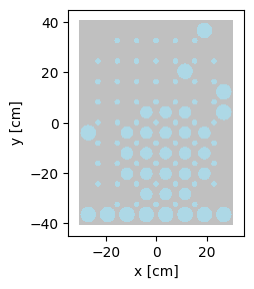

In [37]:
in9999 = +sur0321 & -sur0322 & +sur0323 & -sur0324 & +sur0325 & -sur0326
cell9999 = openmc.Cell(fill=u1127, region=in9999, cell_id=9999)
cell9999.translation = (0.0, 0.0, -50.75)
u9999 = openmc.Universe(cells=[cell9999])
plot_args = {
    "origin": (0, 0, -50.75),
    "width": (70, 90),
    "color_by": "material",
    "colors": materials_colors,
}
u9999.plot(**plot_args)

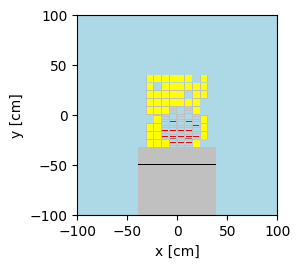

In [38]:
### REACTOR (Real World)
# Regions, following MCNP numbers
in91 = +sur0306 & -sur0307 & +sur0308 & -sur0309 & +sur0310 & -sur0311
in92 = +sur0312 & -sur0313 & +sur0314 & -sur0315 & +sur0316 & -sur0317
in93 = -sur0318 & +sur0319 & -sur0320
in94 = +sur0321 & -sur0322 & +sur0323 & -sur0324 & +sur0325 & -sur0326
in95 = -sur0327
in96 = -sur0328
in97 = -sur0329
in98 = -sur0330
cell1000 = openmc.Cell(fill=u1116, region=in91, cell_id=1000)
cell1000.translation = (0.0, 0.0, 2.4 - 2.4)
cell1001 = openmc.Cell(fill=Al6061, region=in92 & (~in95), cell_id=1001)
cell1002 = openmc.Cell(fill=Cadmium, region=in92 & in95 & (~in96), cell_id=1002)
cell1003 = openmc.Cell(fill=Al6061, region=in92 & in96 & (~in97), cell_id=1003)
cell1004 = openmc.Cell(fill=Cadmium, region=in92 & in97 & (~in98), cell_id=1004)
cell1005 = openmc.Cell(fill=Alumina, region=in92 & in93 & in98, cell_id=1005)
cell1006 = openmc.Cell(
    fill=H2O, region=in93 & (~in91) & (~in92) & (~in94), cell_id=1006
)
cell1007 = openmc.Cell(fill=u1127, region=in94, cell_id=1007)
cell1007.translation = (0.0, 0.0, -48.35 - 2.4)
# cell1008 = openmc.Cell(fill=None, region=~in93, cell_id=1008)

# root_universe = openmc.Universe(cells=[cell1000,cell1001,cell1002,cell1003,cell1004,cell1005,cell1006,cell1007,cell1008],
#                                universe_id=999)

u1000 = openmc.Universe(
    cells=[
        cell1000,
        cell1001,
        cell1002,
        cell1003,
        cell1004,
        cell1005,
        cell1006,
        cell1007,
    ],
    universe_id=1000,
)
plot_args = {
    "origin": (0, 0, 0),
    "width": (200, 200),
    "color_by": "material",
    "colors": materials_colors,
}
if plots:
    u1000.plot(**plot_args)

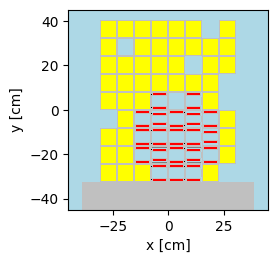

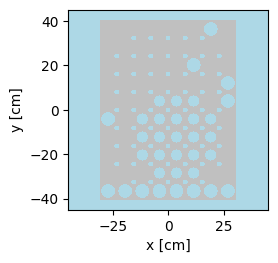

In [39]:
plot_args = {
    "origin": (0, 0, 0),
    "width": (90, 90),
    "color_by": "material",
    "colors": materials_colors,
}
u1000.plot(**plot_args)
plt.show()
plot_args = {
    "origin": (0, 0, -50.75),
    "width": (90, 90),
    "color_by": "material",
    "colors": materials_colors,
}
u1000.plot(**plot_args)
plt.show()

# plot_args = {'origin':(0,-4.05+3.35,0.0),'width': (50, 80), 'pixels':(300,300),'basis':'xz','color_by':'material', 'colors':materials_colors}
# u1000.plot(**plot_args)
# plt.show()

In [40]:
R4int = 10.226 / 2
R4ext = 11.43 / 2
L4int = 0.0
L4ext = L4int + 98.4151  # 68.6+30.75

R6int = 15.406 / 2
R6ext = 16.828 / 2
L6int = L4ext + 13.7
L6ext = L6int + 53.1 + 0.9

R5int = 12.328 / 2
R5ext = 12.788 / 2
L5int = L6int + 1.6
L5ext = L6ext

Rpieza = 12.2 / 2
Lpieza = 5.0

Lp00 = L5int + 1.0
Lp01 = Lp00 + Lpieza
Lp02 = Lp01 + Lpieza
Lp03 = Lp02 + Lpieza
Lp04 = Lp03 + Lpieza
Lp05 = Lp04 + Lpieza
Lp06 = Lp05 + Lpieza
Lp07 = Lp06 + Lpieza
Lp08 = Lp07 + Lpieza
Lp09 = Lp08 + Lpieza
Lp10 = Lp09 + Lpieza

In [41]:
ybeamcatcher = 90.0

yb0 = L6ext + 38.0849 + ybeamcatcher
yb1 = yb0 + 35 - 5
yb2 = yb1 + 5  # espesor poliboro
yb3 = yb2 + 5  # espesor poliboro
yb4 = yb3 + 10  # espesor plomo

xb0 = 0.0
xb1 = xb0 + 20.0 / 2
xb2 = xb1 + 5  # espesor poliboro
xb3 = xb2 + 5  # espesor plomo

zb0 = 0.0
zb1 = zb0 + 25.0 / 2
zb2 = zb1 + 5
zb3 = zb2 + 5

In [42]:
yshielding = 0.1

ys0 = L6ext + 38.0849 + yshielding
ys1 = ys0 + 5.0
ys2 = ys1 + 5.0
ys3 = ys2 + 5.0
ys4 = ys3 + 5.0

xs0 = 0.0
xs1 = xs0 + 3
xs2 = xs0 + 25
xs3 = xs2 + 40

zs0 = 0.0
zs1 = zs0 + 35

In [43]:
# Conducto N5
sur5000 = openmc.YPlane(y0=L4int, surface_id=5000)
sur5001 = openmc.YPlane(y0=L4ext, surface_id=5001)
sur5002 = openmc.YPlane(y0=L6int, surface_id=5002)
sur5003 = openmc.YPlane(y0=L6ext, surface_id=5003)

sur5004 = openmc.YCylinder(r=R4int, surface_id=5004)
sur5005 = openmc.YCylinder(r=R4ext, surface_id=5005)
sur5006 = openmc.YCone(
    y0=(R4int * L6int - R6int * L4ext) / (R4int - R6int),
    r2=((R4int - R6int) / (L6int - L4ext)) ** 2,
    surface_id=5006,
)
sur5007 = openmc.YCone(
    y0=(R4ext * L6int - R6ext * L4ext) / (R4ext - R6ext),
    r2=((R4ext - R6ext) / (L6int - L4ext)) ** 2,
    surface_id=5007,
)
sur5008 = openmc.YCylinder(r=R6int, surface_id=5008)
sur5009 = openmc.YCylinder(r=R6ext, surface_id=5009)
sur5010 = openmc.YPlane(y0=L4int + 5.0, surface_id=5010)

# Blindaje interno
sur5011 = openmc.XPlane(x0=-62.86, surface_id=5011)
sur5012 = openmc.XPlane(x0=27.86, surface_id=5012)
sur5013 = openmc.YPlane(y0=L6ext - 9.55, surface_id=5013)
sur5014 = openmc.YPlane(y0=L6ext - 3.84, surface_id=5014)
sur5015 = openmc.ZPlane(z0=-56.0 / 2, surface_id=5015)
sur5016 = openmc.ZPlane(z0=56.0 / 2, surface_id=5016)

# Caja conducto
sur5020 = openmc.XPlane(x0=-60.5, surface_id=5020)
sur5021 = openmc.XPlane(x0=25.5, surface_id=5021)
sur5022 = openmc.ZPlane(z0=-56.0 / 2, surface_id=5022)
sur5023 = openmc.ZPlane(z0=56.0 / 2, surface_id=5023)

# Shutter conducto (370 ancho, 340 profundidad, 450 altura, )
XSHUTTER = 37.0
sur5030 = openmc.YPlane(y0=L6ext + 3.5, surface_id=5030)
sur5031 = openmc.YPlane(y0=L6ext + 3.5 + 34.0, surface_id=5031)
sur5032 = openmc.XPlane(x0=-XSHUTTER - 37.0 / 2, surface_id=5032)
sur5033 = openmc.XPlane(x0=-XSHUTTER + 37.0 / 2, surface_id=5033)
sur5034 = openmc.ZPlane(z0=-45.0 / 2, surface_id=5034)
sur5035 = openmc.ZPlane(z0=45.0 / 2, surface_id=5035)

# Tubo Delimitador
sur6000 = openmc.YPlane(y0=L5int, surface_id=6000)
sur6001 = openmc.YPlane(y0=L5int + 0.3, surface_id=6001)
sur6002 = openmc.YPlane(y0=L5ext, surface_id=6002)
sur6003 = openmc.YCylinder(r=R5int, surface_id=6003)
sur6004 = openmc.YCylinder(r=R5ext, surface_id=6004)

# Piezas Delimitador
sur7000 = openmc.YCylinder(r=Rpieza, surface_id=7000)
sur7010 = openmc.YPlane(y0=Lp00, surface_id=7010)
sur7011 = openmc.YPlane(y0=Lp01, surface_id=7011)
sur7012 = openmc.YPlane(y0=Lp02, surface_id=7012)
sur7013 = openmc.YPlane(y0=Lp03, surface_id=7013)
sur7014 = openmc.YPlane(y0=Lp04, surface_id=7014)
sur7015 = openmc.YPlane(y0=Lp05, surface_id=7015)
sur7016 = openmc.YPlane(y0=Lp06, surface_id=7016)
sur7017 = openmc.YPlane(y0=Lp07, surface_id=7017)
sur7018 = openmc.YPlane(y0=Lp08, surface_id=7018)
sur7019 = openmc.YPlane(y0=Lp09, surface_id=7019)
sur7020 = openmc.YPlane(y0=Lp10, surface_id=7020)

# Haz Delimitador
sur7030 = openmc.YCylinder(z0=1.65 / 2, r=0.725, surface_id=7030)
sur7031 = openmc.YCylinder(z0=-1.65 / 2, r=0.725, surface_id=7031)
sur7032 = openmc.ZPlane(z0=-1.65 / 2, surface_id=7032)
sur7033 = openmc.ZPlane(z0=1.65 / 2, surface_id=7033)
sur7034 = openmc.XPlane(x0=-1.45 / 2, surface_id=7034)
sur7035 = openmc.XPlane(x0=1.45 / 2, surface_id=7035)

# Beam-Catcher
sur8100 = openmc.YPlane(y0=yb0, surface_id=8100)
sur8101 = openmc.YPlane(y0=yb1, surface_id=8101)
sur8102 = openmc.YPlane(y0=yb2, surface_id=8102)
sur8103 = openmc.YPlane(y0=yb3, surface_id=8103)
sur8104 = openmc.YPlane(y0=yb4, surface_id=8104)

sur8110 = openmc.XPlane(x0=xb0, surface_id=8110)
sur8111 = openmc.XPlane(x0=-xb1, surface_id=8111)
sur8112 = openmc.XPlane(x0=+xb1, surface_id=8112)
sur8113 = openmc.XPlane(x0=-xb2, surface_id=8113)
sur8114 = openmc.XPlane(x0=+xb2, surface_id=8114)
sur8115 = openmc.XPlane(x0=-xb3, surface_id=8115)
sur8116 = openmc.XPlane(x0=+xb3, surface_id=8116)

sur8120 = openmc.ZPlane(z0=zb0, surface_id=8120)
sur8121 = openmc.ZPlane(z0=-zb1, surface_id=8121)
sur8122 = openmc.ZPlane(z0=+zb1, surface_id=8122)
sur8123 = openmc.ZPlane(z0=-zb2, surface_id=8123)
sur8124 = openmc.ZPlane(z0=+zb2, surface_id=8124)
sur8125 = openmc.ZPlane(z0=-zb3, surface_id=8125)
sur8126 = openmc.ZPlane(z0=+zb3, surface_id=8126)

# Blindajes
sur8200 = openmc.YPlane(y0=ys0, surface_id=8400)
sur8201 = openmc.YPlane(y0=ys1, surface_id=8401)
sur8202 = openmc.YPlane(y0=ys2, surface_id=8402)
sur8203 = openmc.YPlane(y0=ys3, surface_id=8403)
sur8204 = openmc.YPlane(y0=ys4, surface_id=8404)

sur8210 = openmc.XPlane(x0=xs0, surface_id=8500)
sur8211 = openmc.XPlane(x0=-xs1, surface_id=8501)
sur8212 = openmc.XPlane(x0=+xs1, surface_id=8502)
sur8213 = openmc.XPlane(x0=-xs2, surface_id=8503)
sur8214 = openmc.XPlane(x0=+xs2, surface_id=8504)
sur8215 = openmc.XPlane(x0=-xs3, surface_id=8505)
sur8216 = openmc.XPlane(x0=+xs3, surface_id=8506)

sur8220 = openmc.ZPlane(z0=zs0, surface_id=8600)
sur8221 = openmc.ZPlane(z0=-zs1, surface_id=8601)
sur8222 = openmc.ZPlane(z0=+zs1, surface_id=8602)

# Pileta reactor
sur9000 = openmc.ZPlane(z0=-200, boundary_type="vacuum", surface_id=9000)
sur9001 = openmc.ZPlane(z0=-200 + 1040, boundary_type="vacuum", surface_id=9001)
sur9002 = openmc.ZCylinder(r=120, surface_id=9002)
sur9003 = openmc.ZCylinder(r=120 + 0.8, surface_id=9003)

# Concreto reactor
angulos = np.linspace(0, 360, 9) * np.pi / 180.0
apot = 650 / 2.0
sagt = sqrt(2) * apot
puntos = [
    np.array([+apot, 0, 0]),
    np.array([0, 0 + sagt, 0]),
    np.array([0, +apot, 0]),
    np.array([0, +sagt, 0]),
    np.array([-apot, 0, 0]),
    np.array([0, -sagt, 0]),
    np.array([0, -apot, 0]),
    np.array([0, -sagt, 0]),
]
planos = []
i = 0
for ang, x0 in zip(angulos, puntos):
    n = np.array([np.cos(ang), np.sin(ang), 0])
    planos.append(
        openmc.Plane(a=n[0], b=n[1], c=n[2], d=np.dot(n, x0), surface_id=9004 + i)
    )
    i = i + 1
octogono = (
    -planos[0]
    & -planos[1]
    & -planos[2]
    & -planos[3]
    & -planos[4]
    & -planos[5]
    & -planos[6]
    & -planos[7]
)


# Caja envolvente conjunto
sur9012 = openmc.XPlane(x0=-130, surface_id=9012)
sur9013 = openmc.XPlane(x0=130, surface_id=9013)
sur9014 = openmc.YPlane(y0=0.0, surface_id=9014)
sur9015 = openmc.YPlane(y0=apot, surface_id=9015)
sur9016 = openmc.ZPlane(z0=-130, surface_id=9016)
sur9017 = openmc.ZPlane(z0=+130, surface_id=9017)

# Conducto interno N5
ang = np.deg2rad(45 + 90)
vnorm = np.array([cos(ang), sin(ang), 0])
P1 = np.array([-15, 44.1, 0])
P2 = np.array([-15, 44.1 + 1.2 * sqrt(2), 0])
vP = P2 - P1
sur9500 = openmc.Cylinder(
    x0=P1[0],
    y0=P1[1],
    z0=P1[2],
    r=12.4 / 2,
    dx=vP[0],
    dy=vP[1],
    dz=vP[2],
    surface_id=9500,
)
sur9501 = openmc.Cylinder(
    x0=P1[0],
    y0=P1[1],
    z0=P1[2],
    r=13.0 / 2,
    dx=vP[0],
    dy=vP[1],
    dz=vP[2],
    surface_id=9501,
)
sur9502 = openmc.Plane(
    a=vnorm[0], b=vnorm[1], c=vnorm[2], d=np.dot(vnorm, P1), surface_id=9502
)
sur9503 = openmc.Plane(
    a=vnorm[0], b=vnorm[1], c=vnorm[2], d=np.dot(vnorm, P2), surface_id=9503
)
sur9504 = openmc.YPlane(y0=115.0, surface_id=9504)
sur9505 = openmc.ZCylinder(r=120 - 1.2, surface_id=9505)
sur9506 = sur9002  # openmc.ZCylinder(r=120,surface_id=9506)


# Conducto interno N1
ang = np.deg2rad(45 + 180)
vnorm_tapa = np.array([cos(ang), sin(ang), 0])
ang = np.deg2rad(60 + 180)
vnorm_eje = np.array([cos(ang), sin(ang), 0])
P1 = np.array([-8.630953, -36.199617, 0])
P2 = np.array([-9.888066, -38.377001, 0])
P3 = np.array([-44.372176, -98.105231, 0])
P4 = np.array([-100.222176, -194.840269, 0])

vP = P2 - P1
sur9100 = openmc.Cylinder(
    x0=P1[0],
    y0=P1[1],
    z0=P1[2],
    r=12.82 / 2,
    dx=vP[0],
    dy=vP[1],
    dz=vP[2],
    surface_id=9100,
)
sur9101 = openmc.Cylinder(
    x0=P1[0],
    y0=P1[1],
    z0=P1[2],
    r=14.13 / 2,
    dx=vP[0],
    dy=vP[1],
    dz=vP[2],
    surface_id=9101,
)
sur9102 = openmc.Plane(
    a=vnorm_tapa[0],
    b=vnorm_tapa[1],
    c=vnorm_tapa[2],
    d=np.dot(vnorm_tapa, P1),
    surface_id=9102,
)
sur9103 = openmc.Plane(
    a=vnorm_tapa[0],
    b=vnorm_tapa[1],
    c=vnorm_tapa[2],
    d=np.dot(vnorm_tapa, P1 + 0.6 * vnorm_tapa),
    surface_id=9103,
)
sur9104 = openmc.Plane(
    a=vnorm_eje[0],
    b=vnorm_eje[1],
    c=vnorm_eje[2],
    d=np.dot(vnorm_eje, P2),
    surface_id=9104,
)
sur9105 = openmc.Plane(
    a=vnorm_eje[0],
    b=vnorm_eje[1],
    c=vnorm_eje[2],
    d=np.dot(vnorm_eje, P3),
    surface_id=9105,
)
sur9106 = openmc.Plane(
    a=vnorm_eje[0],
    b=vnorm_eje[1],
    c=vnorm_eje[2],
    d=np.dot(vnorm_eje, P3 + 5.0 * vnorm_eje),
    surface_id=9106,
)  # sur9003
sur9107 = openmc.Plane(
    a=vnorm_eje[0],
    b=vnorm_eje[1],
    c=vnorm_eje[2],
    d=np.dot(vnorm_eje, P4),
    surface_id=9107,
)


sur9999 = openmc.ZCylinder(r=apot + 200, boundary_type="vacuum", surface_id=9999)

In [44]:
# Conducto interno N5
sur9020 = openmc.YCylinder(
    x0=-15,
    r=12.4 / 2,
    surface_id=9020,
)
sur9021 = openmc.YCylinder(
    x0=-15,
    r=13.0 / 2,
    surface_id=9021,
)
sur9022 = openmc.Plane(
    a=-1,
    b=1,
    c=0,
    d=np.dot(np.array([-1, 1, 0]), np.array([-15, 44.1, 0])),
    surface_id=9022,
)
sur9023 = openmc.Plane(
    a=-1,
    b=1,
    c=0,
    d=np.dot(np.array([-1, 1, 0]), np.array([-15, 44.1 + np.sqrt(2), 0])),
    surface_id=9023,
)
sur9024 = openmc.ZCylinder(
    r=120 - 1.2,
    surface_id=9024,
)

In [45]:
# Haz Delimitador
reg7030 = (
    (-sur7030 | -sur7031 | (+sur7032 & -sur7033 & +sur7034 & -sur7035))
    & +sur7010
    & -sur7020
)
cell7030 = openmc.Cell(region=reg7030, fill=Air, cell_id=7030)

reg7010 = -sur7000 & +sur7010 & -sur7011 & ~reg7030
reg7011 = -sur7000 & +sur7011 & -sur7012 & ~reg7030
reg7012 = -sur7000 & +sur7012 & -sur7013 & ~reg7030
reg7013 = -sur7000 & +sur7013 & -sur7014 & ~reg7030
reg7014 = -sur7000 & +sur7014 & -sur7015 & ~reg7030
reg7015 = -sur7000 & +sur7015 & -sur7016 & ~reg7030
reg7016 = -sur7000 & +sur7016 & -sur7017 & ~reg7030
reg7017 = -sur7000 & +sur7017 & -sur7018 & ~reg7030
reg7018 = -sur7000 & +sur7018 & -sur7019 & ~reg7030
reg7019 = -sur7000 & +sur7019 & -sur7020 & ~reg7030

# Piezas delimitador
cell7010 = openmc.Cell(region=reg7010, fill=Polyborated, cell_id=7010)
cell7012 = openmc.Cell(region=reg7012, fill=Polyborated, cell_id=7012)
cell7014 = openmc.Cell(region=reg7014, fill=Polyborated, cell_id=7014)
cell7016 = openmc.Cell(region=reg7016, fill=Polyborated, cell_id=7016)
cell7018 = openmc.Cell(region=reg7018, fill=Polyborated, cell_id=7018)

cell7011 = openmc.Cell(region=reg7011, fill=Lead, cell_id=7011)
cell7013 = openmc.Cell(region=reg7013, fill=Lead, cell_id=7013)
cell7015 = openmc.Cell(region=reg7015, fill=Lead, cell_id=7015)
cell7017 = openmc.Cell(region=reg7017, fill=Lead, cell_id=7017)
cell7019 = openmc.Cell(region=reg7019, fill=Lead, cell_id=7019)

# Exterior piezas
reg7000 = +sur7000 | -sur7010 | +sur7020
cell7000 = openmc.Cell(region=reg7000, fill=Air, cell_id=7000)

u7000 = openmc.Universe(
    cells=[
        cell7000,
        cell7010,
        cell7011,
        cell7012,
        cell7013,
        cell7014,
        cell7015,
        cell7016,
        cell7017,
        cell7018,
        cell7019,
        cell7030,
    ],
    universe_id=7000,
)

In [46]:
# Interior delimitador
reg6000 = +sur6001 & -sur6002 & -sur6003
cell6000 = openmc.Cell(region=reg6000, fill=u7000, cell_id=6000)

# Tubo delimitador
reg6001 = (+sur6001 & -sur6002 & +sur6003 & -sur6004) | (+sur6000 & -sur6001 & -sur6004)
cell6001 = openmc.Cell(region=reg6001, fill=Al6061, cell_id=6001)

# Exterior delimitador
reg6002 = -sur6000 | +sur6002 | +sur6004
cell6002 = openmc.Cell(region=reg6002, fill=Air, cell_id=6002)

u6000 = openmc.Universe(cells=[cell6000, cell6001, cell6002], universe_id=6000)

/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=5000.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=5001.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=5002.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=5003.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=5004.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70:

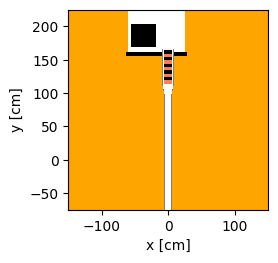

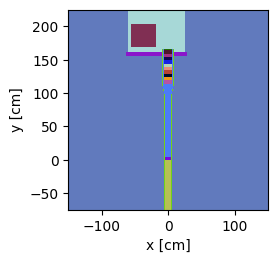

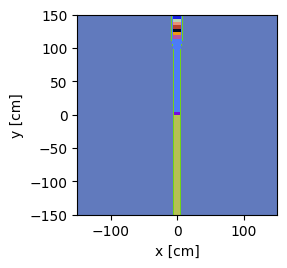

In [60]:
# Interior Conducto N5
reg5000 = -sur5000 & -sur5004
if CONDUCTO == 5:
    cell5000 = openmc.Cell(region=reg5000, fill=None, cell_id=5000)
else:
    cell5000 = openmc.Cell(region=reg5000, fill=H2O, cell_id=5000)

reg5001 = +sur5000 & -sur5010 & -sur5004
if CONDUCTO == 5:
    cell5001 = openmc.Cell(region=reg5001, fill=None, cell_id=5001)
else:
    cell5001 = openmc.Cell(region=reg5001, fill=H2O, cell_id=5001)


reg5002 = (
    (+sur5010 & -sur5001 & -sur5004)
    | (+sur5001 & -sur5002 & -sur5006)
    | (+sur5002 & -sur5003 & -sur5008)
)
if CONDUCTO == 5:
    cell5002 = openmc.Cell(region=reg5002, fill=u6000, cell_id=5002)
else:
    cell5002 = openmc.Cell(region=reg5002, fill=H2O, cell_id=5002)


# Conducto
reg5003 = (
    (-sur5000 & +sur5004 & -sur5005)
    | (+sur5000 & -sur5001 & +sur5004 & -sur5005)
    | (+sur5001 & -sur5002 & +sur5006 & -sur5007)
    | (+sur5002 & -sur5003 & +sur5008 & -sur5009)
)
cell5003 = openmc.Cell(region=reg5003, fill=SS316L, cell_id=5003)

# Concreto externo
reg5004 = (
    (-sur5000 & +sur5005)
    | (+sur5000 & -sur5001 & +sur5005)
    | (+sur5001 & -sur5002 & +sur5007)
    | (+sur5002 & -sur5014 & +sur5009)
    | (+sur5014 & -sur5003 & +sur5009)
    | (+sur5003)
)

# Shutter
reg5005 = +sur5030 & -sur5031 & +sur5032 & -sur5033 & +sur5034 & -sur5035

# Caja del conducto
reg5006 = (+sur5020 & -sur5021 & +sur5022 & -sur5023) & (
    (+sur5003) | (+sur5014 & -sur5003 & +sur5009)
)


# Blindaje interno
reg5010 = +sur5011 & -sur5012 & +sur5013 & -sur5014 & +sur5015 & -sur5016

cell5004 = openmc.Cell(region=reg5010 & reg5004, fill=Lead, cell_id=5004)
cell5005 = openmc.Cell(region=reg5005 & reg5004, fill=Lead, cell_id=5005)
cell5006 = openmc.Cell(region=reg5006 & reg5004 & ~reg5005, fill=Air, cell_id=5006)
cell5007 = openmc.Cell(
    region=reg5004 & ~reg5010 & ~reg5006, fill=Concrete, cell_id=5007
)


# cell5006=openmc.Cell(region=+sur5003,fill=Air,cell_id=5006)

u5000 = openmc.Universe(
    cells=[
        cell5000,
        cell5001,
        cell5002,
        cell5003,
        cell5004,
        cell5005,
        cell5006,
        cell5007,
    ],
    universe_id=5000,
)
u5000.plot(
    origin=(0.0, 75, 0.0),
    width=(300,300),
    pixels=(200, 200),
    basis='xy',
    color_by='material',
    colors=materials_colors
)
plt.show()
u5000.plot(
    origin=(0.0, 75, 0.0),
    width=(300,300),
    pixels=(200, 200),
    basis='xy',
    color_by='cell'
)
plt.show()
u5000.plot(
    origin=(0.0, 0, 0.0),
    width=(300,300),
    pixels=(200, 200),
    basis='xy',
    color_by='cell'
)
plt.show()

In [48]:
# Tramo interno Conducto N1
reg9101 = -sur9100 & +sur9102 & -sur9103
reg9102 = -sur9100 & +sur9103 & -sur9104
reg9103 = -sur9100 & +sur9104 & -sur9105
reg9104 = -sur9100 & +sur9105 & -sur9106
reg9105 = -sur9100 & +sur9106 & -sur9107 & +sur9102
reg9106 = +sur9100 & -sur9101 & +sur9102 & -sur9107
reg9199 = +sur9101 | -sur9102 | +sur9107

if CONDUCTO == 1:
    cell9100 = openmc.Cell(
        region=reg9102 | reg9103 | reg9104 | reg9105, fill=None, cell_id=9100
    )
    cell9110 = openmc.Cell(region=reg9101 | reg9106, fill=SS316L, cell_id=9110)
else:
    cell9100 = openmc.Cell(
        region=reg9102 | reg9103 | reg9104 | reg9105, fill=H2O, cell_id=9100
    )
    cell9110 = openmc.Cell(region=reg9101 | reg9106, fill=SS316L, cell_id=9110)


# Tramo interno Conducto N5
reg9501 = -sur9500 & +sur9502 & -sur9503
reg9502 = -sur9500 & +sur9503 & -sur9504
reg9503 = -sur9500 & +sur9504 & -sur9505
reg9504 = -sur9500 & +sur9505 & -sur9506 & +sur9502
reg9505 = +sur9500 & -sur9501 & +sur9502 & -sur9506
reg9599 = +sur9501 | -sur9502 | +sur9506

if CONDUCTO == 5:
    cell9500 = openmc.Cell(region=reg9502 | reg9503, fill=None, cell_id=9500)
    cell9510 = openmc.Cell(
        region=reg9501 | reg9504 | reg9505, fill=Aluminum, cell_id=9510
    )
else:
    cell9500 = openmc.Cell(region=reg9502 | reg9503, fill=H2O, cell_id=9500)
    cell9510 = openmc.Cell(region=reg9501 | reg9504 | reg9505, fill=H2O, cell_id=9510)

In [49]:
# # cell_aux=openmc.Cell(region=reg9021|reg9022|reg9023)
# cell_aux = openmc.Cell(region=reg9020b)
# uni_aux = openmc.Universe(cells=[cell_aux])
# uni_aux.plot(origin=(-15, 80, 0), width=(90, 90), pixels=(300, 300))
# uni_aux.plot(origin=(-30,-70,0),width=(90,90),pixels=(300,300))

/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=9001.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=9002.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=9003.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=9004.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=9999.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70:

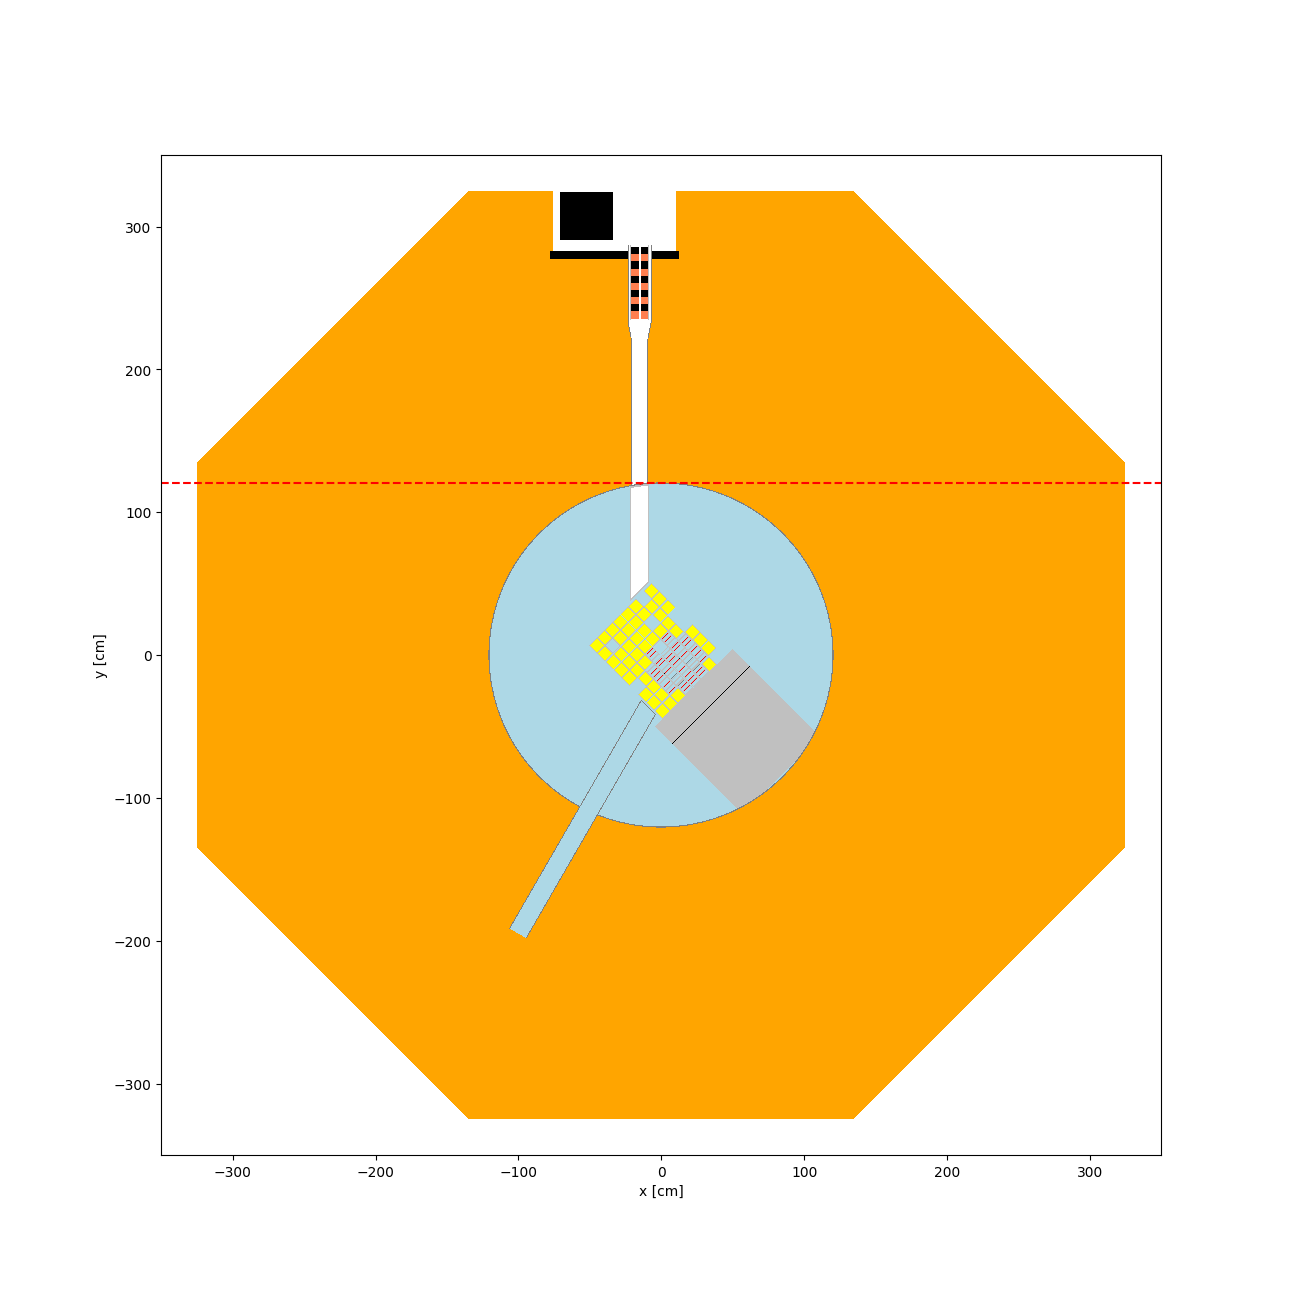

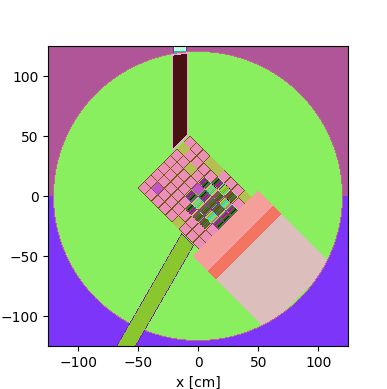

In [69]:
# Agua reactor
if NUCLEO == "07":
    reg9001 = +sur9000 & -sur9001 & -sur9002
else:
    reg9001 = +sur9000 & -sur9001 & -sur9002 & reg9199 & reg9599
cell9001 = openmc.Cell(region=reg9001, fill=u1000, cell_id=9001)
if NUCLEO != "07":
    cell9001.rotation = (0, 0, 45)

# Pileta reactor
if NUCLEO == "07":
    reg9002 = +sur9000 & -sur9001 & +sur9002 & -sur9003
else:
    reg9002 = +sur9000 & -sur9001 & +sur9002 & -sur9003 & reg9199 & reg9599
cell9002 = openmc.Cell(region=reg9002, fill=SS316L, cell_id=9002)

# Conducto N5
reg9003 = +sur9012 & -sur9013 & +sur9014 & -sur9015 & +sur9016 & -sur9017 & +sur9003
if NUCLEO == "07":
    cell9003 = openmc.Cell(region=reg9003, fill=None, cell_id=9003)
else:
    cell9003 = openmc.Cell(region=reg9003, fill=u5000, cell_id=9003)
if NUCLEO != "07":
    cell9003.translation = (-15.00, 120.80, 0.00)

# Concreto reactor
if NUCLEO == "07":
    reg9004 = +sur9000 & -sur9001 & +sur9003 & octogono
    cell9004 = openmc.Cell(region=reg9004, fill=None, cell_id=9004)
else:
    reg9004 = +sur9000 & -sur9001 & +sur9003 & octogono & ~reg9003 & reg9199 & reg9599
    cell9004 = openmc.Cell(region=reg9004, fill=Concrete, cell_id=9004)

# Afuera
cell9999 = openmc.Cell(
    region=-sur9999 & +sur9000 & -sur9001 & ~octogono, fill=None, cell_id=9999
)
if NUCLEO == "07":
    u9000 = openmc.Universe(
        cells=[cell9001, cell9002, cell9004, cell9999], universe_id=9000
    )
else:
    u9000 = openmc.Universe(
        cells=[
            cell9001,
            cell9002,
            cell9003,
            cell9004,
            cell9100,
            cell9110,
            cell9500,
            cell9510,
            cell9999,
        ],
        universe_id=9000,
    )
%matplotlib widget
plot_args = {
    "origin": (0, 0, 0),
    "width": (700, 700),
    "pixels": (1000, 1000),
    "color_by": "material",
    "colors": materials_colors,
}
ax = u9000.plot(**plot_args)
# marca un punto/estrella en (-15, 120.8)
ax.scatter(-15, 120.8, color="red", marker="*", s=1)
ax.axhline(120.8, color="red", linestyle="--")
plt.show()
plot_args = {
    "origin": (0, 0, 0),
    "width": (250, 250),
    "pixels": (300, 300),
    "color_by": "cell",
}
u9000.plot(**plot_args)
plt.show()

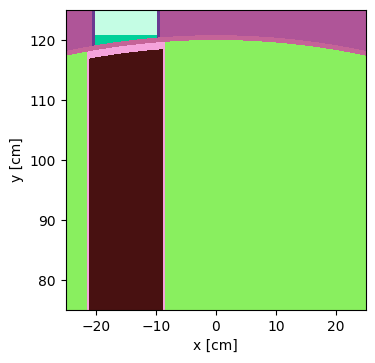

In [51]:
plot_args = {
    "origin": (0, 100, 0),
    "width": (50, 50),
    "pixels": (300, 300),
    "color_by": "cell",
}

u9000.plot(**plot_args)
plt.show()

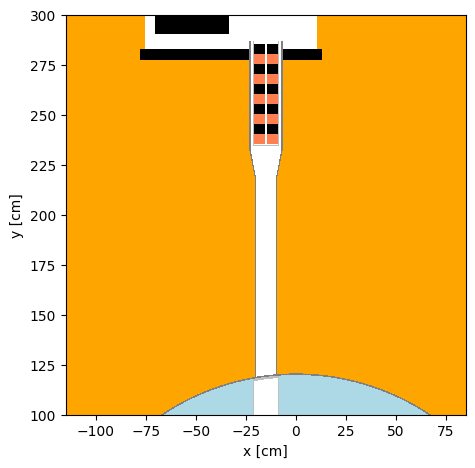

In [52]:
plot_args = {'origin':(-15,200,0),
             'width': (200, 200),
             'pixels':(400,400),
             'color_by':'material',
              'colors':materials_colors
            }
u9000.plot(**plot_args)
plt.show()

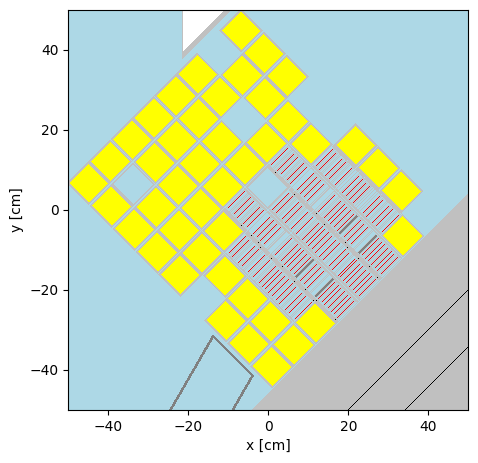

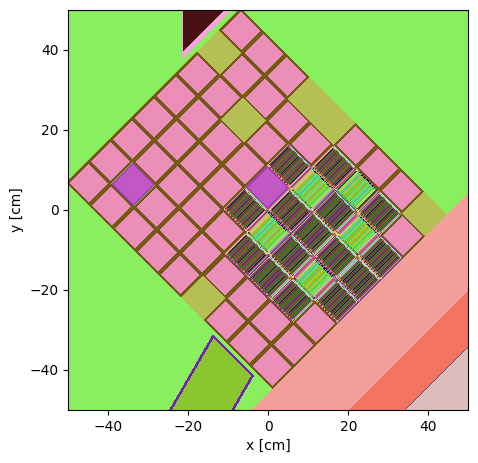

In [53]:
plot_args = {
    "origin": (0, 0, 0),
    "width": (100, 100),
    "pixels": (400, 400),
    "color_by": "material",
    "colors": materials_colors,
}
u9000.plot(**plot_args)
plt.show()
plot_args = {
    "origin": (0, 0, 0),
    "width": (100, 100),
    "pixels": (400, 400),
    "color_by": "cell",
}
u9000.plot(**plot_args)
plt.show()

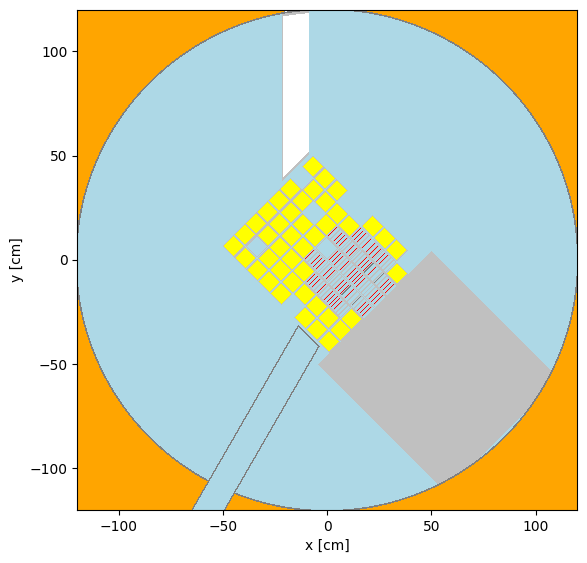

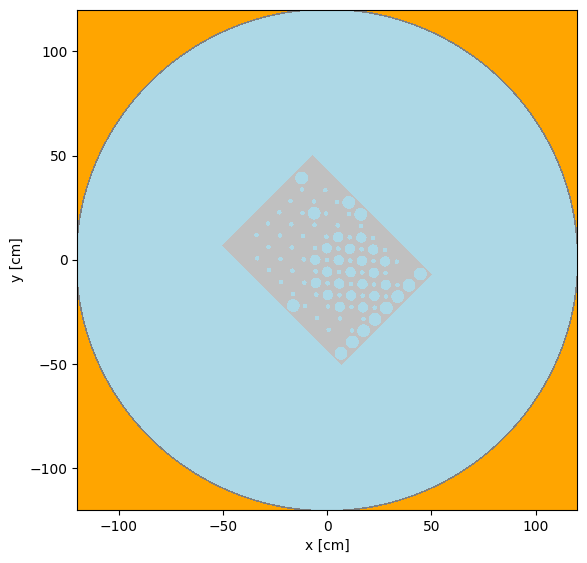

In [54]:
plt.rcParams["figure.figsize"] = (15, 15)
# plt.subplot(121)
u9000.plot(
    origin=(0, 0, 0),
    width=(240, 240),
    color_by="material",
    colors=materials_colors,
    pixels=(500, 500),
)
# plt.subplot(122)
u9000.plot(
    origin=(0, 0, -51),
    width=(240, 240),
    color_by="material",
    colors=materials_colors,
    pixels=(500, 500),
)
plt.show()

<Axes: xlabel='y [cm]', ylabel='z [cm]'>

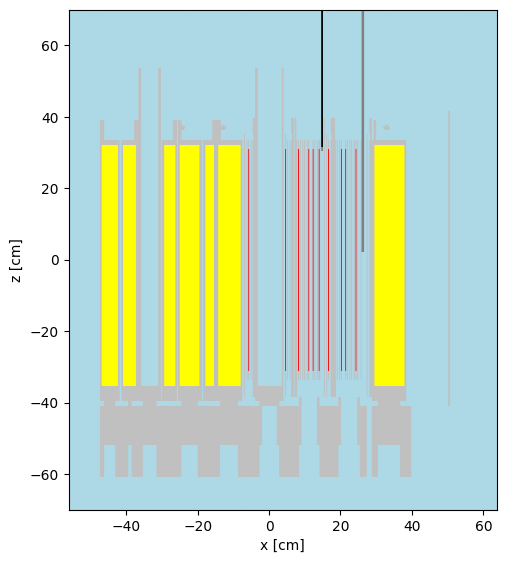

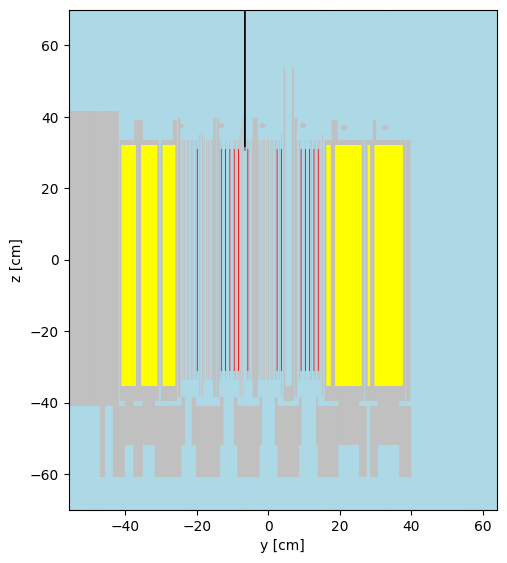

In [55]:
# subplot(121)
u9000.plot(
    origin=(7.7 / 2, 8.1 / 2, 0),
    width=(120, 140),
    basis="xz",
    color_by="material",
    colors=materials_colors,
    pixels=(500, 500),
)
# subplot(122)
u9000.plot(
    origin=(7.7 / 2, 8.1 / 2, 0),
    width=(120, 140),
    basis="yz",
    color_by="material",
    colors=materials_colors,
    pixels=(500, 500),
)

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

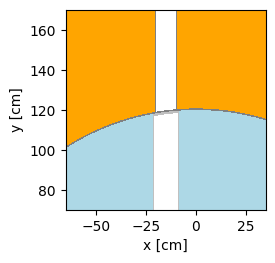

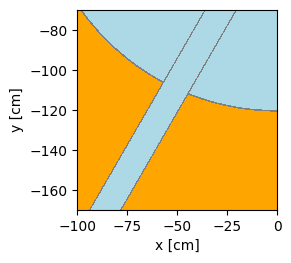

In [56]:
plot_args = {
    "origin": (-15, 120, 0),
    "width": (100, 100),
    "color_by": "material",
    "colors": materials_colors,
}
u9000.plot(**plot_args)
# show()
plot_args = {
    "origin": (-50, -120, 0),
    "width": (100, 100),
    "color_by": "material",
    "colors": materials_colors,
}
u9000.plot(**plot_args)
# show()

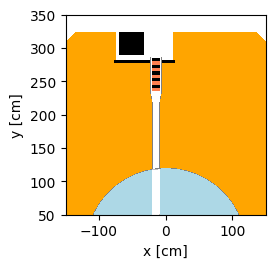

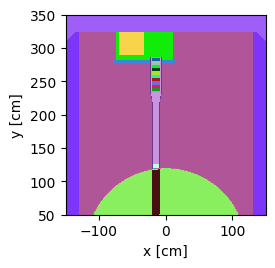

<Axes: xlabel='y [cm]', ylabel='z [cm]'>

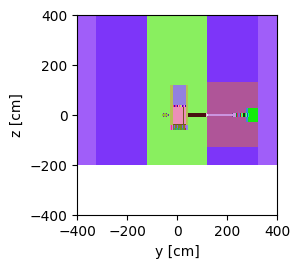

In [57]:
plt.rcParams["figure.figsize"] = 10, 10
# %matplotlib widget
plot_args = {
    "origin": (0, 200, 0),
    "width": (300, 300),
    "pixels": (200, 200),
    "color_by": "material",
    "colors": materials_colors,
}
u9000.plot(**plot_args)
plt.show()
plot_args = {
    "origin": (0, 200, 0),
    "width": (300, 300),
    "pixels": (200, 200),
    "color_by": "cell",
}
u9000.plot(**plot_args)
plt.show()
plot_args = {
    "origin": (-15, 0, 0),
    "basis": "yz",
    "width": (800, 800),
    "pixels": (200, 200),
    "color_by": "cell",
}
u9000.plot(**plot_args)

In [ ]:
#!mv *.h5 ../Statepoints/
#!rm *.xml
#!rm *.h5
#!rm *.out

TypeError: plot_geometry() got an unexpected keyword argument 'plots_file'

In [ ]:
openmc_exe = "openmc"
# openmc_data="/home/vissffin/openmc/data/endfb-viii.0-hdf5/cross_sections.xml"#"/home/norberto/openmc/data/endfb71_hdf5/cross_sections.xml"
# openmc_data="/home/norberto/openmc/data/endfb71_hdf5/cross_sections_delayed.xml"

geom = openmc.Geometry(u9000)
geom.export_to_xml()
mats = openmc.Materials(geom.get_all_materials().values())
# mats.cross_sections = openmc_data
mats.export_to_xml()

In [ ]:
#!rm *.ppm
plots = openmc.Plots()

plot_xy = openmc.Plot()
plot_xy.id = 1
plot_xy.basis = "xy"
plot_xy.origin = (0, 0, 0)
plot_xy.width = ((apot + 10) * 2, (apot + 10) * 2)
plot_xy.pixels = (5000, 5000)
plot_xy.color_by = "material"
plot_xy.colors = materials_colors
plots.append(plot_xy)

# plot_yz = openmc.Plot()
# plot_yz.id = 2
# plot_yz.basis = 'yz'
# plot_yz.origin = (-15,0.0,(850+-190)*0.5)
# plot_yz.width = ((apot+10)*2,(850+10)-(-190-10))
# plot_yz.pixels = (5000, 5000)
# plot_yz.color_by='material'
# plot_yz.colors=materials_colors
# plots.append(plot_yz)

# plot_3D = openmc.Plot()
# plot_3D.id = 3
# plot_3D.type = 'voxel'
# plot_3D.width = (120.0,120.0,240.0)
# plot_3D.origin = (0.0, 0.0, 0.0)
# plot_3D.pixels = (400, 400, 200)
# plot_3D.color_by = 'material'
# plot_3D.colors = materials_colors
# plots.append(plot_3D)

plots.export_to_xml()
# openmc.plot_geometry()

/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another PlotBase instance already exists with id=1.
  warn(msg, IDWarning)


## Tallies

In [ ]:
tallies = openmc.Tallies()

# Filtro de grilla
mesh_xy = openmc.RegularMesh(mesh_id=1)
mesh_xy.lower_left = [-(apot + 10), -(apot + 10), -3.1 / 2]
mesh_xy.upper_right = [(apot + 10), (apot + 10), 3.1 / 2]
mesh_xy.dimension = [int(2 * (apot + 10)), int(2 * (apot + 10)), 1]
filter_mesh_xy = openmc.filter.MeshFilter(mesh_xy, filter_id=1)

mesh_yz = openmc.RegularMesh(mesh_id=2)
mesh_yz.lower_left = [-1.45 / 2 - 15.0, -(apot + 10), -190 - 10]
mesh_yz.upper_right = [1.45 / 2 - 15.0, (apot + 10), 850 + 10]
mesh_yz.dimension = [1, int(2 * (apot + 10)), int(850 + 10 + 190 + 10)]
filter_mesh_yz = openmc.filter.MeshFilter(mesh_yz, filter_id=2)

# Filtro de particulas
neutron = openmc.ParticleFilter(["neutron"], filter_id=5)
photon = openmc.ParticleFilter(["photon"], filter_id=6)

# Filtro de energías
filter_energy_neutron = openmc.filter.EnergyFilter(
    np.logspace(np.log10(1e-5), np.log10(2e7), 201), filter_id=9
)
filter_energy_photon = openmc.filter.EnergyFilter(
    np.linspace(0, 2e7, 201), filter_id=10
)

if CONDUCTO == 1:
    filter_surf1 = openmc.filter.SurfaceFilter([sur9104], filter_id=13)
    filter_surf2 = openmc.filter.SurfaceFilter([sur9105], filter_id=14)

    spectra_neutron = openmc.Tally(name="spectra_neutron", tally_id=13)
    spectra_neutron.scores = ["current"]
    spectra_neutron.filters = [filter_energy_neutron, filter_surf1, neutron]
    tallies.append(spectra_neutron)

    # spectra_photon = openmc.Tally(name='spectra_photon',tally_id=14)
    # spectra_photon.scores = ['current']
    # spectra_photon.filters = [filter_energy_photon,filter_surf1,photon]
    # tallies.append(spectra_photon)

    patron_neutron = openmc.Tally(name="patron_neutron", tally_id=15)
    patron_neutron.scores = ["current"]
    patron_neutron.filters = [filter_energy_neutron, filter_surf2, neutron]
    tallies.append(patron_neutron)

# patron_photon=openmc.Tally(name='patron_photon',tally_id=16)
# patron_photon.scores=['current']
# patron_photon.filters=[filter_energy_photon,filter_surf2,photon]
# tallies.append(patron_photon)

# track_neutron1=openmc.Tally(name='track_neutron1',tally_id=19)
# track_neutron1.scores=['track-surface']
# track_neutron1.filters=[filter_surf1,neutron]
# tallies.append(track_neutron1)

# track_photon1=openmc.Tally(name='track_photon1',tally_id=20)
# track_photon1.scores=['track-surface']
# track_photon1.filters=[filter_surf1,photon]
# tallies.append(track_photon1)

# track_neutron2=openmc.Tally(name='track_neutron2',tally_id=21)
# track_neutron2.scores=['track-surface']
# track_neutron2.filters=[filter_surf2,neutron]
# tallies.append(track_neutron2)

# track_photon2=openmc.Tally(name='track_photon2',tally_id=22)
# track_photon2.scores=['track-surface']
# track_photon2.filters=[filter_surf2,photon]
# tallies.append(track_photon2)

elif CONDUCTO == 5:
    filter_surf1 = openmc.filter.SurfaceFilter([sur9504], filter_id=13)
    filter_surf2 = openmc.filter.SurfaceFilter([sur5000], filter_id=14)

    spectra_neutron = openmc.Tally(name="spectra_neutron", tally_id=13)
    spectra_neutron.scores = ["current"]
    spectra_neutron.filters = [filter_energy_neutron, filter_surf1, neutron]
    tallies.append(spectra_neutron)

    # spectra_photon = openmc.Tally(name='spectra_photon',tally_id=14)
    # spectra_photon.scores = ['current']
    # spectra_photon.filters = [filter_energy_photon,filter_surf1,photon]
    # tallies.append(spectra_photon)
    #
    patron_neutron = openmc.Tally(name="patron_neutron", tally_id=15)
    patron_neutron.scores = ["current"]
    patron_neutron.filters = [filter_energy_neutron, filter_surf2, neutron]
    tallies.append(patron_neutron)

# patron_photon=openmc.Tally(name='patron_photon',tally_id=16)
# patron_photon.scores=['current']
# patron_photon.filters=[filter_energy_photon,filter_surf2,photon]
# tallies.append(patron_photon)

# track_neutron1=openmc.Tally(name='track_neutron1',tally_id=19)
# track_neutron1.scores=['track-surface']
# track_neutron1.filters=[filter_surf1,neutron]
# tallies.append(track_neutron1)

# track_photon1=openmc.Tally(name='track_photon1',tally_id=20)
# track_photon1.scores=['track-surface']
# track_photon1.filters=[filter_surf1,photon]
# tallies.append(track_photon1)

# track_neutron2=openmc.Tally(name='track_neutron2',tally_id=21)
# track_neutron2.scores=['track-surface']
# track_neutron2.filters=[filter_surf2,neutron]
# tallies.append(track_neutron2)

# track_photon2=openmc.Tally(name='track_photon2',tally_id=22)
# track_photon2.scores=['track-surface']
# track_photon2.filters=[filter_surf2,photon]
# tallies.append(track_photon2)


# Tallies


# # Filtro de dosis
# En_ARN,h10n_ARN=np.loadtxt('../h10ARN_neutron',unpack=True)
# Eg_ARN,h10g_ARN=np.loadtxt('../h10ARN_photon',unpack=True)

# filter_dose_neutron=openmc.filter.EnergyFunctionFilter(En_ARN,h10n_ARN,filter_id=7)
# filter_dose_photon=openmc.filter.EnergyFunctionFilter(Eg_ARN,h10g_ARN,filter_id=8)

# dose_neutron_xy = openmc.Tally(name='dose_neutron_xy',tally_id=1)
# dose_neutron_xy.scores = ["flux"]
# dose_neutron_xy.filters = [filter_mesh_xy,filter_dose_neutron,neutron]
# tallies.append(dose_neutron_xy)

# dose_photon_xy = openmc.Tally(name='dose_photon_xy',tally_id=2)
# dose_photon_xy.scores = ["flux"]
# dose_photon_xy.filters = [filter_mesh_xy,filter_dose_photon,photon]
# tallies.append(dose_photon_xy)

# flux_neutron_xy = openmc.Tally(name='flux_neutron_xy',tally_id=3)
# flux_neutron_xy.scores = ["flux"]
# flux_neutron_xy.filters = [filter_mesh_xy,neutron]
# tallies.append(flux_neutron_xy)

# flux_photon_xy = openmc.Tally(name='flux_photon_xy',tally_id=4)
# flux_photon_xy.scores = ["flux"]
# flux_photon_xy.filters = [filter_mesh_xy,photon]
# tallies.append(flux_photon_xy)

# dose_neutron_yz = openmc.Tally(name='dose_neutron_yz',tally_id=9)
# dose_neutron_yz.scores = ["flux"]
# dose_neutron_yz.filters = [filter_mesh_yz,filter_dose_neutron,neutron]
# tallies.append(dose_neutron_yz)

# dose_photon_yz = openmc.Tally(name='dose_photon_yz',tally_id=10)
# dose_photon_yz.scores = ["flux"]
# dose_photon_yz.filters = [filter_mesh_yz,filter_dose_photon,photon]
# tallies.append(dose_photon_yz)

# flux_neutron_yz = openmc.Tally(name='flux_neutron_yz',tally_id=11)
# flux_neutron_yz.scores = ["flux"]
# flux_neutron_yz.filters = [filter_mesh_yz,neutron]
# tallies.append(flux_neutron_yz)

# flux_photon_yz = openmc.Tally(name='flux_photon_yz',tally_id=12)
# flux_photon_yz.scores = ["flux"]
# flux_photon_yz.filters = [filter_mesh_yz,photon]
# tallies.append(flux_photon_yz)

nu = openmc.Tally(name="nu-fission", tally_id=17)
nu.scores = ["nu-fission"]
nu.filters = [neutron]
tallies.append(nu)

Q = openmc.Tally(name="kappa-fission", tally_id=18)
Q.scores = ["kappa-fission"]
Q.filters = [neutron]
tallies.append(Q)

tallies.export_to_xml()

In [ ]:
settings = openmc.Settings()
settings.particles = int(1e2)  # 100000
settings.batches = 10  # 1050 # 1010
# settings.inactive = 50 # 10
# settings.temperature = {'default':T}
settings.source = openmc.Source(
    space=openmc.stats.Box(
        lower_left=[-7.7 * 4, -8.1 * 5, -32.55],
        upper_right=[+7.7 * 4, +8.1 * 5, 30.45],
        only_fissionable=True,
    )
)

settings.survival_biasing = True
settings.photon_transport = False  # Con poner False acá ya elimino los fotones?
# settings.statepoint={'batches':[i*100+10 for i in range(1,11)]}
settings.output = {"tallies": False}
settings.delayed_photon_scaling = False
if CONDUCTO == 1:
    settings.surf_source_write = {
        "surface_ids": [9104, 9105],
        "max_particles": int(settings.particles * settings.batches / 10),
    }
elif CONDUCTO == 5:

    settings.surf_source_write = {
        "surface_ids": [5000, 9504],
        "max_particles": int(settings.particles * settings.batches / 10),
    }
# settings.tot_nu=1
# settings.trace=(28,1,143)
settings.export_to_xml()

/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/stats/multivariate.py:829: FutureWarning: The 'only_fissionable' has been deprecated. Use the 'constraints' argument when defining a source instead.
  warn("The 'only_fissionable' has been deprecated. Use the "
/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/source.py:669: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn(


In [ ]:
NUCLEO, CONDUCTO

('16', 5)

In [ ]:
#!mkdir Ci{CONDUCTO}-N{NUCLEO}-Delayed
#!mv *.xml Ci{CONDUCTO}-N{NUCLEO}-Delayed/.

In [ ]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [ ]:
import h5py

settings = openmc.Settings()
settings.run_mode = "fixed source"
settings.source = openmc.Source(filename="source.h5")
settings.particles = len(
    h5py.File("/home/norberto/Beca-A1/Workshop-MachLearn-2021/OpenMC/source.h5", "r")[
        "source_bank"
    ].value
)
settings.batches = 10
settings.inactive = 0
settings.survival_biasing = True
settings.photon_transport = True
settings.output = {"tallies": False}
settings.sourcepoint = {"write": False}
settings.statepoint = {"batches": [i for i in range(1, 11)]}
settings.create_fission_neutrons = False
settings.export_to_xml()  ## Run with 8 threads

/home/lucas/anaconda3/envs/proyecto_integrador/lib/python3.10/site-packages/openmc/source.py:669: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn(


TypeError: IndependentSource.__init__() got an unexpected keyword argument 'filename'

In [ ]:
print('Conducto',CONDUCTO)